# Import packages

First thing first: import my packages. I always import pandas, numpy, and matplotlib.pyplot at the beginning of every notebook I write, because I know I will need to use them very soon.

In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Other packages will be added later as I go with the analysis. For example, I need tensorflow for modeling, I will import tensorflow in a separated code cell right before the step of building the model. Then I might go back and move the importing cells up here and reorganize them after I am done with everything.

In [595]:
from imblearn.under_sampling import RandomUnderSampler

In [624]:
from scipy import stats

# Import data

Second thing second: import my data. I usually upload the file directly if it is small enough. Otherwise, I will upload it on to a cloud drive then add a connection. This file is small, so I upload it directly, hence the one-line code for importing data. Connecting to a drive will need longer code for sure (and probably some authentication steps and troubleshooting).

In [419]:
df = pd.read_csv('salaries.csv')

# Explore the basics

In [420]:
df.head()

work_year experience_level employment_type             job_title  \
0       2024               MI              FT  Admin & Data Analyst   
1       2024               MI              FT  Admin & Data Analyst   
2       2022               SE              FT  Admin & Data Analyst   
3       2023               EN              FT  Admin & Data Analyst   
4       2022               SE              FT          AI Architect   

  job_title_recode  salary salary_currency  salary_in_usd employee_residence  \
0          Analyst   95000             USD          95000                 US   
1          Analyst   38000             EUR          42222                 ES   
2          Analyst   60000             USD          60000                 IN   
3          Analyst   50000             USD          50000                 DE   
4        Architect  180000             USD         180000                 HR   

   remote_ratio company_location company_size  
0             0               US            M  
1           100               ES            L  
2           100               IN            M  
3             0               DE            M  
4           100               US            M

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   job_title_recode    16534 non-null  object
 5   salary              16534 non-null  int64 
 6   salary_currency     16534 non-null  object
 7   salary_in_usd       16534 non-null  int64 
 8   employee_residence  16534 non-null  object
 9   remote_ratio        16534 non-null  int64 
 10  company_location    16534 non-null  object
 11  company_size        16534 non-null  object
dtypes: int64(4), object(8)
memory usage: 1.5+ MB


## The target variable: Salary in USD

In [422]:
salary_in_usd = pd.DataFrame(df.salary_in_usd.describe()).transpose()

In [423]:
count = salary_in_usd.iloc[0]['count']

16534.0

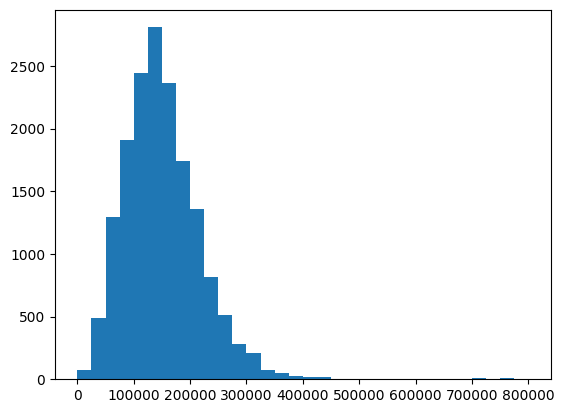

In [424]:
bins = np.arange(0, 825000, 25000)
df.salary_in_usd.hist(bins=bins)
plt.grid(False)
plt.show()

In [425]:
salary_in_usd['iq'] = salary_in_usd['75%'] - salary_in_usd['25%']

In [426]:
salary_in_usd['low'] = salary_in_usd['25%'] - 1.5*salary_in_usd.iq

In [427]:
salary_in_usd['high'] = salary_in_usd['75%'] + 1.5*salary_in_usd.iq

In [428]:
salary_in_usd

count           mean           std      min       25%  \
salary_in_usd  16534.0  149686.777973  68505.293156  15000.0  101125.0   

                    50%       75%       max       iq      low      high  
salary_in_usd  141300.0  185900.0  800000.0  84775.0 -26037.5  313062.5

## Work year

In [429]:
df.work_year.unique()

array([2024, 2022, 2023, 2021, 2020])

In [430]:
work_year = df.groupby('work_year')['salary_in_usd'].describe()

In [431]:
work_year['percentage'] = work_year['count']/count*100

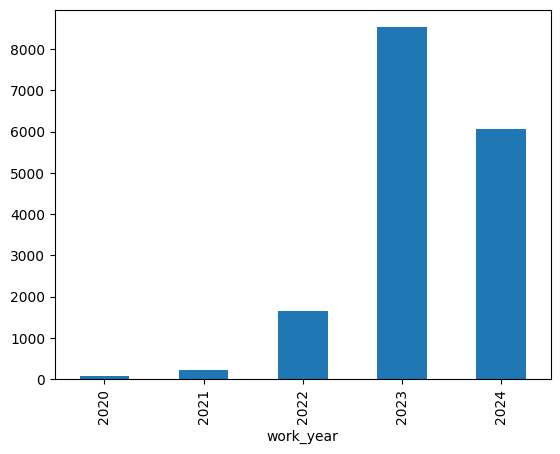

In [575]:
work_year['count'].plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

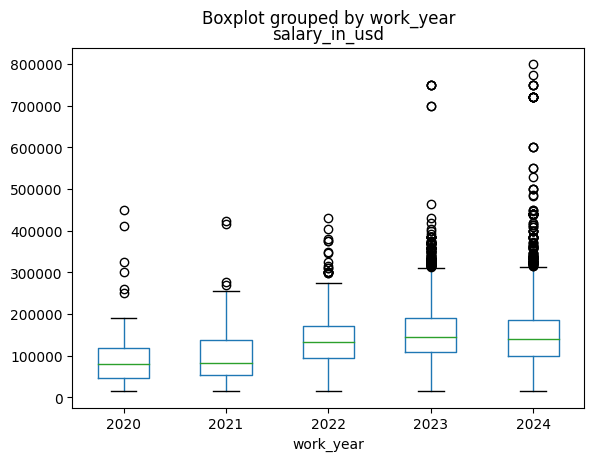

In [433]:
df.boxplot(by='work_year', column =['salary_in_usd'], grid = False)
plt.show()

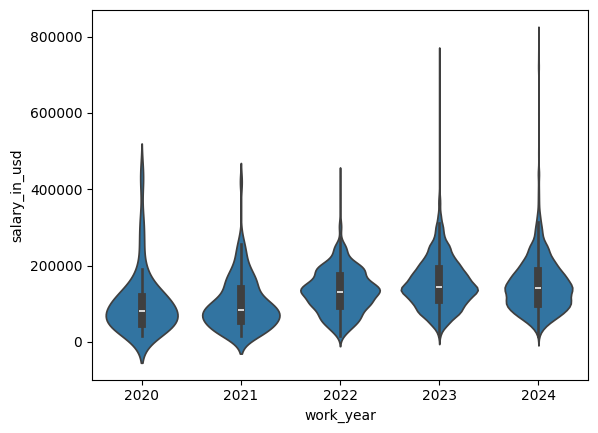

In [434]:
sns.violinplot(data=df, x="work_year", y="salary_in_usd")
plt.show()

In [435]:
work_year['iq'] = work_year['75%'] - work_year['25%']

In [436]:
work_year['low'] = work_year['25%'] - 1.5*work_year.iq

In [437]:
work_year['high'] = work_year['75%'] + 1.5*work_year.iq

In [438]:
work_year

count           mean           std      min       25%       50%  \
work_year                                                                     
2020         75.0  102250.866667  82722.309481  15000.0   47899.0   79833.0   
2021        218.0   99922.073394  67072.030451  15000.0   54094.0   83872.0   
2022       1655.0  134349.500906  57739.455767  15000.0   95000.0  132000.0   
2023       8519.0  153732.664632  65372.146697  15680.0  109281.5  145000.0   
2024       6067.0  150564.095269  73699.623383  16666.0  100000.0  140000.0   

                75%       max  percentage       iq       low       high  
work_year                                                                
2020       117552.0  450000.0    0.453611  69653.0 -56580.50  222031.50  
2021       138750.0  423000.0    1.318495  84656.0 -72890.00  265734.00  
2022       172200.0  430967.0   10.009677  77200.0 -20800.00  288000.00  
2023       190000.0  750000.0   51.524132  80718.5 -11796.25  311077.75  
2024       185950.0  800000.0   36.694085  85950.0 -28925.00  314875.00

## Experience level

In [439]:
df.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [440]:
experience_level = df.groupby('experience_level')['salary_in_usd'].describe()

In [441]:
experience_level['percentage'] = experience_level['count']/count*100

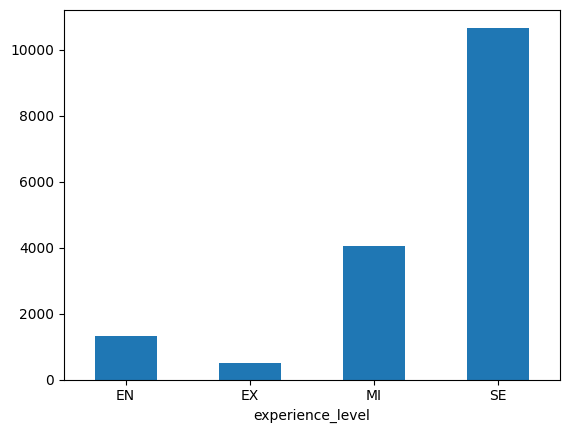

In [442]:
experience_level['count'].plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

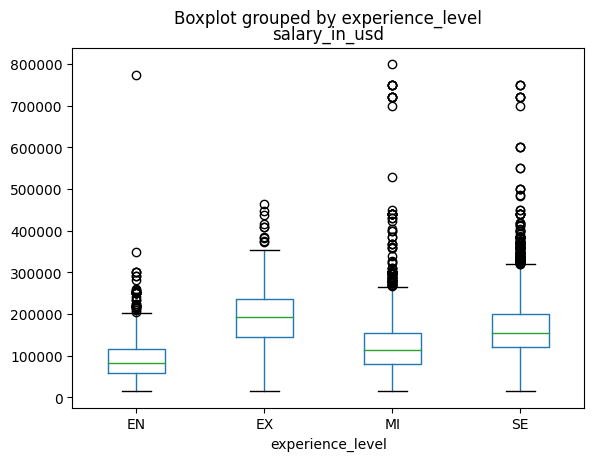

In [443]:
df.boxplot(by='experience_level', column =['salary_in_usd'], grid = False)
plt.show()

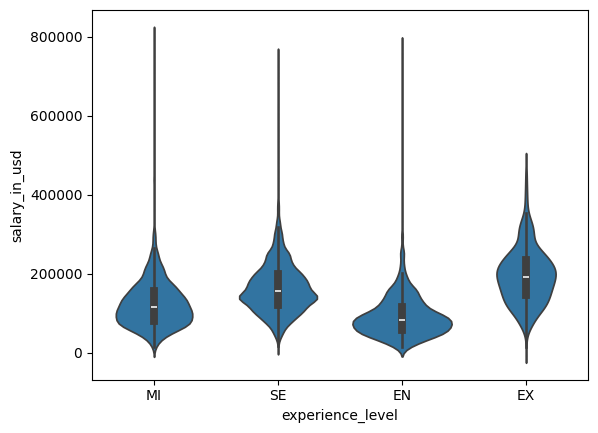

In [444]:
sns.violinplot(data=df, x="experience_level", y="salary_in_usd")
plt.show()

In [445]:
experience_level['iq'] = experience_level['75%'] - experience_level['25%']

In [446]:
experience_level['low'] = experience_level['25%'] - 1.5*experience_level.iq

In [447]:
experience_level['high'] = experience_level['75%'] + 1.5*experience_level.iq

In [448]:
experience_level

count           mean           std      min       25%  \
experience_level                                                            
EN                 1325.0   92327.413585  51838.624747  15000.0   58000.0   
EX                  501.0  195264.281437  70398.699827  15000.0  145000.0   
MI                 4038.0  125923.131253  67067.615240  15000.0   80982.0   
SE                10670.0  163662.826148  63948.402646  15809.0  120000.0   

                       50%       75%       max  percentage       iq      low  \
experience_level                                                               
EN                 83000.0  116000.0  774000.0    8.013790  58000.0 -29000.0   
EX                192000.0  236000.0  465000.0    3.030120  91000.0   8500.0   
MI                115000.0  155000.0  800000.0   24.422402  74018.0 -30045.0   
SE                155000.0  200000.0  750000.0   64.533688  80000.0      0.0   

                      high  
experience_level            
EN                203000.0  
EX                372500.0  
MI                266027.0  
SE                320000.0

## Employment type

### Original

In [449]:
df.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [450]:
employment_type = df.groupby('employment_type')['salary_in_usd'].describe()

In [451]:
employment_type['percentage'] = employment_type['count']/count*100

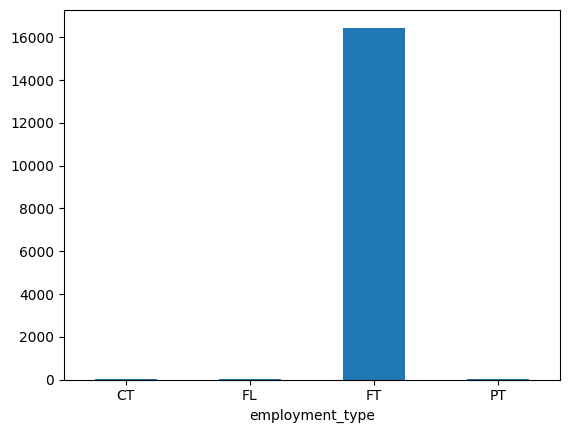

In [452]:
employment_type['count'].plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

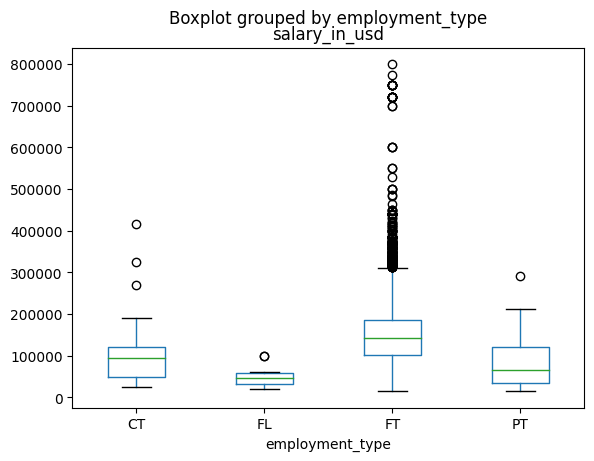

In [453]:
df.boxplot(by='employment_type', column =['salary_in_usd'], grid = False)
plt.show()

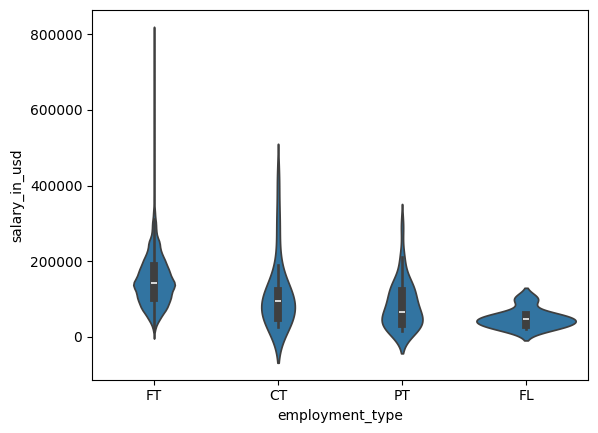

In [454]:
sns.violinplot(data=df, x="employment_type", y="salary_in_usd")
plt.show()

In [455]:
employment_type['iq'] = employment_type['75%'] - employment_type['25%']

In [456]:
employment_type['low'] = employment_type['25%'] - 1.5*employment_type.iq

In [457]:
employment_type['high'] = employment_type['75%'] + 1.5*employment_type.iq

In [458]:
employment_type

count           mean           std      min        25%  \
employment_type                                                             
CT                  28.0  112578.392857  91675.956643  25500.0   50000.00   
FL                  14.0   49220.857143  24997.262711  20000.0   31892.25   
FT               16454.0  149987.686520  68351.024690  15000.0  102225.00   
PT                  38.0   83750.157895  61774.447145  15966.0   35028.50   

                      50%        75%       max  percentage        iq  \
employment_type                                                        
CT                93856.0  121901.75  416000.0    0.169348  71901.75   
FL                47777.5   57500.00  100000.0    0.084674  25607.75   
FT               141525.0  185900.00  800000.0   99.516149  83675.00   
PT                66451.5  121157.75  291340.0    0.229829  86129.25   

                       low        high  
employment_type                         
CT              -57852.625  229754.375  
FL               -6519.375   95911.625  
FT              -23287.500  311412.500  
PT              -94165.375  250351.625

### Simplified

In [459]:
df['employment_type_FT'] = np.where(df.employment_type == 'FT', 1, 0)

In [460]:
df.employment_type_FT.unique()

array([1, 0])

In [461]:
employment_type_FT = df.groupby('employment_type_FT')['salary_in_usd'].describe()

In [462]:
employment_type_FT['percentage'] = employment_type_FT['count']/count*100

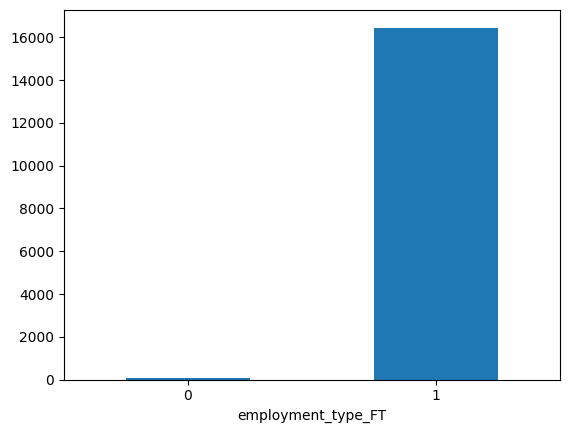

In [463]:
employment_type_FT['count'].plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

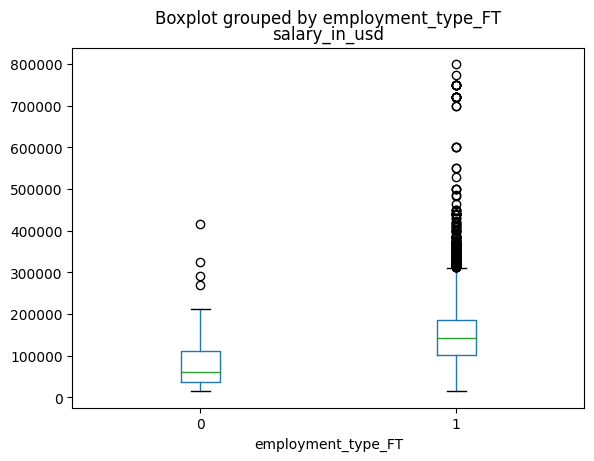

In [464]:
df.boxplot(by='employment_type_FT', column =['salary_in_usd'], grid = False)
plt.show()

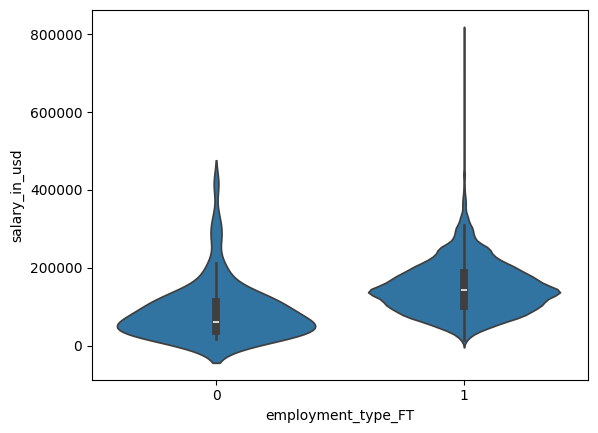

In [465]:
sns.violinplot(data=df, x="employment_type_FT", y="salary_in_usd")
plt.show()

In [466]:
employment_type_FT['iq'] = employment_type_FT['75%'] - employment_type_FT['25%']

In [467]:
employment_type_FT['low'] = employment_type_FT['25%'] - 1.5*employment_type_FT.iq

In [468]:
employment_type_FT['high'] = employment_type_FT['75%'] + 1.5*employment_type_FT.iq

In [469]:
employment_type_FT

count          mean           std      min       25%  \
employment_type_FT                                                           
0                      80.0   87797.41250  72469.157913  15966.0   36869.0   
1                   16454.0  149987.68652  68351.024690  15000.0  102225.0   

                         50%        75%       max  percentage        iq  \
employment_type_FT                                                        
0                    61581.0  111911.75  416000.0    0.483851  75042.75   
1                   141525.0  185900.00  800000.0   99.516149  83675.00   

                          low        high  
employment_type_FT                         
0                  -75695.125  224475.875  
1                  -23287.500  311412.500

## Job Title

### Original

In [470]:
df.job_title.unique()

array(['Admin & Data Analyst', 'AI Architect', 'AI Developer',
       'AI Engineer', 'AI Product Manager', 'AI Programmer',
       'AI Research Engineer', 'AI Research Scientist', 'AI Scientist',
       'AI Software Engineer', 'Analytics Engineer',
       'Analytics Engineering Manager', 'Applied Data Scientist',
       'Applied Machine Learning Engineer',
       'Applied Machine Learning Scientist', 'Applied Research Scientist',
       'Applied Scientist', 'Autonomous Vehicle Technician',
       'AWS Data Architect', 'Azure Data Engineer', 'Bear Robotics',
       'BI Analyst', 'BI Data Analyst', 'BI Data Engineer',
       'BI Developer', 'Big Data Architect', 'Big Data Developer',
       'Big Data Engineer', 'Business Data Analyst',
       'Business Intelligence', 'Business Intelligence Analyst',
       'Business Intelligence Data Analyst',
       'Business Intelligence Developer',
       'Business Intelligence Engineer', 'Business Intelligence Lead',
       'Business Intelligence Man

In [471]:
df.job_title.unique().size

155

In [472]:
job_title = pd.DataFrame(df.job_title.value_counts())

In [473]:
top_job_title = job_title.head(20)

In [474]:
top_job_title['percentage'] = top_job_title['count']/count*100

<ipython-input-474-8488bab2ff71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_job_title['percentage'] = top_job_title['count']/count*100


In [475]:
top_job_title

count  percentage
job_title                                        
Data Engineer                    3464   20.950768
Data Scientist                   3314   20.043547
Data Analyst                     2440   14.757469
Machine Learning Engineer        1705   10.312084
Research Scientist                531    3.211564
Data Architect                    435    2.630942
Applied Scientist                 435    2.630942
Analytics Engineer                431    2.606750
Research Engineer                 306    1.850732
Data Science                      271    1.639047
Business Intelligence Engineer    248    1.499940
Data Manager                      212    1.282206
ML Engineer                       200    1.209629
Business Intelligence Analyst     191    1.155195
Machine Learning Scientist        138    0.834644
Research Analyst                  123    0.743922
Data Science Manager              122    0.737873
AI Engineer                       120    0.725777
Business Intelligence              98    0.592718
BI Developer                       90    0.544333

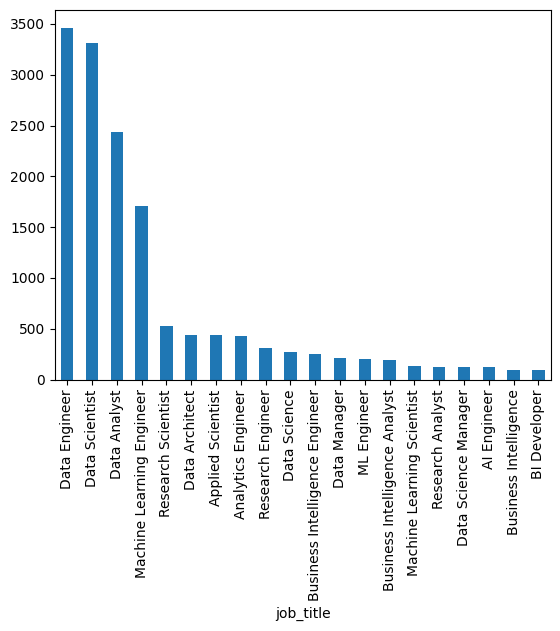

In [476]:
top_job_title['count'].plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Recoded

In [477]:
df.job_title_recode.unique()

array(['Analyst', 'Architect', 'Developer', 'Engineer', 'Product Manager',
       'Scientist', 'Manager', 'Technician', 'Specialist', 'Biologist',
       'Associate', 'Consultant', 'Modeler', 'Practitioner', 'Researcher',
       'Professional'], dtype=object)

In [478]:
job_title = df.groupby('job_title_recode')['salary_in_usd'].describe()

In [479]:
job_title['percentage'] = job_title['count']/count*100

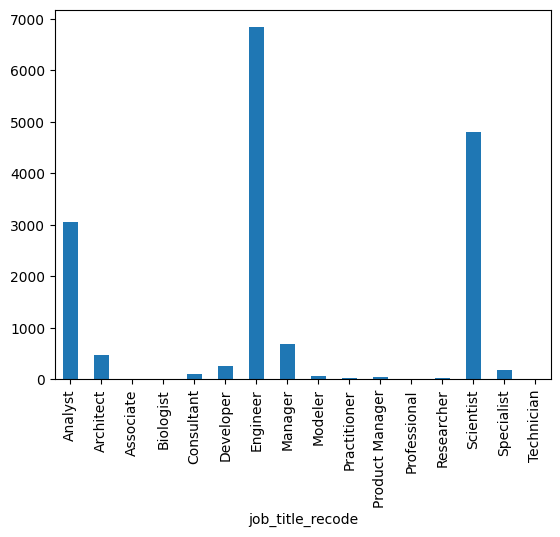

In [480]:
job_title['count'].plot.bar()
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

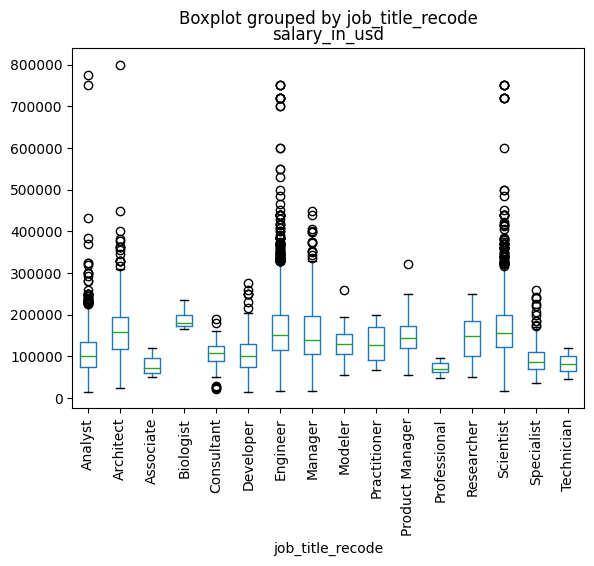

In [481]:
df.boxplot(by='job_title_recode', column =['salary_in_usd'], grid = False)
plt.xticks(rotation=90)
plt.show()

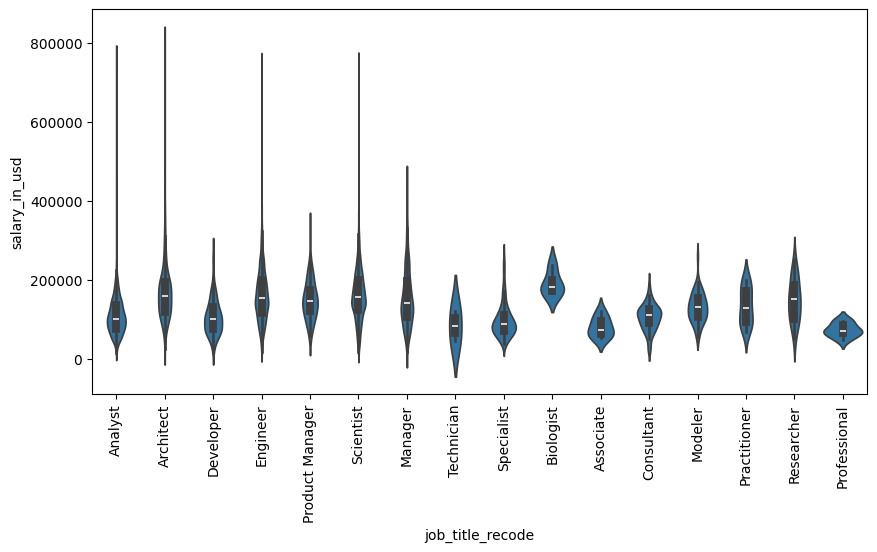

In [482]:
plt.figure(figsize=[10,5])
sns.violinplot(data=df, x="job_title_recode", y="salary_in_usd")
plt.xticks(rotation=90)
plt.show()

In [483]:
job_title['iq'] = job_title['75%'] - job_title['25%']

In [484]:
job_title['low'] = job_title['25%'] - 1.5*job_title.iq

In [485]:
job_title['high'] = job_title['75%'] + 1.5*job_title.iq

In [486]:
job_title

count           mean           std       min        25%  \
job_title_recode                                                             
Analyst           3059.0  108444.844067  47336.140722   15000.0   75726.50   
Architect          469.0  166387.113006  69196.445667   25000.0  117000.00   
Associate            7.0   79513.714286  25093.454955   51375.0   61110.50   
Biologist            4.0  190384.250000  31581.409472  165384.0  171846.00   
Consultant          93.0  104636.086022  32891.122713   21000.0   90000.00   
Developer          247.0  105824.032389  45673.434729   15000.0   74431.00   
Engineer          6835.0  161353.334309  69205.688668   15897.0  115000.00   
Manager            684.0  154749.842105  73836.851680   17511.0  104950.00   
Modeler             58.0  129203.155172  37531.804008   55368.0  105425.00   
Practitioner        16.0  133650.000000  45759.312349   68400.0   91400.00   
Product Manager     47.0  150894.085106  51210.400794   55926.0  120000.00   
Professional         8.0   72812.500000  17187.490260   47700.0   63625.00   
Researcher          22.0  148486.318182  53037.376375   50000.0  101309.00   
Scientist         4797.0  162717.121951  68320.154364   16000.0  122200.00   
Specialist         186.0   96629.586022  42240.568416   36483.0   69571.25   
Technician           2.0   82777.500000  52640.564325   45555.0   64166.25   

                       50%        75%       max  percentage        iq  \
job_title_recode                                                        
Analyst           101000.0  135000.00  774000.0   18.501270  59273.50   
Architect         159500.0  195000.00  800000.0    2.836579  78000.00   
Associate          72000.0   95500.00  120000.0    0.042337  34389.50   
Biologist         180076.5  198614.75  236000.0    0.024193  26768.75   
Consultant        109000.0  125000.00  189750.0    0.562477  35000.00   
Developer         100000.0  130000.00  275000.0    1.493891  55569.00   
Engineer          152375.0  200000.00  750000.0   41.339059  85000.00   
Manager           140000.0  195850.00  448000.0    4.136930  90900.00   
Modeler           130000.0  153025.00  258700.0    0.350792  47600.00   
Practitioner      127350.0  170200.00  198800.0    0.096770  78800.00   
Product Manager   145000.0  173000.00  321830.0    0.284263  53000.00   
Professional       69800.0   83675.00   96200.0    0.048385  20050.00   
Researcher        150000.0  185000.00  250800.0    0.133059  83691.00   
Scientist         156560.0  200000.00  750000.0   29.012943  77800.00   
Specialist         86450.0  110000.00  259900.0    1.124955  40428.75   
Technician         82777.5  101388.75  120000.0    0.012096  37222.50   

                         low        high  
job_title_recode                          
Analyst           -13183.750  223910.250  
Architect              0.000  312000.000  
Associate           9526.250  147084.250  
Biologist         131692.875  238767.875  
Consultant         37500.000  177500.000  
Developer          -8922.500  213353.500  
Engineer          -12500.000  327500.000  
Manager           -31400.000  332200.000  
Modeler            34025.000  224425.000  
Practitioner      -26800.000  288400.000  
Product Manager    40500.000  252500.000  
Professional       33550.000  113750.000  
Researcher        -24227.500  310536.500  
Scientist           5500.000  316700.000  
Specialist          8928.125  170643.125  
Technician          8332.500  157222.500

### Simplified

In [487]:
df['job_titles'] = np.where(df.job_title_recode == 'Analyst', 'Analyst',
                   np.where(df.job_title_recode == 'Engineer', 'Engineer',
                   np.where(df.job_title_recode == 'Scientist', 'Scientist',
                   np.where(df.job_title_recode == 'Manager', 'Manager',
                   np.where(df.job_title_recode == 'Architect', 'Architect', 'Other')))))

In [488]:
df.job_titles.unique()

array(['Analyst', 'Architect', 'Other', 'Engineer', 'Scientist',
       'Manager'], dtype=object)

In [489]:
job_titles = df.groupby('job_titles')['salary_in_usd'].describe()

In [490]:
job_titles['percentage'] = job_titles['count']/count*100

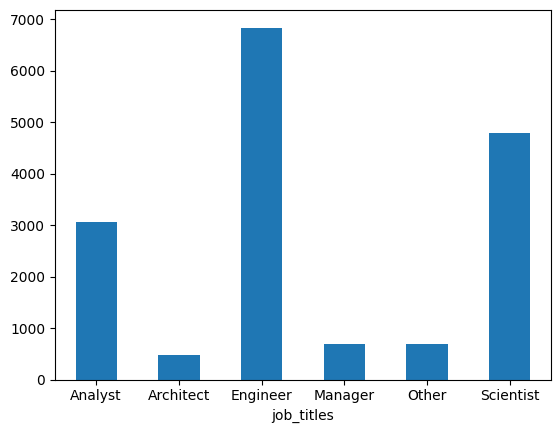

In [491]:
job_titles['count'].plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

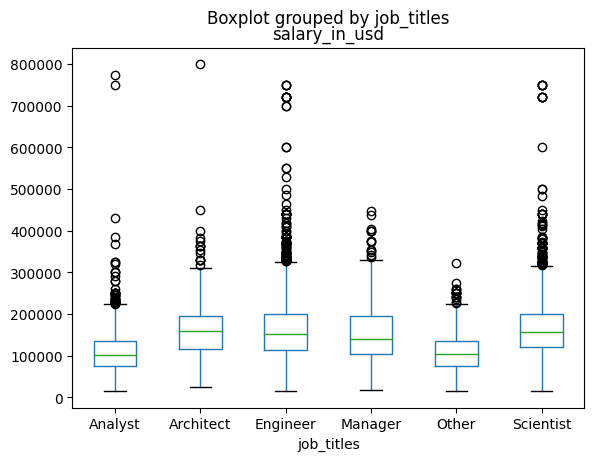

In [492]:
df.boxplot(by='job_titles', column =['salary_in_usd'], grid = False)
plt.show()

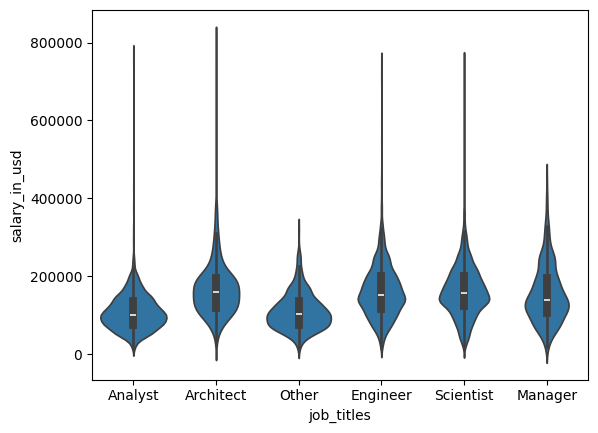

In [493]:
sns.violinplot(data=df, x="job_titles", y="salary_in_usd")
plt.show()

In [494]:
job_titles['iq'] = job_titles['75%'] - job_titles['25%']

In [495]:
job_titles['low'] = job_titles['25%'] - 1.5*job_titles.iq

In [496]:
job_titles['high'] = job_titles['75%'] + 1.5*job_titles.iq

In [497]:
job_titles

count           mean           std      min       25%       50%  \
job_titles                                                                     
Analyst     3059.0  108444.844067  47336.140722  15000.0   75726.5  101000.0   
Architect    469.0  166387.113006  69196.445667  25000.0  117000.0  159500.0   
Engineer    6835.0  161353.334309  69205.688668  15897.0  115000.0  152375.0   
Manager      684.0  154749.842105  73836.851680  17511.0  104950.0  140000.0   
Other        690.0  109999.836232  46228.762854  15000.0   75000.0  103988.5   
Scientist   4797.0  162717.121951  68320.154364  16000.0  122200.0  156560.0   

                 75%       max  percentage       iq       low       high  
job_titles                                                                
Analyst     135000.0  774000.0   18.501270  59273.5 -13183.75  223910.25  
Architect   195000.0  800000.0    2.836579  78000.0      0.00  312000.00  
Engineer    200000.0  750000.0   41.339059  85000.0 -12500.00  327500.00  
Manager     195850.0  448000.0    4.136930  90900.0 -31400.00  332200.00  
Other       135000.0  321830.0    4.173219  60000.0 -15000.00  225000.00  
Scientist   200000.0  750000.0   29.012943  77800.0   5500.00  316700.00

## Salary currency

### Original

In [498]:
df.salary_currency.unique()

array(['USD', 'EUR', 'SGD', 'ILS', 'GBP', 'INR', 'CAD', 'AUD', 'DKK',
       'BRL', 'TRY', 'HUF', 'PHP', 'PLN', 'NZD', 'CHF', 'MXN', 'JPY',
       'THB', 'NOK', 'HKD', 'CLP', 'ZAR'], dtype=object)

In [499]:
salary_currency = df.groupby('salary_currency')['salary_in_usd'].describe()

In [500]:
salary_currency['percentage'] = salary_currency['count']/count*100

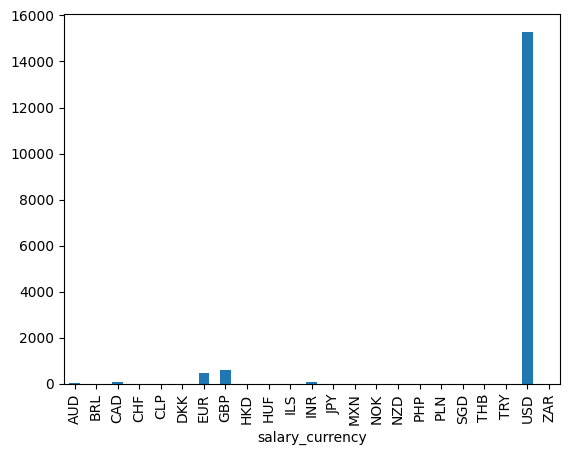

In [501]:
salary_currency['count'].plot.bar()
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

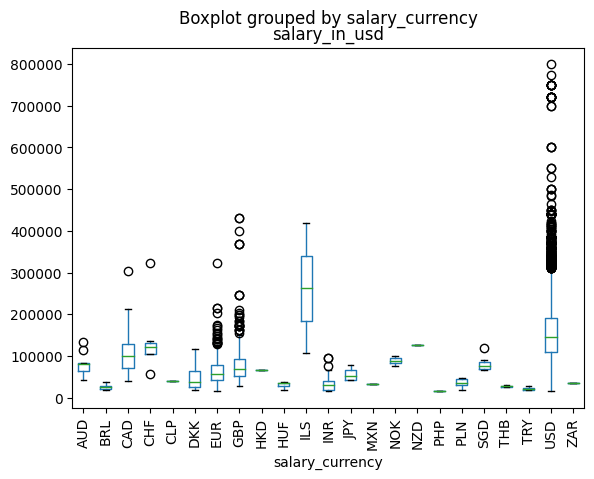

In [502]:
df.boxplot(by='salary_currency', column =['salary_in_usd'], grid = False)
plt.xticks(rotation=90)
plt.show()

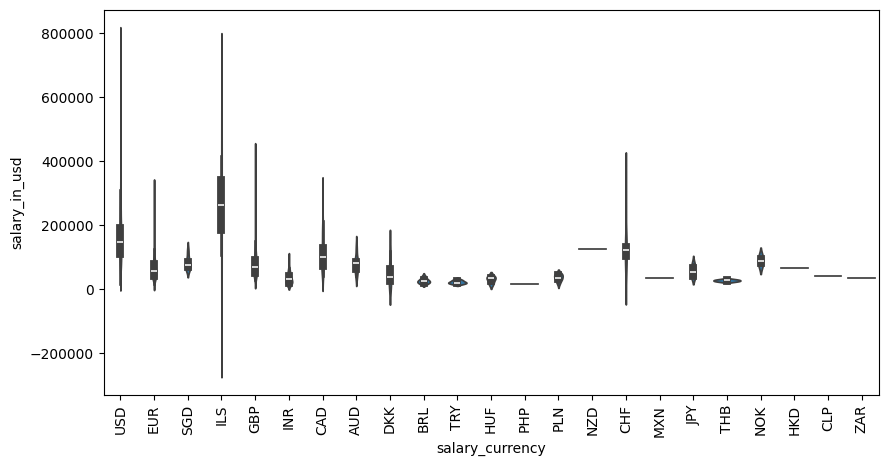

In [503]:
plt.figure(figsize=[10,5])
sns.violinplot(data=df, x="salary_currency", y="salary_in_usd")
plt.xticks(rotation=90)
plt.show()

In [504]:
salary_currency['iq'] = salary_currency['75%'] - salary_currency['25%']

In [505]:
salary_currency['low'] = salary_currency['25%'] - 1.5*salary_currency.iq

In [506]:
salary_currency['high'] = salary_currency['75%'] + 1.5*salary_currency.iq

In [507]:
salary_currency

count           mean            std       min        25%  \
salary_currency                                                               
AUD                 12.0   78660.000000   26425.228393   42028.0   64068.25   
BRL                  5.0   26095.800000    7760.380158   18907.0   19910.00   
CAD                 56.0  108635.696429   51766.320502   40747.0   71147.00   
CHF                  8.0  137187.500000   79146.017766   56536.0  104528.75   
CLP                  1.0   40038.000000            NaN   40038.0   40038.00   
DKK                  4.0   52806.250000   44630.010377   19073.0   26225.00   
EUR                449.0   63814.378619   32362.652879   15966.0   42197.00   
GBP                616.0   79375.483766   46127.967542   28299.0   51676.00   
HKD                  1.0   65058.000000            NaN   65058.0   65058.00   
HUF                  3.0   29892.666667   10576.261170   17684.0   26709.50   
ILS                  2.0  262515.000000  219799.900291  107093.0  184804.00   
INR                 55.0   34451.600000   19060.117944   15809.0   18961.50   
JPY                  4.0   56143.250000   17530.802765   41689.0   41779.00   
MXN                  1.0   33511.000000            NaN   33511.0   33511.00   
NOK                  2.0   88462.000000   16905.508925   76508.0   82485.00   
NZD                  1.0  125000.000000            NaN  125000.0  125000.00   
PHP                  1.0   15680.000000            NaN   15680.0   15680.00   
PLN                  7.0   36099.428571   10611.082962   18160.0   31042.50   
SGD                  6.0   81724.333333   20167.539718   65257.0   68948.25   
THB                  2.0   26957.000000    3314.916590   24613.0   25785.00   
TRY                  3.0   22189.333333    5124.798370   18381.0   19276.00   
USD              15294.0  155931.618543   66292.615988   15000.0  110000.00   
ZAR                  1.0   34482.000000            NaN   34482.0   34482.00   

                      50%        75%       max  percentage         iq  \
salary_currency                                                         
AUD               80919.0   83344.25  133766.0    0.072578   19276.00   
BRL               25804.0   27568.00   38290.0    0.030241    7658.00   
CAD               99854.5  127434.75  303387.0    0.338696   56287.75   
CHF              121520.0  131249.50  323295.0    0.048385   26720.75   
CLP               40038.0   40038.00   40038.0    0.006048       0.00   
DKK               37252.5   63833.75  117647.0    0.024193   37608.75   
EUR               57277.0   77119.00  323905.0    2.715616   34922.00   
GBP               68750.0   92350.00  430967.0    3.725656   40674.00   
HKD               65058.0   65058.00   65058.0    0.006048       0.00   
HUF               35735.0   35997.00   36259.0    0.018144    9287.50   
ILS              262515.0  340226.00  417937.0    0.012096  155422.00   
INR               30428.0   40525.50   95386.0    0.332648   21564.00   
JPY               52760.0   67124.25   77364.0    0.024193   25345.25   
MXN               33511.0   33511.00   33511.0    0.006048       0.00   
NOK               88462.0   94439.00  100416.0    0.012096   11954.00   
NZD              125000.0  125000.00  125000.0    0.006048       0.00   
PHP               15680.0   15680.00   15680.0    0.006048       0.00   
PLN               34924.0   45465.00   46597.0    0.042337   14422.50   
SGD               74883.0   85691.25  119059.0    0.036289   16743.00   
THB               26957.0   28129.00   29301.0    0.012096    2344.00   
TRY               20171.0   24093.50   28016.0    0.018144    4817.50   
USD              146100.0  190000.00  800000.0   92.500302   80000.00   
ZAR               34482.0   34482.00   34482.0    0.006048       0.00   

                        low        high  
salary_currency                          
AUD               35154.250  112258.250  
BRL                8423.000   39055.000  
CAD              -13284.625  211866.375  
CHF    

### Simplified

In [508]:
df['salary_currencies'] = np.where(df.salary_currency == 'USD', 'USD',
                          np.where(df.salary_currency == 'GBP', 'GBP',
                          np.where(df.salary_currency == 'EUR', 'EUR', 'Other')))

In [509]:
df.salary_currencies.unique()

array(['USD', 'EUR', 'Other', 'GBP'], dtype=object)

In [510]:
salary_currencies = df.groupby('salary_currencies')['salary_in_usd'].describe()

In [511]:
salary_currencies['percentage'] = salary_currencies['count']/count*100

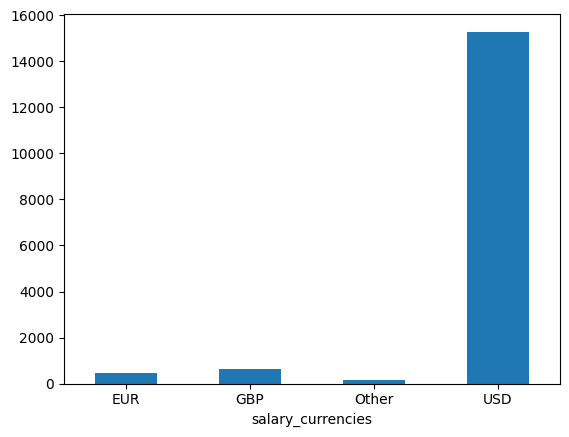

In [512]:
salary_currencies['count'].plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

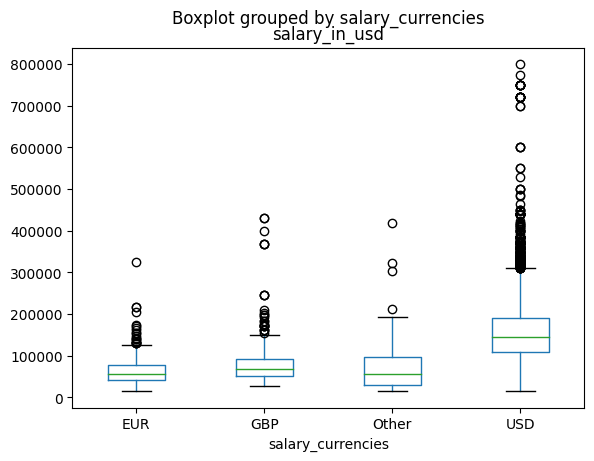

In [513]:
df.boxplot(by='salary_currencies', column =['salary_in_usd'], grid = False)
plt.show()

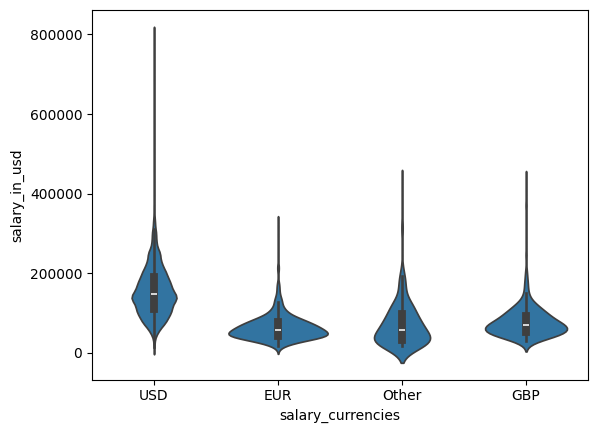

In [514]:
sns.violinplot(data=df, x="salary_currencies", y="salary_in_usd")
plt.show()

In [515]:
salary_currencies['iq'] = salary_currencies['75%'] - salary_currencies['25%']

In [516]:
salary_currencies['low'] = salary_currencies['25%'] - 1.5*salary_currencies.iq

In [517]:
salary_currencies['high'] = salary_currencies['75%'] + 1.5*salary_currencies.iq

In [518]:
salary_currencies

count           mean           std      min       25%  \
salary_currencies                                                            
EUR                  449.0   63814.378619  32362.652879  15966.0   42197.0   
GBP                  616.0   79375.483766  46127.967542  28299.0   51676.0   
Other                175.0   71743.194286  58081.696918  15680.0   30523.0   
USD                15294.0  155931.618543  66292.615988  15000.0  110000.0   

                        50%       75%       max  percentage       iq      low  \
salary_currencies                                                               
EUR                 57277.0   77119.0  323905.0    2.715616  34922.0 -10186.0   
GBP                 68750.0   92350.0  430967.0    3.725656  40674.0  -9335.0   
Other               56723.0   98008.0  417937.0    1.058425  67485.0 -70704.5   
USD                146100.0  190000.0  800000.0   92.500302  80000.0 -10000.0   

                       high  
salary_currencies            
EUR                129502.0  
GBP                153361.0  
Other              199235.5  
USD                310000.0

## Employee residence

### Original

In [519]:
df.employee_residence.unique()

array(['US', 'ES', 'IN', 'DE', 'HR', 'CA', 'BE', 'FR', 'UA', 'IT', 'FI',
       'SE', 'BA', 'IL', 'GB', 'AE', 'OM', 'CZ', 'PT', 'RO', 'QA', 'KR',
       'PK', 'TN', 'SA', 'TR', 'AU', 'GH', 'CO', 'DK', 'EG', 'LT', 'HU',
       'NL', 'NG', 'BR', 'AR', 'KE', 'AT', 'BO', 'VN', 'PL', 'AS', 'MU',
       'PH', 'MX', 'MD', 'AM', 'LU', 'ZA', 'LV', 'SG', 'RU', 'GE', 'GR',
       'IE', 'SI', 'EE', 'CF', 'UZ', 'KW', 'CN', 'CR', 'ID', 'BG', 'NZ',
       'MT', 'CH', 'PE', 'PR', 'JP', 'HK', 'LB', 'TH', 'AD', 'EC', 'NO',
       'CY', 'DO', 'DZ', 'RS', 'CL', 'MY', 'IQ', 'UG', 'IR', 'HN', 'JE'],
      dtype=object)

In [520]:
df.employee_residence.unique().size

88

In [521]:
employee_residence = pd.DataFrame(df.employee_residence.value_counts())

In [522]:
top_employee_residence = employee_residence.head(20)

In [523]:
top_employee_residence['percentage'] = top_employee_residence['count']/count*100

<ipython-input-523-270ba3520518>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_employee_residence['percentage'] = top_employee_residence['count']/count*100


In [524]:
top_employee_residence

count  percentage
employee_residence                   
US                  14467   87.498488
GB                    686    4.149026
CA                    453    2.739809
ES                    137    0.828596
DE                     98    0.592718
IN                     78    0.471755
FR                     69    0.417322
AU                     54    0.326600
NL                     32    0.193541
PT                     30    0.181444
BR                     24    0.145155
IT                     21    0.127011
LT                     20    0.120963
ZA                     19    0.114915
GR                     17    0.102818
CO                     16    0.096770
LV                     16    0.096770
PL                     15    0.090722
EG                     14    0.084674
MX                     14    0.084674

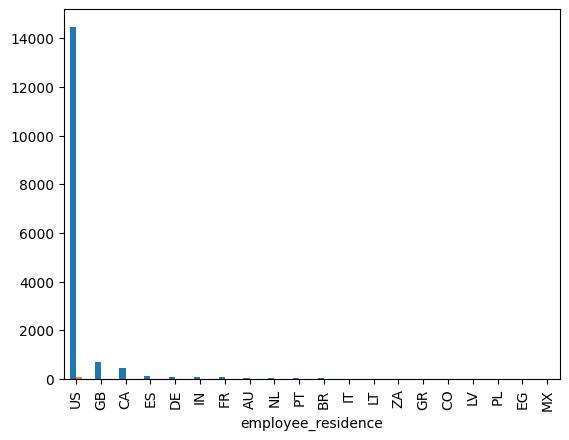

In [525]:
top_employee_residence.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Simplified

In [526]:
df['employee_residences'] = np.where(df.employee_residence == 'US', 'US',
                           np.where(df.employee_residence == 'GB', 'GB',
                           np.where(df.employee_residence == 'CA', 'CA', 'Other')))

In [527]:
df.employee_residences.unique()

array(['US', 'Other', 'CA', 'GB'], dtype=object)

In [528]:
employee_residences = df.groupby('employee_residences')['salary_in_usd'].describe()

In [529]:
employee_residences['percentage'] = employee_residences['count']/count*100

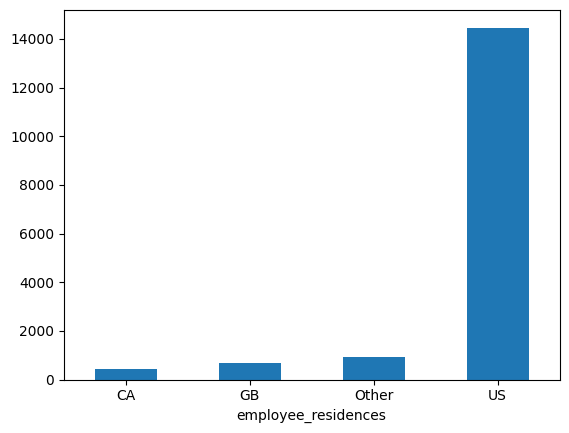

In [530]:
employee_residences['count'].plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

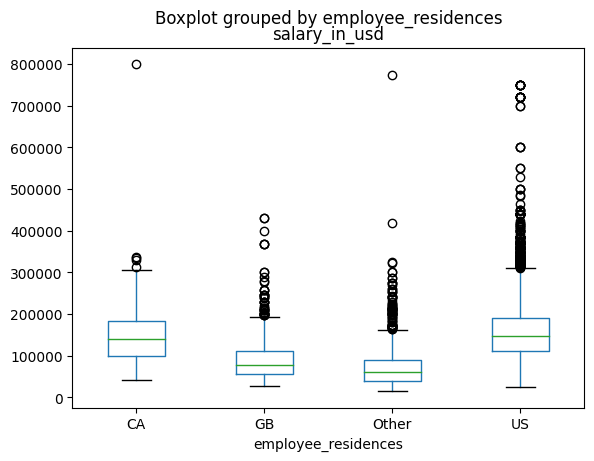

In [531]:
df.boxplot(by='employee_residences', column =['salary_in_usd'], grid = False)
plt.show()

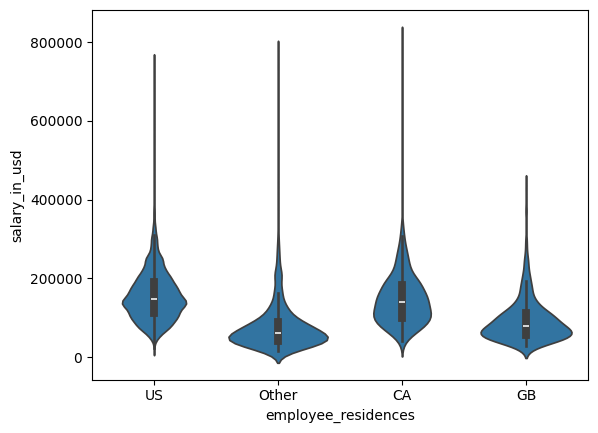

In [532]:
sns.violinplot(data=df, x="employee_residences", y="salary_in_usd")
plt.show()

In [533]:
employee_residences['iq'] = employee_residences['75%'] - employee_residences['25%']

In [534]:
employee_residences['low'] = employee_residences['25%'] - 1.5*employee_residences.iq

In [535]:
employee_residences['high'] = employee_residences['75%'] + 1.5*employee_residences.iq

In [536]:
employee_residences

count           mean           std      min        25%  \
employee_residences                                                             
CA                     453.0  146334.463576  66571.828176  40747.0  100017.00   
GB                     686.0   93515.371720  56715.455105  28299.0   55410.00   
Other                  928.0   76199.573276  58050.338493  15000.0   40547.75   
US                   14467.0  157169.207576  65607.930508  24000.0  111600.00   

                          50%       75%       max  percentage        iq  \
employee_residences                                                       
CA                   140000.0  183000.0  800000.0    2.739809  82983.00   
GB                    78488.0  110736.0  430967.0    4.149026  55326.00   
Other                 60000.0   90000.0  774000.0    5.612677  49452.25   
US                   148000.0  191225.0  750000.0   87.498488  79625.00   

                           low        high  
employee_residences                         
CA                  -24457.500  307474.500  
GB                  -27579.000  193725.000  
Other               -33630.625  164178.375  
US                   -7837.500  310662.500

## Remote ratio

In [537]:
df.remote_ratio.unique()

array([  0, 100,  50])

In [538]:
remote_ratio = df.groupby('remote_ratio')['salary_in_usd'].describe()

In [539]:
remote_ratio['percentage'] = remote_ratio['count']/count*100

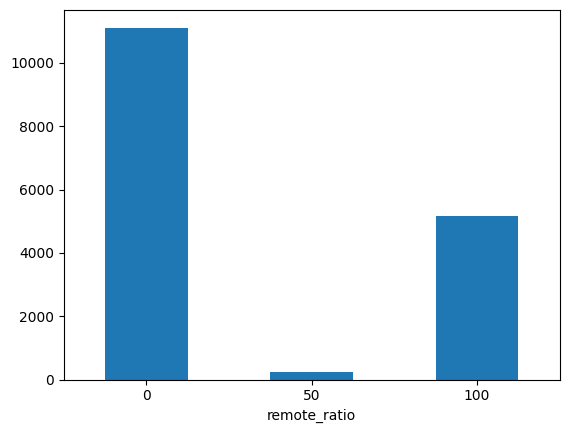

In [540]:
remote_ratio['count'].plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

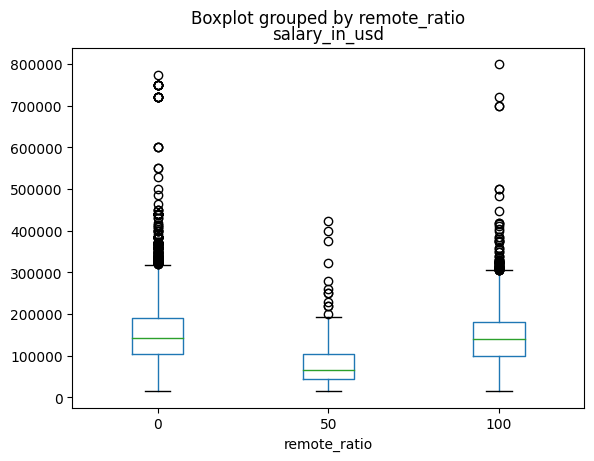

In [541]:
df.boxplot(by='remote_ratio', column =['salary_in_usd'], grid = False)
plt.show()

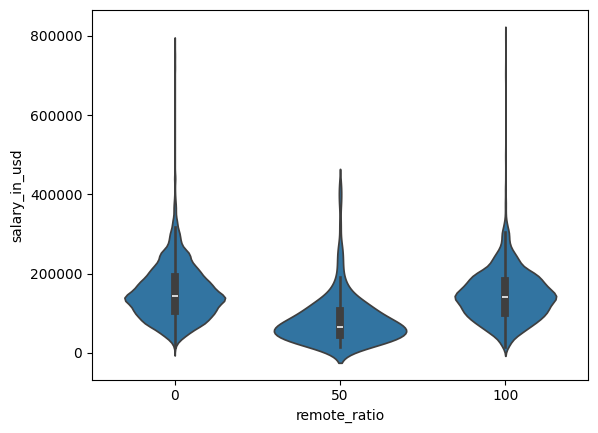

In [542]:
sns.violinplot(data=df, x="remote_ratio", y="salary_in_usd")
plt.show()

In [543]:
remote_ratio['iq'] = remote_ratio['75%'] - remote_ratio['25%']

In [544]:
remote_ratio['low'] = remote_ratio['25%'] - 1.5*remote_ratio.iq

In [545]:
remote_ratio['high'] = remote_ratio['75%'] + 1.5*remote_ratio.iq

In [546]:
remote_ratio

count           mean           std      min       25%  \
remote_ratio                                                            
0             11118.0  153132.606944  70255.447303  15000.0  105000.0   
50              249.0   82984.465863  61779.015363  15680.0   44753.0   
100            5167.0  145486.690730  62901.547317  15000.0  100000.0   

                   50%       75%       max  percentage       iq      low  \
remote_ratio                                                               
0             143000.0  190000.0  774000.0   67.243256  85000.0 -22500.0   
50             66022.0  105000.0  423000.0    1.505988  60247.0 -45617.5   
100           140000.0  182027.0  800000.0   31.250756  82027.0 -23040.5   

                  high  
remote_ratio            
0             317500.0  
50            195370.5  
100           305067.5

## Company location

### Original

In [547]:
df.company_location.unique()

array(['US', 'ES', 'IN', 'DE', 'CA', 'FR', 'UA', 'IT', 'FI', 'SE', 'BA',
       'IL', 'GB', 'AE', 'OM', 'PT', 'RO', 'QA', 'KR', 'AU', 'HU', 'CH',
       'SA', 'TR', 'GH', 'CO', 'DK', 'AS', 'EG', 'LT', 'NL', 'NG', 'BR',
       'KE', 'PK', 'AT', 'CZ', 'PL', 'BS', 'MU', 'PH', 'JP', 'MX', 'MD',
       'GI', 'RU', 'LU', 'ZA', 'LV', 'SG', 'IE', 'SI', 'EE', 'CF', 'HR',
       'AR', 'ID', 'GR', 'NZ', 'MT', 'PR', 'LB', 'TH', 'AD', 'EC', 'NO',
       'HK', 'BE', 'MY', 'DZ', 'CL', 'IQ', 'VN', 'AM', 'IR', 'HN', 'CN'],
      dtype=object)

In [548]:
df.company_location.unique().size

77

In [549]:
company_location = pd.DataFrame(df.company_location.value_counts())

In [550]:
top_company_location = company_location.head(20)

In [551]:
top_company_location['percentage'] = top_company_location['count']/count*100

<ipython-input-551-bd10da4117bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_company_location['percentage'] = top_company_location['count']/count*100


In [552]:
top_company_location

count  percentage
company_location                   
US                14518   87.806943
GB                  694    4.197411
CA                  455    2.751905
ES                  133    0.804403
DE                  105    0.635055
FR                   65    0.393129
IN                   63    0.381033
AU                   57    0.344744
NL                   32    0.193541
PT                   28    0.169348
BR                   22    0.133059
LT                   20    0.120963
ZA                   19    0.114915
LV                   16    0.096770
CO                   16    0.096770
MX                   15    0.090722
PL                   14    0.084674
IT                   14    0.084674
GR                   14    0.084674
EG                   13    0.078626

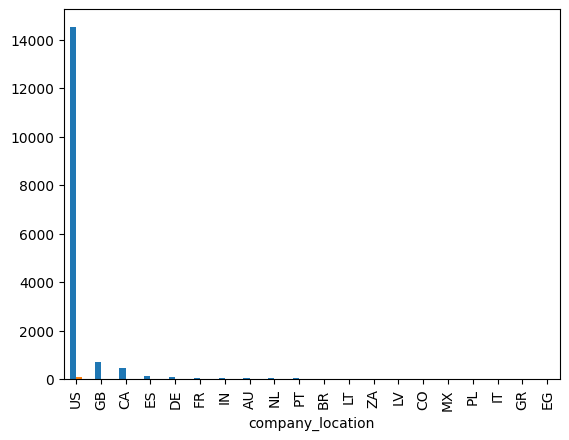

In [553]:
top_company_location.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Simplified

In [554]:
df['company_locations'] = np.where(df.company_location == 'US', 'US',
                          np.where(df.company_location == 'GB', 'GB',
                          np.where(df.company_location == 'CA', 'CA', 'Other')))

In [555]:
df.company_locations.unique()

array(['US', 'Other', 'CA', 'GB'], dtype=object)

In [556]:
company_locations = df.groupby('company_locations')['salary_in_usd'].describe()

In [557]:
company_locations['percentage'] = company_locations['count']/count*100

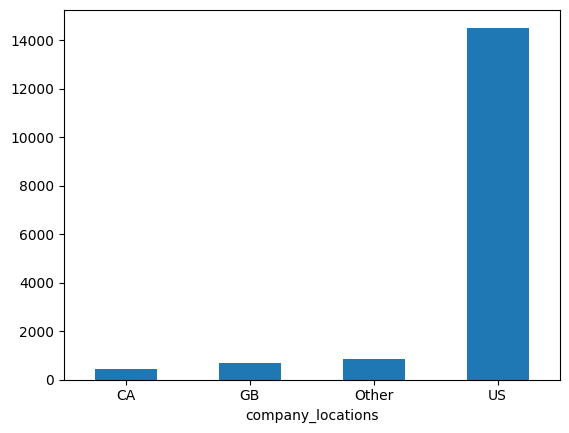

In [558]:
company_locations['count'].plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

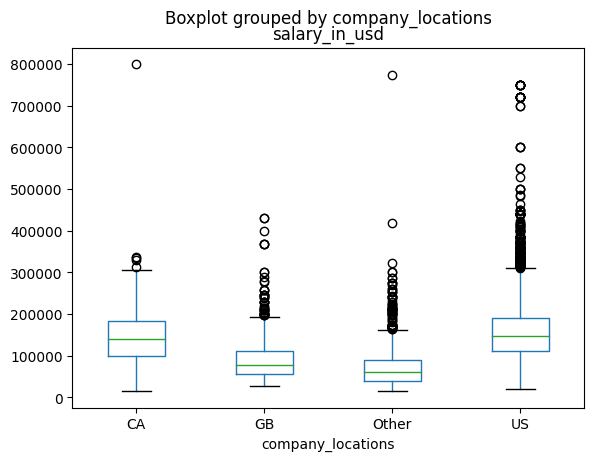

In [559]:
df.boxplot(by='company_locations', column =['salary_in_usd'], grid = False)
plt.show()

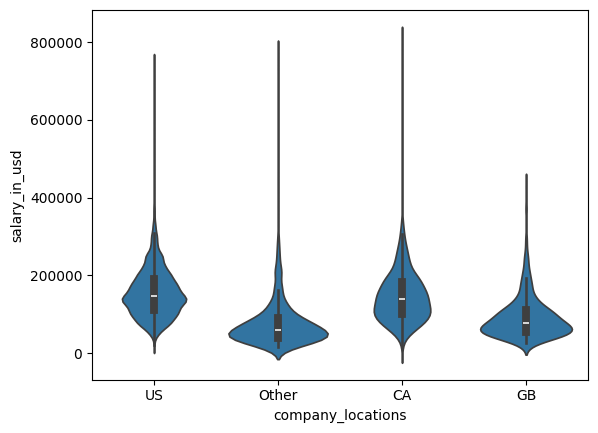

In [560]:
sns.violinplot(data=df, x="company_locations", y="salary_in_usd")
plt.show()

In [561]:
company_locations['iq'] = company_locations['75%'] - company_locations['25%']

In [562]:
company_locations['low'] = company_locations['25%'] - 1.5*company_locations.iq

In [563]:
company_locations['high'] = company_locations['75%'] + 1.5*company_locations.iq

In [564]:
company_locations

count           mean           std      min       25%  \
company_locations                                                            
CA                   455.0  145918.096703  67114.820192  15000.0  100003.0   
GB                   694.0   93228.488473  56514.213847  26992.0   55410.0   
Other                867.0   75997.078431  58109.131017  15000.0   40452.0   
US                 14518.0  156904.423130  65732.000627  20000.0  111000.0   

                        50%       75%       max  percentage       iq      low  \
company_locations                                                               
CA                 140000.0  183300.0  800000.0    2.751905  83297.0 -24942.5   
GB                  76979.0  110736.0  430967.0    4.197411  55326.0 -27579.0   
Other               60000.0   90000.0  774000.0    5.243740  49548.0 -33870.0   
US                 147500.0  190975.0  750000.0   87.806943  79975.0  -8962.5   

                       high  
company_locations            
CA                 308245.5  
GB                 193725.0  
Other              164322.0  
US                 310937.5

## Company size

In [565]:
df.company_size.unique()

array(['M', 'L', 'S'], dtype=object)

In [566]:
company_size = df.groupby('company_size')['salary_in_usd'].describe()

In [567]:
company_size['percentage'] = company_size['count']/count*100

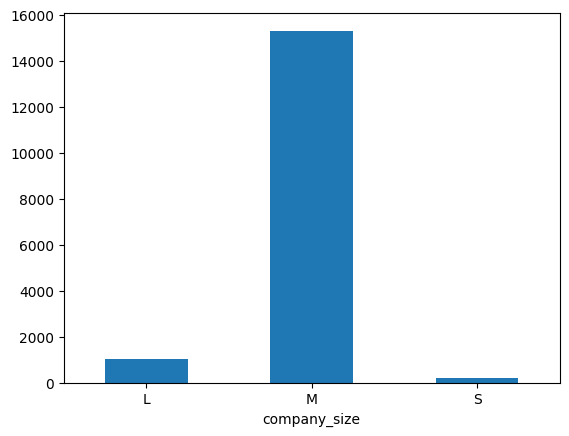

In [568]:
company_size['count'].plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

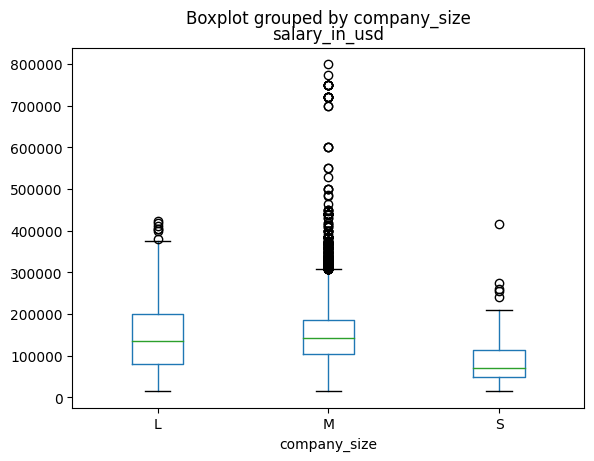

In [569]:
df.boxplot(by='company_size', column =['salary_in_usd'], grid = False)
plt.show()

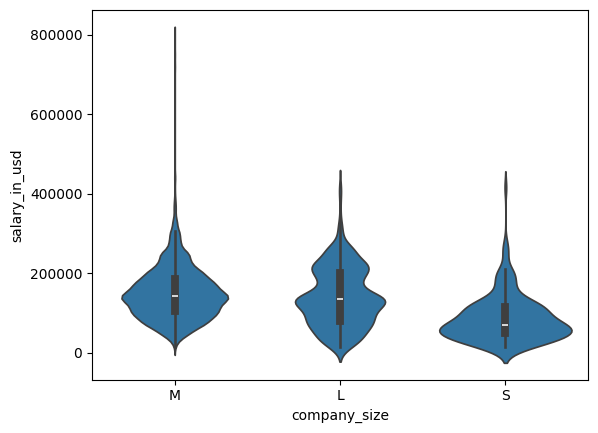

In [570]:
sns.violinplot(data=df, x="company_size", y="salary_in_usd")
plt.show()

In [571]:
company_size['iq'] = company_size['75%'] - company_size['25%']

In [572]:
company_size['low'] = company_size['25%'] - 1.5*company_size.iq

In [573]:
company_size['high'] = company_size['75%'] + 1.5*company_size.iq

In [574]:
company_size

count           mean           std      min       25%  \
company_size                                                            
L              1040.0  140889.563462  73762.237801  15000.0   80750.0   
M             15306.0  151059.071214  67848.933189  15000.0  104663.0   
S               188.0   86627.111702  57709.106926  15809.0   50000.0   

                   50%       75%       max  percentage        iq      low  \
company_size                                                                
L             136000.0  200000.0  423000.0    6.290069  119250.0 -98125.0   
M             143000.0  185900.0  800000.0   92.572880   81237.0 -17192.5   
S              71089.5  115000.0  416000.0    1.137051   65000.0 -47500.0   

                  high  
company_size            
L             378875.0  
M             307755.5  
S             212500.0

# Drop original columns

In [576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            16534 non-null  int64 
 1   experience_level     16534 non-null  object
 2   employment_type      16534 non-null  object
 3   job_title            16534 non-null  object
 4   job_title_recode     16534 non-null  object
 5   salary               16534 non-null  int64 
 6   salary_currency      16534 non-null  object
 7   salary_in_usd        16534 non-null  int64 
 8   employee_residence   16534 non-null  object
 9   remote_ratio         16534 non-null  int64 
 10  company_location     16534 non-null  object
 11  company_size         16534 non-null  object
 12  employment_type_FT   16534 non-null  int64 
 13  job_titles           16534 non-null  object
 14  salary_currencies    16534 non-null  object
 15  employee_residences  16534 non-null  object
 16  comp

In [577]:
df.drop(columns=['employment_type',
                 'job_title',
                 'job_title_recode',
                 'salary',
                 'salary_currency',
                 'employee_residence',
                 'company_location'], inplace = True)

In [581]:
df.work_year = df.work_year.astype(str)

In [583]:
df.remote_ratio = df.remote_ratio.astype(str)

In [584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            16534 non-null  object
 1   experience_level     16534 non-null  object
 2   salary_in_usd        16534 non-null  int64 
 3   remote_ratio         16534 non-null  object
 4   company_size         16534 non-null  object
 5   employment_type_FT   16534 non-null  int64 
 6   job_titles           16534 non-null  object
 7   salary_currencies    16534 non-null  object
 8   employee_residences  16534 non-null  object
 9   company_locations    16534 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.3+ MB


# Hypothesis testing

## Work year

### Original

In [652]:
df_hypo = df[['work_year', 'salary_in_usd']]

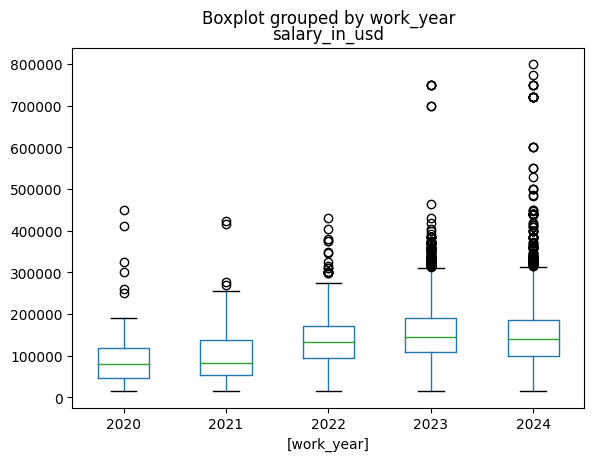

In [653]:
df_hypo.boxplot(by='work_year', grid = False)
plt.show()

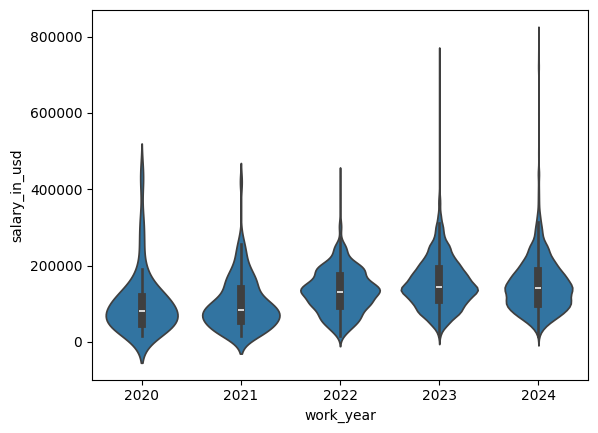

In [654]:
order = ['2020', '2021', '2022', '2023', '2024']
sns.violinplot(data=df_hypo, x="work_year", y="salary_in_usd", order=order)
plt.show()

### Sampling

In [655]:
X = np.array(df_hypo.salary_in_usd).reshape(-1, 1)
y = df_hypo.work_year

In [656]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [657]:
X_resampled = np.reshape(X_resampled, -1)

In [658]:
X_resampled.size

375

In [659]:
y_resampled.size

375

In [660]:
df_hypo = pd.DataFrame({'work_year': y_resampled, 'salary_in_usd': X_resampled})

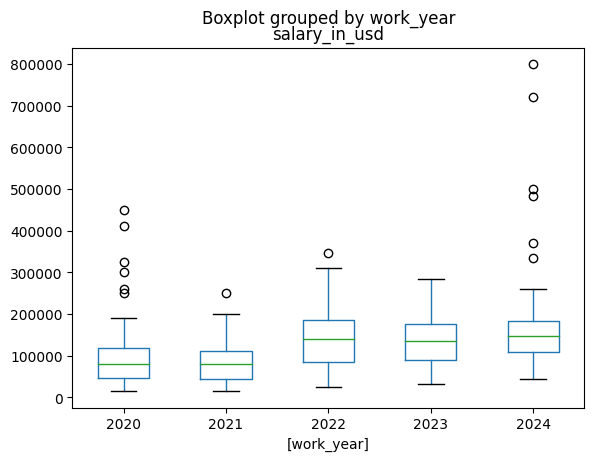

In [661]:
df_hypo.boxplot(by='work_year', grid = False)
plt.show()

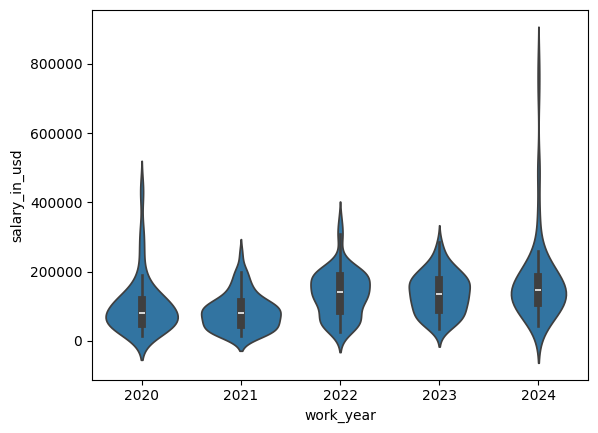

In [662]:
order = ['2020', '2021', '2022', '2023', '2024']
sns.violinplot(data=df_hypo, x="work_year", y="salary_in_usd", order=order)
plt.show()

In [663]:
salary_2020 = np.array(df_hypo[df_hypo.work_year == '2020'][['salary_in_usd']])
salary_2021 = np.array(df_hypo[df_hypo.work_year == '2021'][['salary_in_usd']])
salary_2022 = np.array(df_hypo[df_hypo.work_year == '2022'][['salary_in_usd']])
salary_2023 = np.array(df_hypo[df_hypo.work_year == '2023'][['salary_in_usd']])
salary_2024 = np.array(df_hypo[df_hypo.work_year == '2024'][['salary_in_usd']])

### Hypothesis testing

In [664]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2021 data engineers have salary no higher than 2020 data engineers."
alternate_hypothesis = "2021 data engineers have salary higher than 2020 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2021, salary_2020)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2021 is lower than 2020 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2021 is higher than 2020 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2021 and 2020 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-1.56384315]
P-value: [0.1221211]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for 2021 and 2020 data engineers.


In [665]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2022 data engineers have salary no higher than 2021 data engineers."
alternate_hypothesis = "2022 data engineers have salary higher than 2021 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2022, salary_2021)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2022 is lower than 2021 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2022 is higher than 2021 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2022 and 2021 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [5.58722461]
P-value: [3.64284115e-07]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2022 is higher than 2021 data engineers.


In [666]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2023 data engineers have salary no higher than 2022 data engineers."
alternate_hypothesis = "2023 data engineers have salary higher than 2022 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2023, salary_2022)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2023 is lower than 2022 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2023 is higher than 2022 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2023 and 2022 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-0.01935993]
P-value: [0.98460608]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for 2023 and 2022 data engineers.


In [667]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2024 data engineers have salary no higher than 2023 data engineers."
alternate_hypothesis = "2024 data engineers have salary higher than 2023 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2024, salary_2023)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is lower than 2023 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is higher than 2023 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2024 and 2023 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [2.20223513]
P-value: [0.03076426]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2024 is higher than 2023 data engineers.


### Exclude category outliers

In [668]:
df_hypo = df[['work_year', 'salary_in_usd']]

In [669]:
df_hypo = df_hypo[((df_hypo.work_year == '2020') & (df_hypo.salary_in_usd <= work_year.high.loc[2020]) & (df_hypo.salary_in_usd >= work_year.low.loc[2020])) |
                  ((df_hypo.work_year == '2021') & (df_hypo.salary_in_usd <= work_year.high.loc[2021]) & (df_hypo.salary_in_usd >= work_year.low.loc[2021])) |
                  ((df_hypo.work_year == '2022') & (df_hypo.salary_in_usd <= work_year.high.loc[2022]) & (df_hypo.salary_in_usd >= work_year.low.loc[2022])) |
                  ((df_hypo.work_year == '2023') & (df_hypo.salary_in_usd <= work_year.high.loc[2023]) & (df_hypo.salary_in_usd >= work_year.low.loc[2023])) |
                  ((df_hypo.work_year == '2024') & (df_hypo.salary_in_usd <= work_year.high.loc[2024]) & (df_hypo.salary_in_usd >= work_year.low.loc[2024]))]

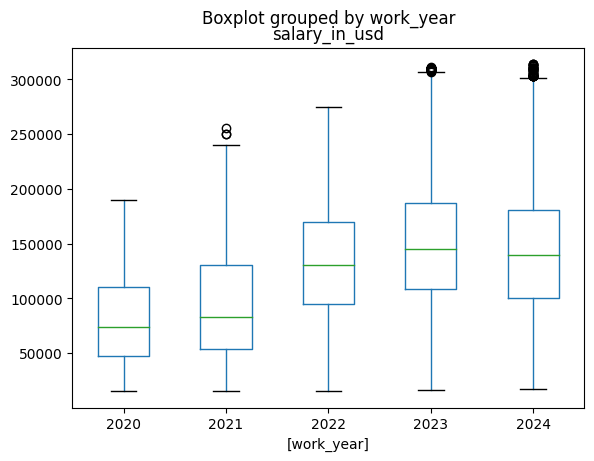

In [670]:
df_hypo.boxplot(by='work_year', grid = False)
plt.show()

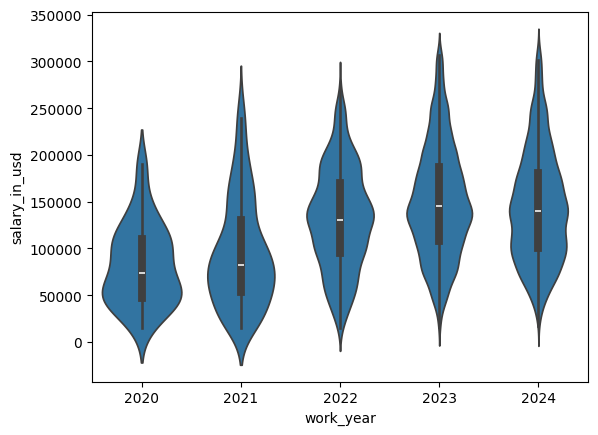

In [672]:
order = ['2020', '2021', '2022', '2023', '2024']
sns.violinplot(data=df_hypo, x="work_year", y="salary_in_usd", order=order)
plt.show()

### Sampling

In [673]:
X = np.array(df_hypo.salary_in_usd).reshape(-1, 1)
y = df_hypo.work_year

In [674]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [675]:
X_resampled = np.reshape(X_resampled, -1)

In [676]:
X_resampled.size

345

In [677]:
y_resampled.size

345

In [678]:
df_hypo = pd.DataFrame({'work_year': y_resampled, 'salary_in_usd': X_resampled})

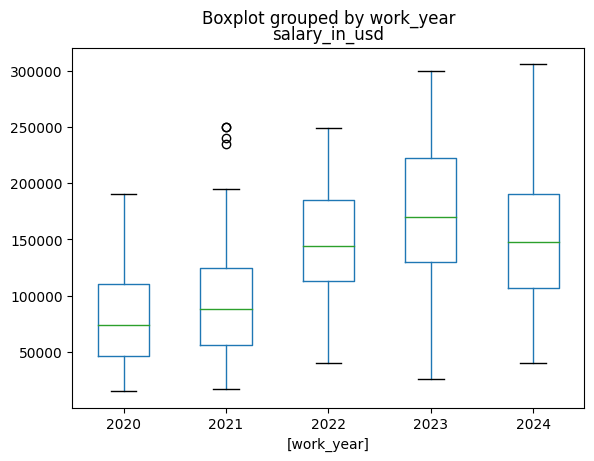

In [679]:
df_hypo.boxplot(by='work_year', grid = False)
plt.show()

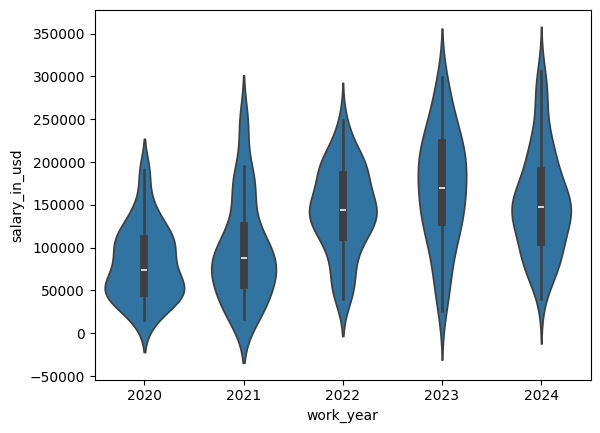

In [681]:
order = ['2020', '2021', '2022', '2023', '2024']
sns.violinplot(data=df_hypo, x="work_year", y="salary_in_usd", order=order)
plt.show()

In [682]:
salary_2020 = np.array(df_hypo[df_hypo.work_year == '2020'][['salary_in_usd']])
salary_2021 = np.array(df_hypo[df_hypo.work_year == '2021'][['salary_in_usd']])
salary_2022 = np.array(df_hypo[df_hypo.work_year == '2022'][['salary_in_usd']])
salary_2023 = np.array(df_hypo[df_hypo.work_year == '2023'][['salary_in_usd']])
salary_2024 = np.array(df_hypo[df_hypo.work_year == '2024'][['salary_in_usd']])

### Hypothesis testing

In [683]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2021 data engineers have salary no higher than 2020 data engineers."
alternate_hypothesis = "2021 data engineers have salary higher than 2020 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2021, salary_2020)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2021 is lower than 2020 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2021 is higher than 2020 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2021 and 2020 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [1.51971657]
P-value: [0.13321851]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for 2021 and 2020 data engineers.


In [684]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2022 data engineers have salary no higher than 2021 data engineers."
alternate_hypothesis = "2022 data engineers have salary higher than 2021 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2022, salary_2021)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2022 is lower than 2021 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2022 is higher than 2021 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2022 and 2021 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [4.83500894]
P-value: [7.95054659e-06]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2022 is higher than 2021 data engineers.


In [685]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2023 data engineers have salary no higher than 2022 data engineers."
alternate_hypothesis = "2023 data engineers have salary higher than 2022 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2023, salary_2022)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2023 is lower than 2022 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2023 is higher than 2022 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2023 and 2022 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [2.59937552]
P-value: [0.01144455]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2023 is higher than 2022 data engineers.


In [686]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2024 data engineers have salary no higher than 2023 data engineers."
alternate_hypothesis = "2024 data engineers have salary higher than 2023 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2024, salary_2023)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is lower than 2023 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is higher than 2023 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2024 and 2023 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-1.50327839]
P-value: [0.13739758]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for 2024 and 2023 data engineers.


## Experience level

### Original

In [687]:
df_hypo = df[['experience_level', 'salary_in_usd']]

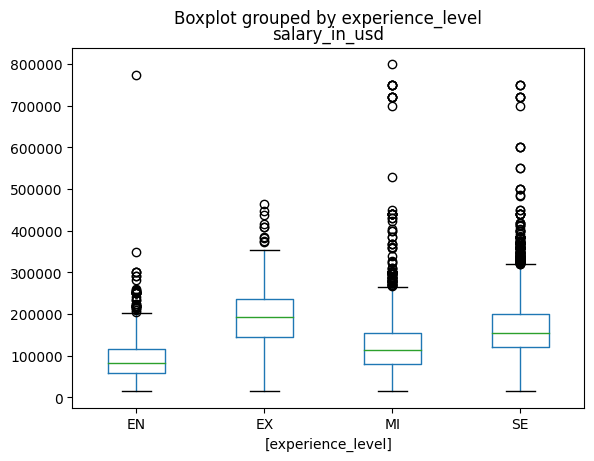

In [688]:
df_hypo.boxplot(by='experience_level', grid = False)
plt.show()

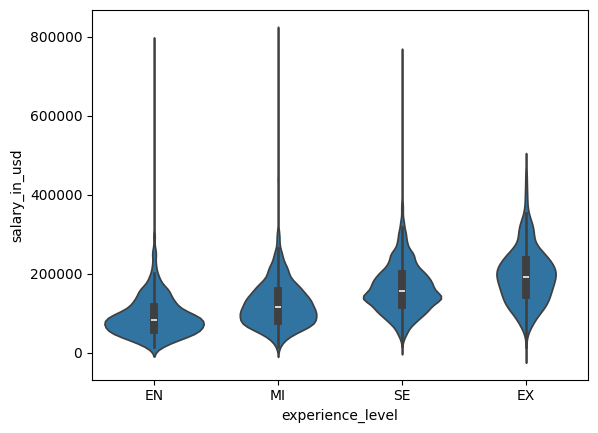

In [689]:
order = ['EN', 'MI', 'SE', 'EX']
sns.violinplot(data=df_hypo, x="experience_level", y="salary_in_usd", order=order)
plt.show()

### Sampling

In [691]:
X = np.array(df_hypo.salary_in_usd).reshape(-1, 1)
y = df_hypo.experience_level

In [692]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [693]:
X_resampled = np.reshape(X_resampled, -1)

In [694]:
X_resampled.size

2004

In [695]:
y_resampled.size

2004

In [696]:
df_hypo = pd.DataFrame({'experience_level': y_resampled, 'salary_in_usd': X_resampled})

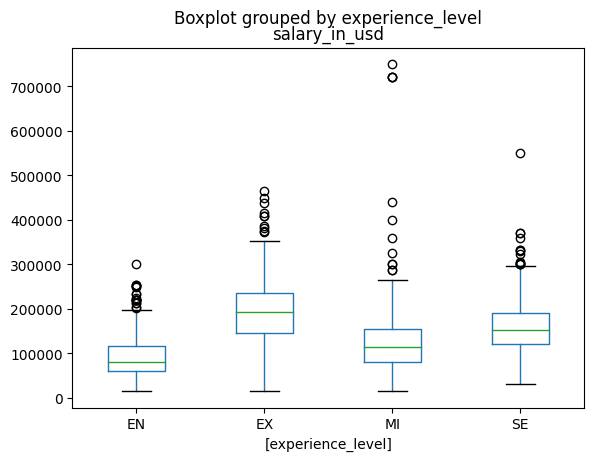

In [697]:
df_hypo.boxplot(by='experience_level', grid = False)
plt.show()

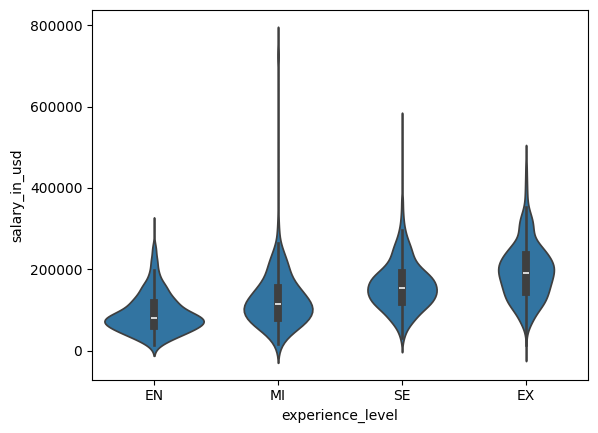

In [698]:
order = ['EN', 'MI', 'SE', 'EX']
sns.violinplot(data=df_hypo, x="experience_level", y="salary_in_usd", order=order)
plt.show()

In [699]:
salary_EN = np.array(df_hypo[df_hypo.experience_level == 'EN'][['salary_in_usd']])
salary_MI = np.array(df_hypo[df_hypo.experience_level == 'MI'][['salary_in_usd']])
salary_SE = np.array(df_hypo[df_hypo.experience_level == 'SE'][['salary_in_usd']])
salary_EX = np.array(df_hypo[df_hypo.experience_level == 'EX'][['salary_in_usd']])

### Hypothesis testing

In [700]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Middle level data engineers have salary no higher than entry level data engineers."
alternate_hypothesis = "Middle level data engineers have salary higher than entry level data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_MI, salary_EN)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for middle level is lower than entry level data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for middle level is higher than entry level data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for middle level and entry level data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [8.8167745]
P-value: [1.96169043e-17]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for middle level is higher than entry level data engineers.


In [701]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Senior level data engineers have salary no higher than middle level data engineers."
alternate_hypothesis = "Senior level data engineers have salary higher than middle level data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_SE, salary_MI)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for senior level is lower than middle level data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for senior level is higher than middle level data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for senior level and middle level data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [7.1667395]
P-value: [2.77234972e-12]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for senior level is higher than middle level data engineers.


In [702]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Expert level data engineers have salary no higher than senior level data engineers."
alternate_hypothesis = "Expert level data engineers have salary higher than senior level data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_EX, salary_SE)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for expert level is lower than senior level data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for expert level is higher than senior level data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for expert level and senior level data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [8.47410283]
P-value: [2.6694792e-16]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for expert level is higher than senior level data engineers.


### Exclude category outliers

In [719]:
df_hypo = df[['experience_level', 'salary_in_usd']]

In [720]:
df_hypo = df_hypo[((df_hypo.experience_level == 'EN') & (df_hypo.salary_in_usd <= experience_level.high.loc['EN']) & (df_hypo.salary_in_usd >= experience_level.low.loc['EN'])) |
                  ((df_hypo.experience_level == 'MI') & (df_hypo.salary_in_usd <= experience_level.high.loc['MI']) & (df_hypo.salary_in_usd >= experience_level.low.loc['MI'])) |
                  ((df_hypo.experience_level == 'SE') & (df_hypo.salary_in_usd <= experience_level.high.loc['SE']) & (df_hypo.salary_in_usd >= experience_level.low.loc['SE'])) |
                  ((df_hypo.experience_level == 'EX') & (df_hypo.salary_in_usd <= experience_level.high.loc['EX']) & (df_hypo.salary_in_usd >= experience_level.low.loc['EX']))]

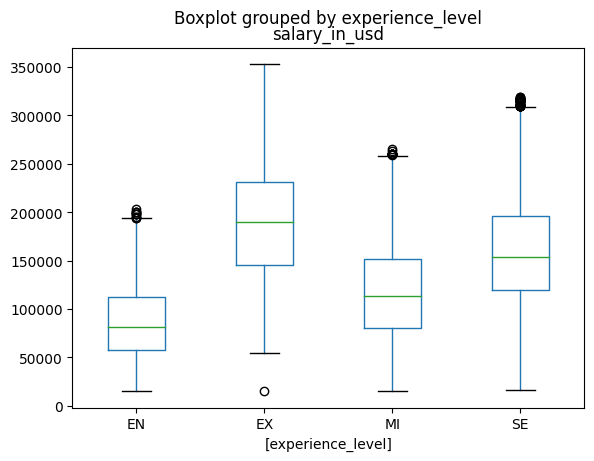

In [721]:
df_hypo.boxplot(by='experience_level', grid = False)
plt.show()

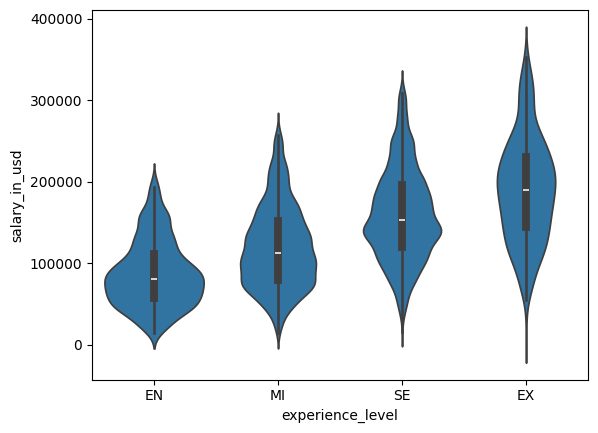

In [722]:
order = ['EN', 'MI', 'SE', 'EX']
sns.violinplot(data=df_hypo, x="experience_level", y="salary_in_usd", order=order)
plt.show()

### Sampling

In [723]:
X = np.array(df_hypo.salary_in_usd).reshape(-1, 1)
y = df_hypo.experience_level

In [724]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [725]:
X_resampled = np.reshape(X_resampled, -1)

In [726]:
X_resampled.size

1964

In [727]:
y_resampled.size

1964

In [728]:
df_hypo = pd.DataFrame({'experience_level': y_resampled, 'salary_in_usd': X_resampled})

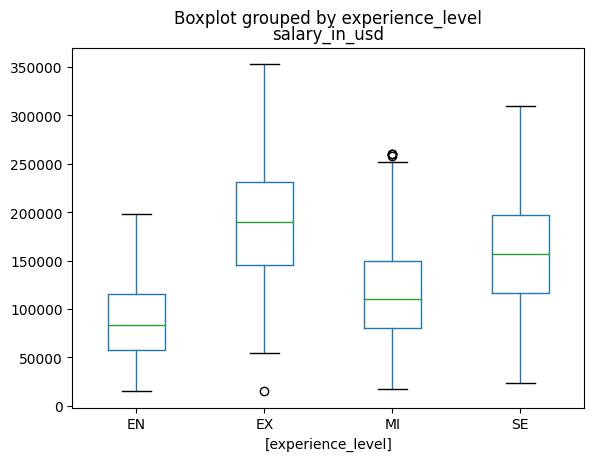

In [729]:
df_hypo.boxplot(by='experience_level', grid = False)
plt.show()

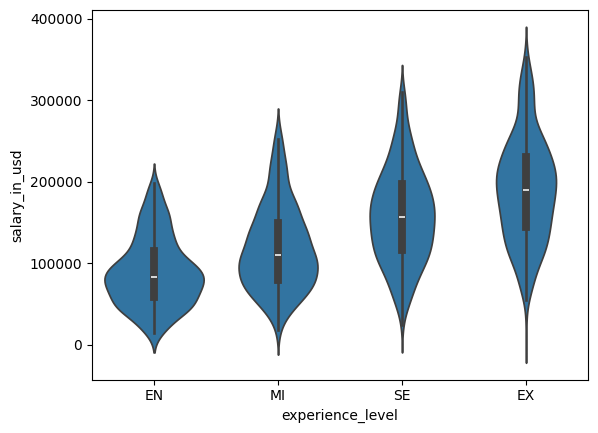

In [730]:
order = ['EN', 'MI', 'SE', 'EX']
sns.violinplot(data=df_hypo, x="experience_level", y="salary_in_usd", order=order)
plt.show()

In [731]:
salary_EN = np.array(df_hypo[df_hypo.experience_level == 'EN'][['salary_in_usd']])
salary_MI = np.array(df_hypo[df_hypo.experience_level == 'MI'][['salary_in_usd']])
salary_SE = np.array(df_hypo[df_hypo.experience_level == 'SE'][['salary_in_usd']])
salary_EX = np.array(df_hypo[df_hypo.experience_level == 'EX'][['salary_in_usd']])

### Hypothesis testing

In [732]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Middle level data engineers have salary no higher than entry level data engineers."
alternate_hypothesis = "Middle level data engineers have salary higher than entry level data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_MI, salary_EN)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for middle level is lower than entry level data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for middle level is higher than entry level data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for middle level and entry level data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [10.09358567]
P-value: [6.84308634e-22]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for middle level is higher than entry level data engineers.


In [733]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Senior level data engineers have salary no higher than middle level data engineers."
alternate_hypothesis = "Senior level data engineers have salary higher than middle level data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_SE, salary_MI)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for senior level is lower than middle level data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for senior level is higher than middle level data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for senior level and middle level data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [11.40885367]
P-value: [6.70897827e-27]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for senior level is higher than middle level data engineers.


In [734]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Expert level data engineers have salary no higher than senior level data engineers."
alternate_hypothesis = "Expert level data engineers have salary higher than senior level data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_EX, salary_SE)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for expert level is lower than senior level data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for expert level is higher than senior level data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for expert level and senior level data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [8.81687696]
P-value: [2.06489826e-17]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for expert level is higher than senior level data engineers.


## Employment type

### Original

In [736]:
df_hypo = df[['employment_type_FT', 'salary_in_usd']]

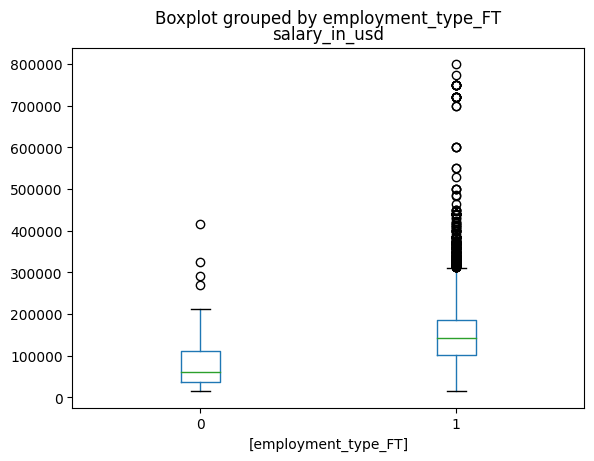

In [737]:
df_hypo.boxplot(by='employment_type_FT', grid = False)
plt.show()

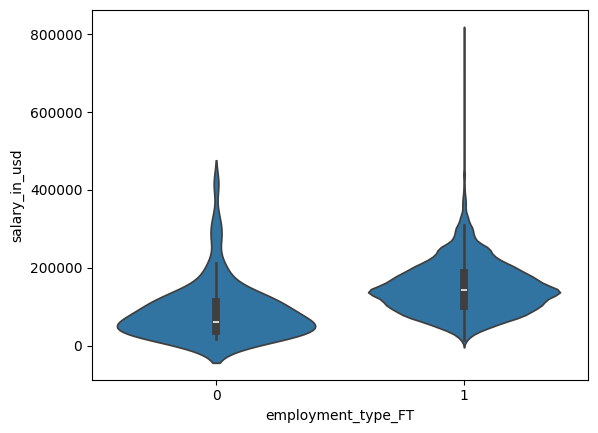

In [738]:
sns.violinplot(data=df_hypo, x="employment_type_FT", y="salary_in_usd")
plt.show()

### Sampling

In [740]:
X = np.array(df_hypo.salary_in_usd).reshape(-1, 1)
y = df_hypo.employment_type_FT

In [741]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [742]:
X_resampled = np.reshape(X_resampled, -1)

In [743]:
X_resampled.size

160

In [744]:
y_resampled.size

160

In [745]:
df_hypo = pd.DataFrame({'employment_type_FT': y_resampled, 'salary_in_usd': X_resampled})

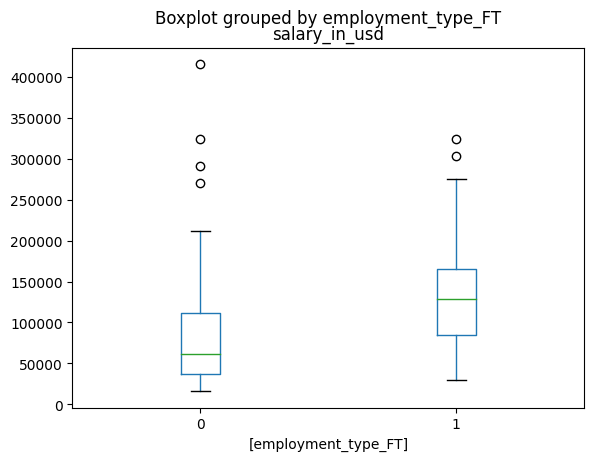

In [746]:
df_hypo.boxplot(by='employment_type_FT', grid = False)
plt.show()

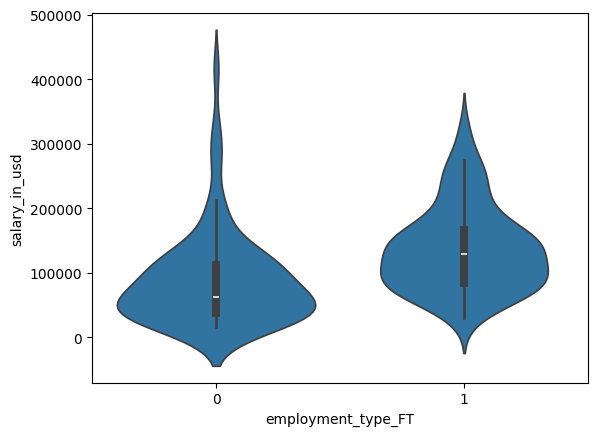

In [748]:
sns.violinplot(data=df_hypo, x="employment_type_FT", y="salary_in_usd")
plt.show()

In [752]:
salary_FT = np.array(df_hypo[df_hypo.employment_type_FT == 1][['salary_in_usd']])
salary_other = np.array(df_hypo[df_hypo.employment_type_FT == 0][['salary_in_usd']])

### Hypothesis testing

In [753]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Full-time data engineers have salary no higher than other data engineers."
alternate_hypothesis = "Full-time data engineers have salary higher than other data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_FT, salary_other)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for full-time is lower than other data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for full-time is higher than other data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for full-time and other data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [4.33145566]
P-value: [4.31111577e-05]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for full-time is higher than other data engineers.


### Exclude category outliers

In [ ]:
df_hypo = df[['experience_level', 'salary_in_usd']]

In [755]:
df_hypo = df_hypo[((df_hypo.employment_type_FT == 0) & (df_hypo.salary_in_usd <= employment_type_FT.high.loc[0]) & (df_hypo.salary_in_usd >= employment_type_FT.low.loc[0])) |
                  ((df_hypo.employment_type_FT == 1) & (df_hypo.salary_in_usd <= employment_type_FT.high.loc[1]) & (df_hypo.salary_in_usd >= employment_type_FT.low.loc[1]))]

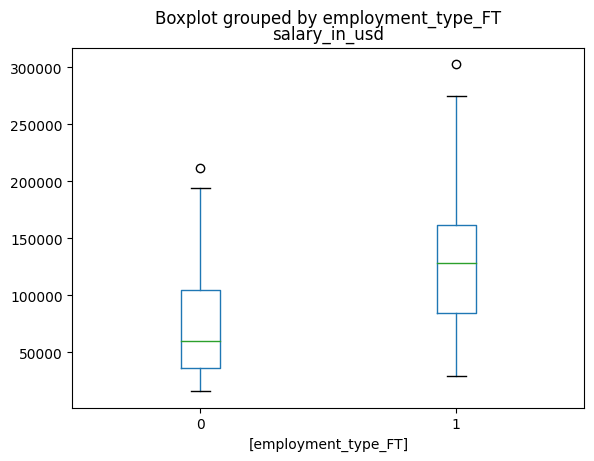

In [756]:
df_hypo.boxplot(by='employment_type_FT', grid = False)
plt.show()

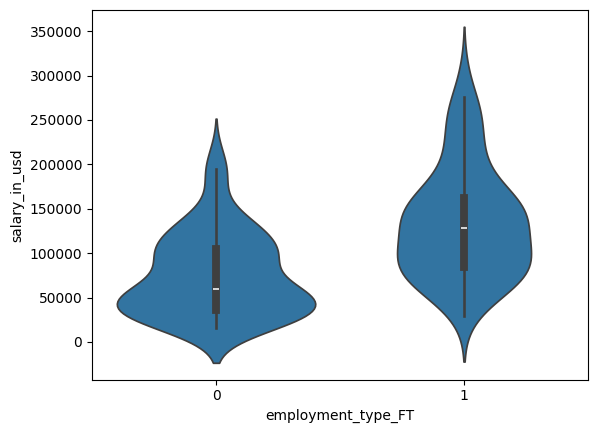

In [757]:
sns.violinplot(data=df_hypo, x="employment_type_FT", y="salary_in_usd")
plt.show()

### Sampling

In [759]:
X = np.array(df_hypo.salary_in_usd).reshape(-1, 1)
y = df_hypo.employment_type_FT

In [760]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [761]:
X_resampled = np.reshape(X_resampled, -1)

In [762]:
X_resampled.size

152

In [763]:
y_resampled.size

152

In [764]:
df_hypo = pd.DataFrame({'employment_type_FT': y_resampled, 'salary_in_usd': X_resampled})

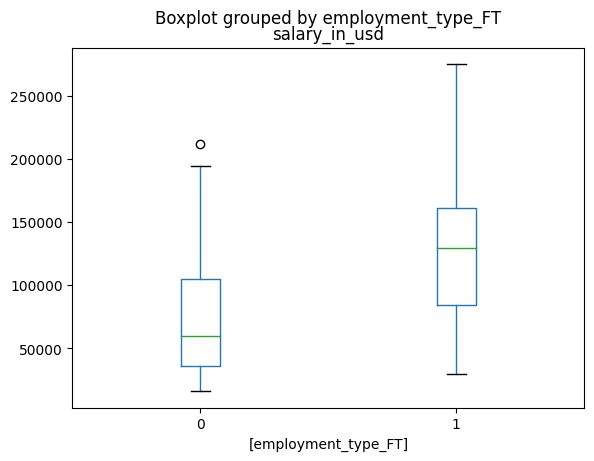

In [765]:
df_hypo.boxplot(by='employment_type_FT', grid = False)
plt.show()

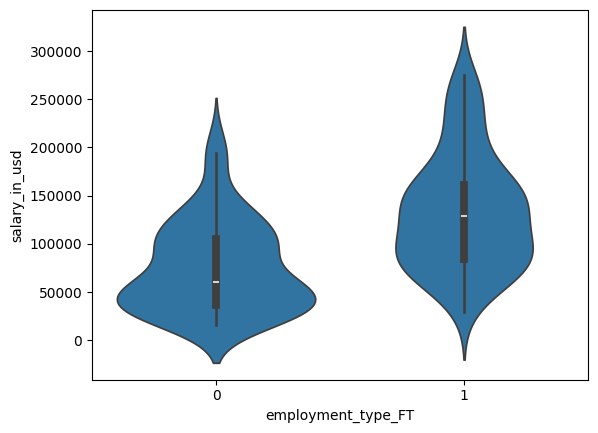

In [767]:
sns.violinplot(data=df_hypo, x="employment_type_FT", y="salary_in_usd")
plt.show()

In [768]:
salary_FT = np.array(df_hypo[df_hypo.employment_type_FT == 1][['salary_in_usd']])
salary_other = np.array(df_hypo[df_hypo.employment_type_FT == 0][['salary_in_usd']])

### Hypothesis testing

In [769]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Full-time data engineers have salary no higher than other data engineers."
alternate_hypothesis = "Full-time data engineers have salary higher than other data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_FT, salary_other)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for full-time is lower than other data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for full-time is higher than other data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for full-time and other data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [6.70490595]
P-value: [3.30085029e-09]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for full-time is higher than other data engineers.


## Job title

### Original

In [781]:
df_hypo = df[['job_titles', 'salary_in_usd']]

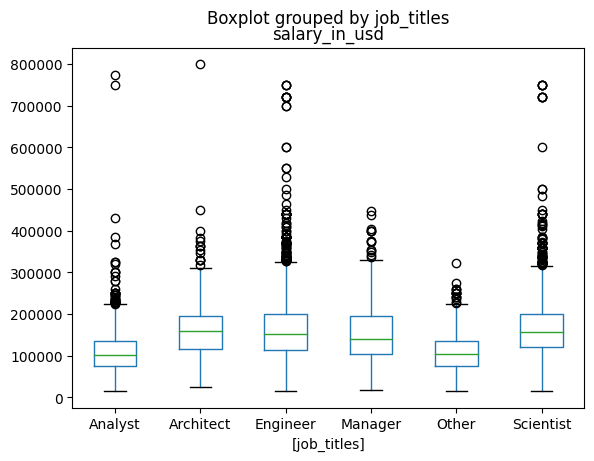

In [782]:
df_hypo.boxplot(by='job_titles', grid = False)
plt.show()

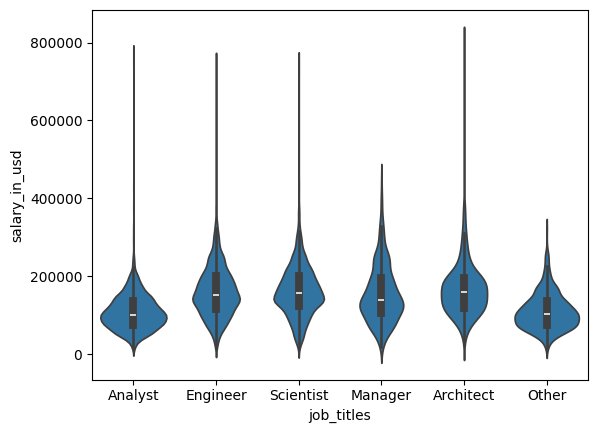

In [783]:
order = ['Analyst', 'Engineer', 'Scientist', 'Manager', 'Architect', 'Other']
sns.violinplot(data=df_hypo, x="job_titles", y="salary_in_usd", order = order)
plt.show()

### Sampling

In [784]:
X = np.array(df_hypo.salary_in_usd).reshape(-1, 1)
y = df_hypo.job_titles

In [785]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [786]:
X_resampled = np.reshape(X_resampled, -1)

In [787]:
X_resampled.size

2814

In [788]:
y_resampled.size

2814

In [789]:
df_hypo = pd.DataFrame({'job_titles': y_resampled, 'salary_in_usd': X_resampled})

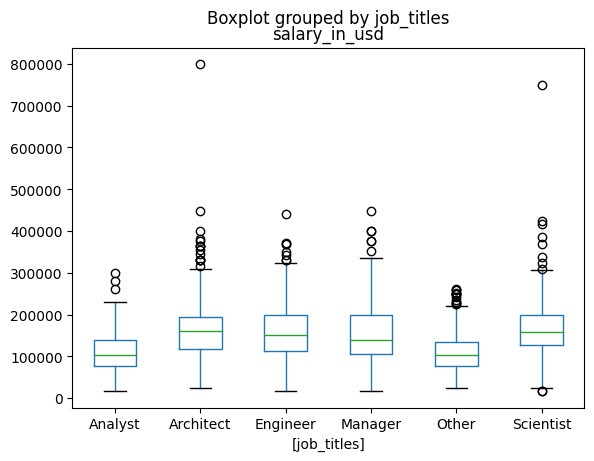

In [790]:
df_hypo.boxplot(by='job_titles', grid = False)
plt.show()

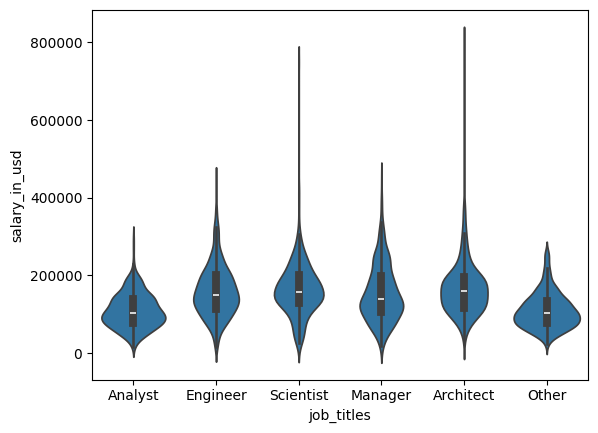

In [791]:
order = ['Analyst', 'Engineer', 'Scientist', 'Manager', 'Architect', 'Other']
sns.violinplot(data=df_hypo, x="job_titles", y="salary_in_usd", order = order)
plt.show()

In [792]:
salary_Analyst = np.array(df_hypo[df_hypo.job_titles == 'Analyst'][['salary_in_usd']])
salary_Engineer = np.array(df_hypo[df_hypo.job_titles == 'Engineer'][['salary_in_usd']])
salary_Scientist = np.array(df_hypo[df_hypo.job_titles == 'Scientist'][['salary_in_usd']])
salary_Manager = np.array(df_hypo[df_hypo.job_titles == 'Manager'][['salary_in_usd']])
salary_Architect = np.array(df_hypo[df_hypo.job_titles == 'Architect'][['salary_in_usd']])
salary_Other = np.array(df_hypo[df_hypo.job_titles == 'Other'][['salary_in_usd']])

### Hypothesis testing

In [793]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Analysts have salary no higher than engineers."
alternate_hypothesis = "Analyst have salary higher than engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_Analyst, salary_Engineer)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for analysts is lower than engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for analysts is higher than engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for analysts and engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-13.41984065]
P-value: [5.71240242e-35]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for analysts is lower than engineers.


In [794]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Scientists have salary no higher than engineers."
alternate_hypothesis = "Scientists have salary higher than engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_Scientist, salary_Engineer)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for scientists is lower than engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for scientists is higher than engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for scientists and engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [0.94186972]
P-value: [0.34674527]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for scientists and engineers.


In [795]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Managers have salary no higher than engineers."
alternate_hypothesis = "Managers have salary higher than engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_Manager, salary_Engineer)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for managers is lower than engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for managers is higher than engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for managers and engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-1.09149258]
P-value: [0.27561779]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for managers and engineers.


In [796]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Architects have salary no higher than engineers."
alternate_hypothesis = "Architects have salary higher than engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_Architect, salary_Engineer)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for architects is lower than engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for architects is higher than engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for architects and engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [1.56485527]
P-value: [0.11829275]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for architects and engineers.


In [801]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Analysts have salary no higher than other careers."
alternate_hypothesis = "Analysts have salary higher than other careers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_Analyst, salary_Other)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for analysts is lower than other careers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for analysts is higher than other careers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for analysts and other careers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-0.17987438]
P-value: [0.85732904]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for analysts and other careers.


### Exclude category outliers

In [797]:
df_hypo = df[['job_titles', 'salary_in_usd']]

In [798]:
df_hypo = df_hypo[((df_hypo.job_titles == 'Analyst') & (df_hypo.salary_in_usd <= job_titles.high.loc['Analyst']) & (df_hypo.salary_in_usd >= job_titles.low.loc['Analyst'])) |
                  ((df_hypo.job_titles == 'Engineer') & (df_hypo.salary_in_usd <= job_titles.high.loc['Engineer']) & (df_hypo.salary_in_usd >= job_titles.low.loc['Engineer'])) |
                  ((df_hypo.job_titles == 'Scientist') & (df_hypo.salary_in_usd <= job_titles.high.loc['Scientist']) & (df_hypo.salary_in_usd >= job_titles.low.loc['Scientist'])) |
                  ((df_hypo.job_titles == 'Manager') & (df_hypo.salary_in_usd <= job_titles.high.loc['Manager']) & (df_hypo.salary_in_usd >= job_titles.low.loc['Manager'])) |
                  ((df_hypo.job_titles == 'Architect') & (df_hypo.salary_in_usd <= job_titles.high.loc['Architect']) & (df_hypo.salary_in_usd >= job_titles.low.loc['Architect'])) |
                  ((df_hypo.job_titles == 'Other') & (df_hypo.salary_in_usd <= job_titles.high.loc['Other']) & (df_hypo.salary_in_usd >= job_titles.low.loc['Other']))]

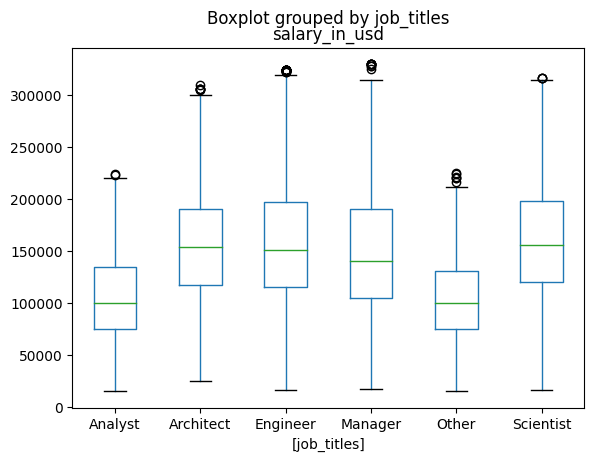

In [799]:
df_hypo.boxplot(by='job_titles', grid = False)
plt.show()

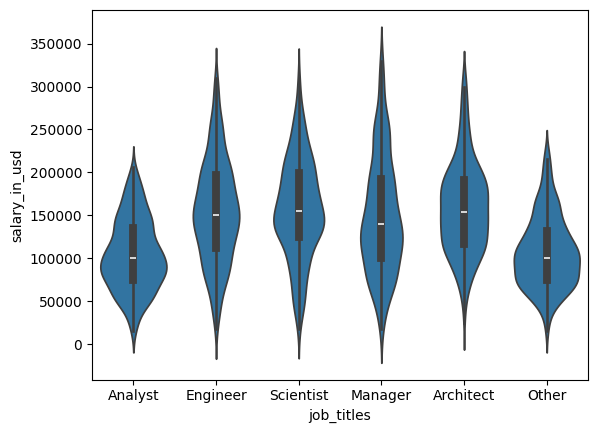

In [809]:
order = ['Analyst', 'Engineer', 'Scientist', 'Manager', 'Architect', 'Other']
sns.violinplot(data=df_hypo, x="job_titles", y="salary_in_usd", order = order)
plt.show()

### Sampling

In [802]:
X = np.array(df_hypo.salary_in_usd).reshape(-1, 1)
y = df_hypo.job_titles

In [803]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [804]:
X_resampled = np.reshape(X_resampled, -1)

In [811]:
X_resampled.size

2724

In [812]:
y_resampled.size

2724

In [813]:
df_hypo = pd.DataFrame({'job_titles': y_resampled, 'salary_in_usd': X_resampled})

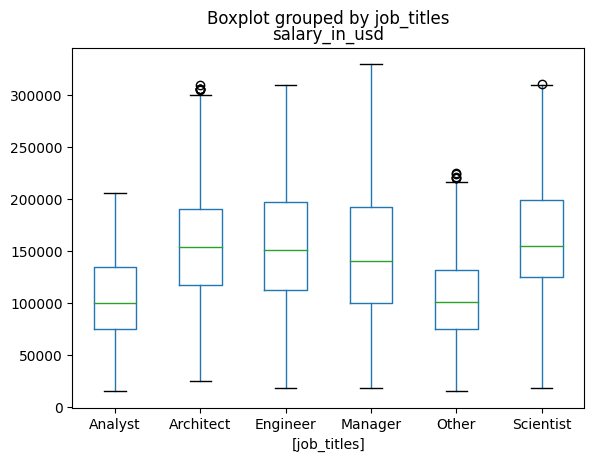

In [814]:
df_hypo.boxplot(by='job_titles', grid = False)
plt.show()

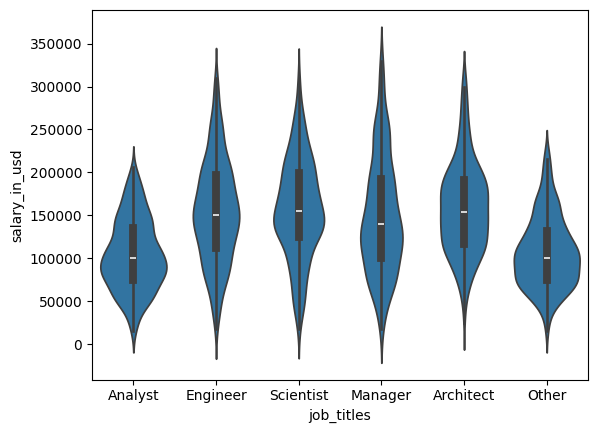

In [815]:
order = ['Analyst', 'Engineer', 'Scientist', 'Manager', 'Architect', 'Other']
sns.violinplot(data=df_hypo, x="job_titles", y="salary_in_usd", order = order)
plt.show()

In [816]:
salary_Analyst = np.array(df_hypo[df_hypo.job_titles == 'Analyst'][['salary_in_usd']])
salary_Engineer = np.array(df_hypo[df_hypo.job_titles == 'Engineer'][['salary_in_usd']])
salary_Scientist = np.array(df_hypo[df_hypo.job_titles == 'Scientist'][['salary_in_usd']])
salary_Manager = np.array(df_hypo[df_hypo.job_titles == 'Manager'][['salary_in_usd']])
salary_Architect = np.array(df_hypo[df_hypo.job_titles == 'Architect'][['salary_in_usd']])
salary_Other = np.array(df_hypo[df_hypo.job_titles == 'Other'][['salary_in_usd']])

### Hypothesis testing

In [822]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Analysts have salary no higher than engineers."
alternate_hypothesis = "Analyst have salary higher than engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_Analyst, salary_Engineer)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for analysts is lower than engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for analysts is higher than engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for analysts and engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-15.09901644]
P-value: [5.13643013e-42]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for analysts is lower than engineers.


In [823]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Scientists have salary no higher than engineers."
alternate_hypothesis = "Scientists have salary higher than engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_Scientist, salary_Engineer)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for scientists is lower than engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for scientists is higher than engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for scientists and engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [0.76005132]
P-value: [0.44761928]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for scientists and engineers.


In [824]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Managers have salary no higher than engineers."
alternate_hypothesis = "Managers have salary higher than engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_Manager, salary_Engineer)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for managers is lower than engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for managers is higher than engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for managers and engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-1.27473192]
P-value: [0.2030576]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for managers and engineers.


In [825]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Architects have salary no higher than engineers."
alternate_hypothesis = "Architects have salary higher than engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_Architect, salary_Engineer)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for architects is lower than engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for architects is higher than engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for architects and engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [1.16286572]
P-value: [0.2454962]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for architects and engineers.


In [826]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Analysts have salary no higher than other careers."
alternate_hypothesis = "Analysts have salary higher than other careers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_Analyst, salary_Other)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for analysts is lower than other careers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for analysts is higher than other careers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for analysts and other careers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-1.10975303]
P-value: [0.26769422]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for analysts and other careers.


## Salary currency

### Original

In [827]:
df_hypo = df[['salary_currencies', 'salary_in_usd']]

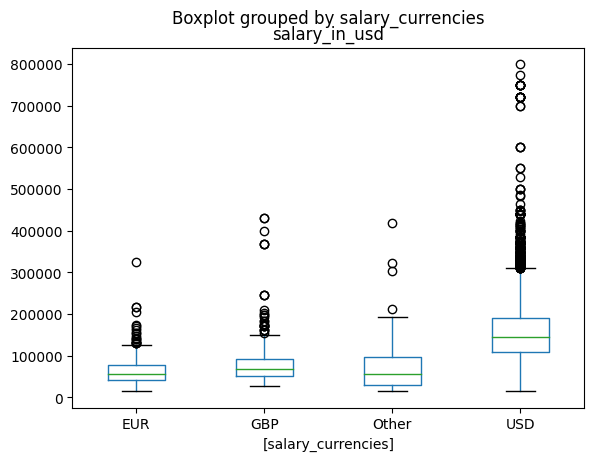

In [828]:
df_hypo.boxplot(by='salary_currencies', grid = False)
plt.show()

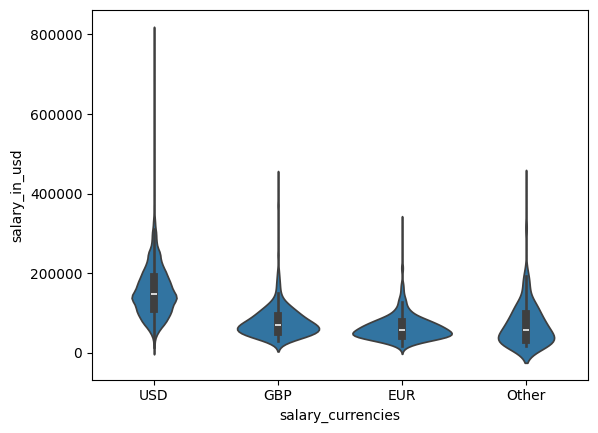

In [829]:
order = ['USD', 'GBP', 'EUR', 'Other']
sns.violinplot(data=df_hypo, x="salary_currencies", y="salary_in_usd", order = order)
plt.show()

### Sampling

In [830]:
X = np.array(df_hypo.salary_in_usd).reshape(-1, 1)
y = df_hypo.salary_currencies

In [831]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [832]:
X_resampled = np.reshape(X_resampled, -1)

In [833]:
X_resampled.size

700

In [834]:
y_resampled.size

700

In [835]:
df_hypo = pd.DataFrame({'salary_currencies': y_resampled, 'salary_in_usd': X_resampled})

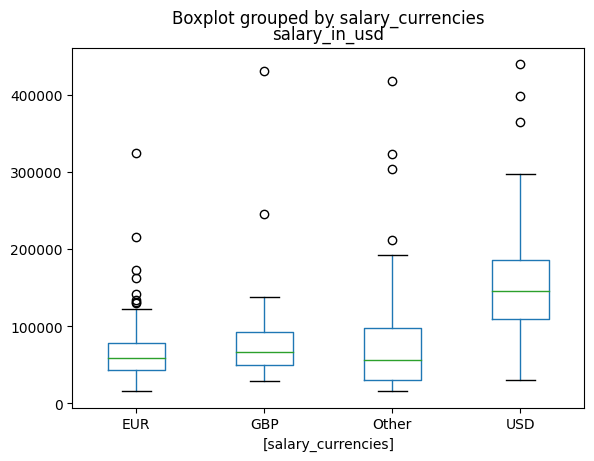

In [836]:
df_hypo.boxplot(by='salary_currencies', grid = False)
plt.show()

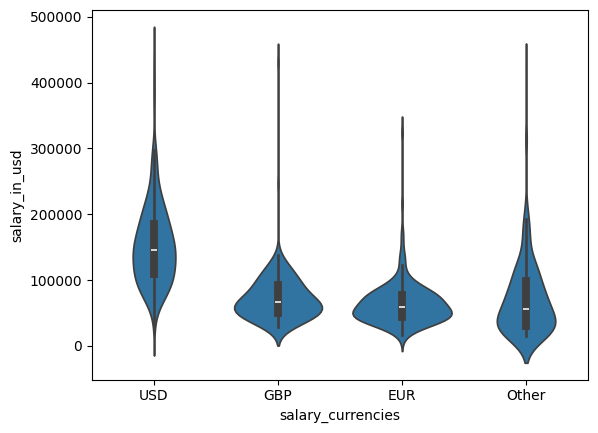

In [837]:
order = ['USD', 'GBP', 'EUR', 'Other']
sns.violinplot(data=df_hypo, x="salary_currencies", y="salary_in_usd", order = order)
plt.show()

In [838]:
salary_USD = np.array(df_hypo[df_hypo.salary_currencies == 'USD'][['salary_in_usd']])
salary_GBP = np.array(df_hypo[df_hypo.salary_currencies == 'GBP'][['salary_in_usd']])
salary_EUR = np.array(df_hypo[df_hypo.salary_currencies == 'EUR'][['salary_in_usd']])
salary_Other = np.array(df_hypo[df_hypo.salary_currencies == 'Other'][['salary_in_usd']])

### Hypothesis testing

In [840]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Salaries in USD are no higher than salaries in GBP."
alternate_hypothesis = "Salaries in USD are higher than salaries in GBP."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_USD, salary_GBP)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary in USD is lower than salary in GBP."
	else:
		conclusion = "There is statistically significant evidence that the average salary in USD is higher than salary in GBP."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary in USD and GBP."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [13.88290323]
P-value: [5.59327571e-30]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary in USD is higher than salary in GBP.


In [841]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Salaries in GBP are no higher than salaries in EUR."
alternate_hypothesis = "Salaries in GBP are higher than salaries in EUR."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_GBP, salary_EUR)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary in GBP is lower than salary in EUR."
	else:
		conclusion = "There is statistically significant evidence that the average salary in GBP is higher than salary in EUR."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary in GBP and EUR."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [2.11602213]
P-value: [0.03576551]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary in GBP is higher than salary in EUR.


In [842]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Salaries in EUR are no higher than salaries in other currencies."
alternate_hypothesis = "Salaries in EUR are higher than salaries in other currencies."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_EUR, salary_Other)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary in EUR is lower than salary in other currencies."
	else:
		conclusion = "There is statistically significant evidence that the average salary in EUR is higher than salary in other currencies."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary in EUR and other currencies."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-1.30792581]
P-value: [0.19262379]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary in EUR and other currencies.


### Exclude category outliers

In [846]:
df_hypo = df[['salary_currencies', 'salary_in_usd']]

In [847]:
df_hypo = df_hypo[((df_hypo.salary_currencies == 'USD') & (df_hypo.salary_in_usd <= salary_currencies.high.loc['USD']) & (df_hypo.salary_in_usd >= salary_currencies.low.loc['USD'])) |
                  ((df_hypo.salary_currencies == 'GBP') & (df_hypo.salary_in_usd <= salary_currencies.high.loc['GBP']) & (df_hypo.salary_in_usd >= salary_currencies.low.loc['GBP'])) |
                  ((df_hypo.salary_currencies == 'EUR') & (df_hypo.salary_in_usd <= salary_currencies.high.loc['EUR']) & (df_hypo.salary_in_usd >= salary_currencies.low.loc['EUR'])) |
                  ((df_hypo.salary_currencies == 'Other') & (df_hypo.salary_in_usd <= salary_currencies.high.loc['Other']) & (df_hypo.salary_in_usd >= salary_currencies.low.loc['Other']))]

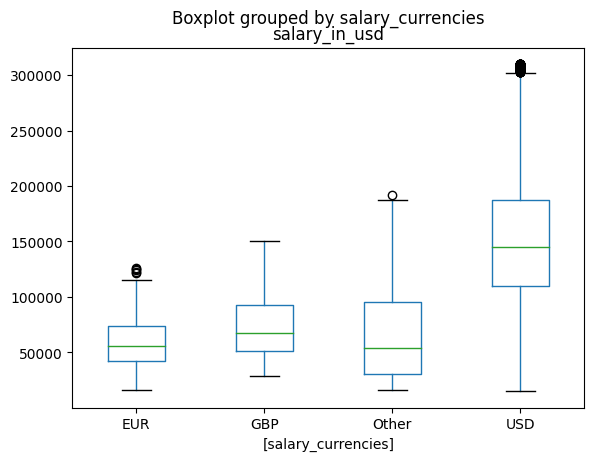

In [848]:
df_hypo.boxplot(by='salary_currencies', grid = False)
plt.show()

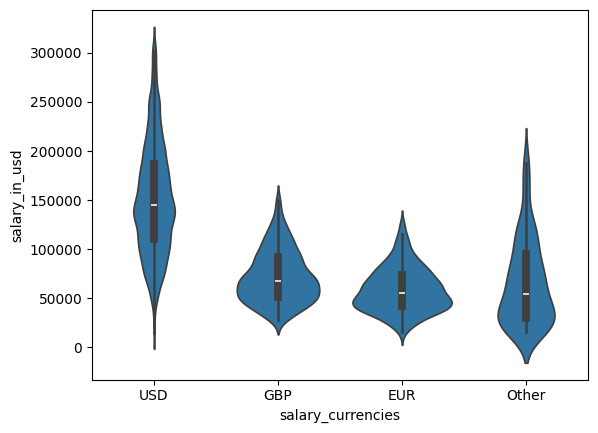

In [849]:
order = ['USD', 'GBP', 'EUR', 'Other']
sns.violinplot(data=df_hypo, x="salary_currencies", y="salary_in_usd", order = order)
plt.show()

### Sampling

In [850]:
X = np.array(df_hypo.salary_in_usd).reshape(-1, 1)
y = df_hypo.salary_currencies

In [851]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [852]:
X_resampled = np.reshape(X_resampled, -1)

In [853]:
X_resampled.size

684

In [854]:
y_resampled.size

684

In [855]:
df_hypo = pd.DataFrame({'salary_currencies': y_resampled, 'salary_in_usd': X_resampled})

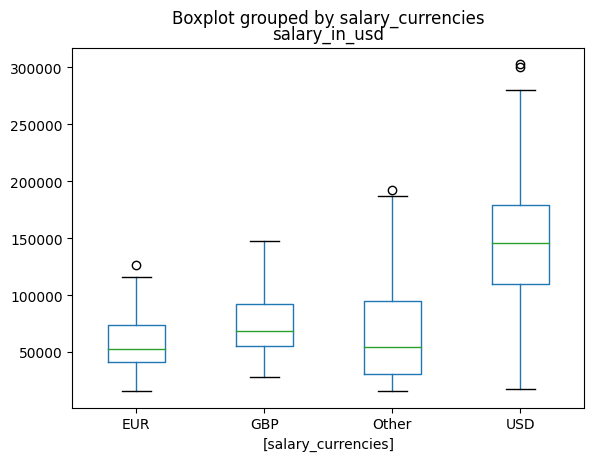

In [856]:
df_hypo.boxplot(by='salary_currencies', grid = False)
plt.show()

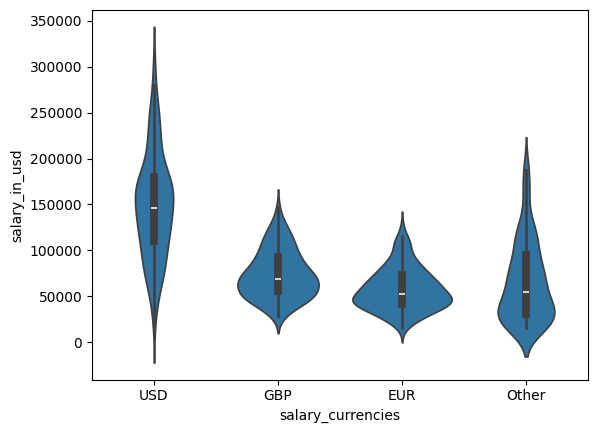

In [857]:
order = ['USD', 'GBP', 'EUR', 'Other']
sns.violinplot(data=df_hypo, x="salary_currencies", y="salary_in_usd", order = order)
plt.show()

In [858]:
salary_USD = np.array(df_hypo[df_hypo.salary_currencies == 'USD'][['salary_in_usd']])
salary_GBP = np.array(df_hypo[df_hypo.salary_currencies == 'GBP'][['salary_in_usd']])
salary_EUR = np.array(df_hypo[df_hypo.salary_currencies == 'EUR'][['salary_in_usd']])
salary_Other = np.array(df_hypo[df_hypo.salary_currencies == 'Other'][['salary_in_usd']])

### Hypothesis testing

In [859]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Salaries in USD are no higher than salaries in GBP."
alternate_hypothesis = "Salaries in USD are higher than salaries in GBP."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_USD, salary_GBP)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary in USD is lower than salary in GBP."
	else:
		conclusion = "There is statistically significant evidence that the average salary in USD is higher than salary in GBP."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary in USD and GBP."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [16.3150166]
P-value: [1.28325674e-36]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary in USD is higher than salary in GBP.


In [860]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Salaries in GBP are no higher than salaries in EUR."
alternate_hypothesis = "Salaries in GBP are higher than salaries in EUR."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_GBP, salary_EUR)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary in GBP is lower than salary in EUR."
	else:
		conclusion = "There is statistically significant evidence that the average salary in GBP is higher than salary in EUR."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary in GBP and EUR."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [5.6618529]
P-value: [6.2562035e-08]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary in GBP is higher than salary in EUR.


In [861]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Salaries in EUR are no higher than salaries in other currencies."
alternate_hypothesis = "Salaries in EUR are higher than salaries in other currencies."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_EUR, salary_Other)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary in EUR is lower than salary in other currencies."
	else:
		conclusion = "There is statistically significant evidence that the average salary in EUR is higher than salary in other currencies."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary in EUR and other currencies."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-2.19024369]
P-value: [0.02986809]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary in EUR is lower than salary in other currencies.


In [862]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Salaries in GBP are no higher than salaries in other currencies."
alternate_hypothesis = "Salaries in GBP are higher than salaries in other currencies."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_GBP, salary_Other)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary in GBP is lower than salary in other currencies."
	else:
		conclusion = "There is statistically significant evidence that the average salary in GBP is higher than salary in other currencies."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary in GBP and other currencies."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [2.13159591]
P-value: [0.03447681]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary in GBP is higher than salary in other currencies.


## Employee residence

### Original

In [864]:
df_hypo = df[['employee_residences', 'salary_in_usd']]

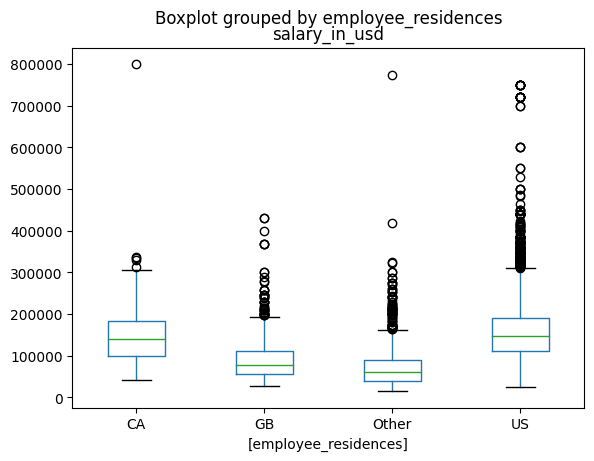

In [865]:
df_hypo.boxplot(by='employee_residences', grid = False)
plt.show()

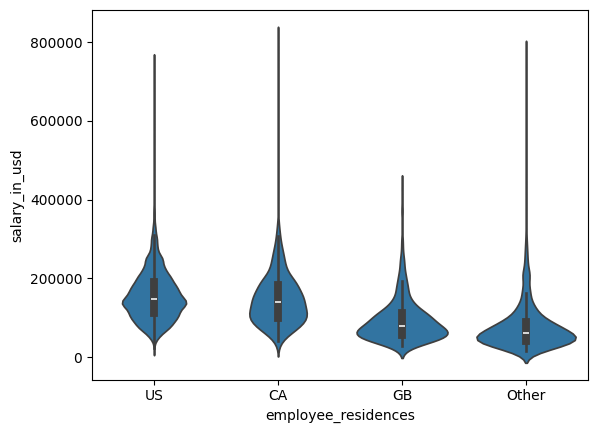

In [867]:
order = ['US', 'CA', 'GB', 'Other']
sns.violinplot(data=df_hypo, x="employee_residences", y="salary_in_usd", order = order)
plt.show()

### Sampling

In [868]:
X = np.array(df_hypo.salary_in_usd).reshape(-1, 1)
y = df_hypo.employee_residences

In [869]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [870]:
X_resampled = np.reshape(X_resampled, -1)

In [871]:
X_resampled.size

1812

In [872]:
y_resampled.size

1812

In [873]:
df_hypo = pd.DataFrame({'employee_residences': y_resampled, 'salary_in_usd': X_resampled})

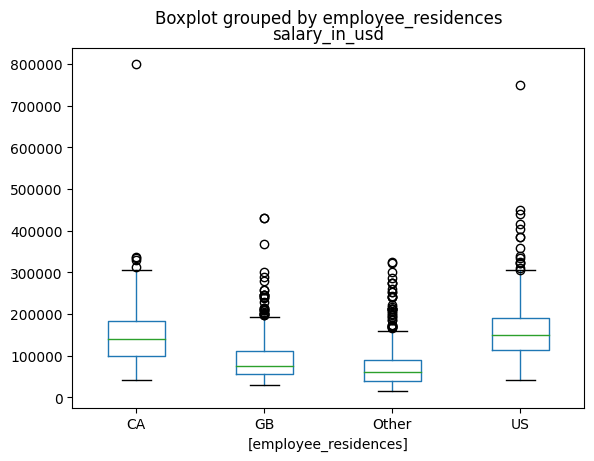

In [875]:
df_hypo.boxplot(by='employee_residences', grid = False)
plt.show()

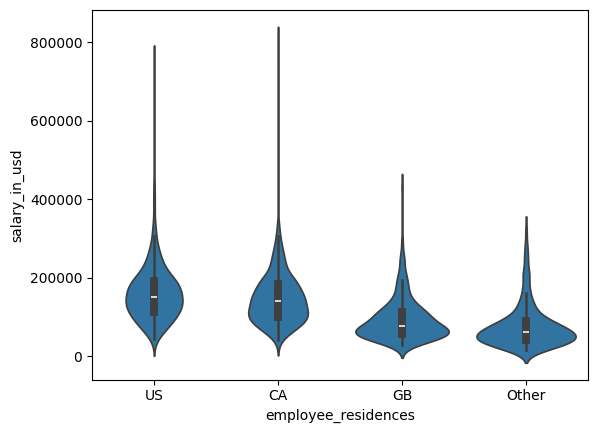

In [876]:
order = ['US', 'CA', 'GB', 'Other']
sns.violinplot(data=df_hypo, x="employee_residences", y="salary_in_usd", order = order)
plt.show()

In [877]:
salary_US = np.array(df_hypo[df_hypo.employee_residences == 'US'][['salary_in_usd']])
salary_GB = np.array(df_hypo[df_hypo.employee_residences == 'GB'][['salary_in_usd']])
salary_CA = np.array(df_hypo[df_hypo.employee_residences == 'CA'][['salary_in_usd']])
salary_Other = np.array(df_hypo[df_hypo.employee_residences == 'Other'][['salary_in_usd']])

### Hypothesis testing

In [878]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Salaries in United States are no higher than salaries in Canada."
alternate_hypothesis = "Salaries in United States are higher than salaries in Canada."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_US, salary_CA)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary in United States is lower than salary in Canada."
	else:
		conclusion = "There is statistically significant evidence that the average salary in United States is higher than salary in Canada."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary in United States and Canada."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [3.11754536]
P-value: [0.00194]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary in United States is higher than salary in Canada.


In [879]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Salaries in Canada are no higher than salaries in Great Britain."
alternate_hypothesis = "Salaries in Canada are higher than salaries in Great Britain."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_CA, salary_GB)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary in Canada is lower than salary in Great Britain."
	else:
		conclusion = "There is statistically significant evidence that the average salary in Canada is higher than salary in Great Britain."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary in Canada and Great Britain."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [12.87842586]
P-value: [1.50746164e-32]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary in Canada is higher than salary in Great Britain.


In [880]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Salaries in Great Britain are no higher than salaries in other countries."
alternate_hypothesis = "Salaries in Great Britain are higher than salaries in other countries."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_GB, salary_Other)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary in Great Britain is lower than salary in other countries."
	else:
		conclusion = "There is statistically significant evidence that the average salary in Great Britain is higher than salary in other countries."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary in Great Britain and other countries."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [5.03215692]
P-value: [7.01288873e-07]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary in Great Britain is higher than salary in other countries.


### Exclude category outliers

In [881]:
df_hypo = df[['employee_residences', 'salary_in_usd']]

In [882]:
df_hypo = df_hypo[((df_hypo.employee_residences == 'US') & (df_hypo.salary_in_usd <= employee_residences.high.loc['US']) & (df_hypo.salary_in_usd >= employee_residences.low.loc['US'])) |
                  ((df_hypo.employee_residences == 'GB') & (df_hypo.salary_in_usd <= employee_residences.high.loc['GB']) & (df_hypo.salary_in_usd >= employee_residences.low.loc['GB'])) |
                  ((df_hypo.employee_residences == 'CA') & (df_hypo.salary_in_usd <= employee_residences.high.loc['CA']) & (df_hypo.salary_in_usd >= employee_residences.low.loc['CA'])) |
                  ((df_hypo.employee_residences == 'Other') & (df_hypo.salary_in_usd <= employee_residences.high.loc['Other']) & (df_hypo.salary_in_usd >= employee_residences.low.loc['Other']))]

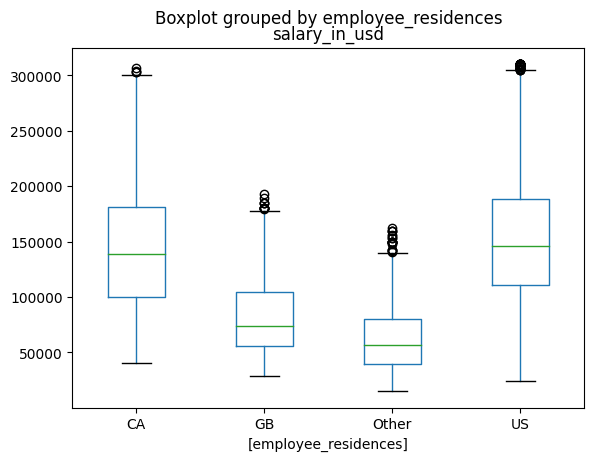

In [883]:
df_hypo.boxplot(by='employee_residences', grid = False)
plt.show()

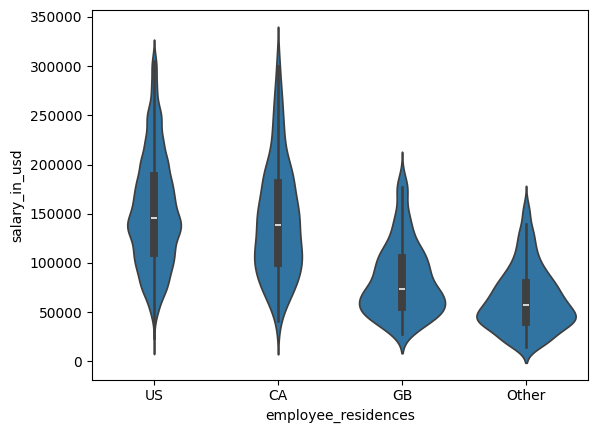

In [884]:
order = ['US', 'CA', 'GB', 'Other']
sns.violinplot(data=df_hypo, x="employee_residences", y="salary_in_usd", order = order)
plt.show()

### Sampling

In [885]:
X = np.array(df_hypo.salary_in_usd).reshape(-1, 1)
y = df_hypo.employee_residences

In [886]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [887]:
X_resampled = np.reshape(X_resampled, -1)

In [888]:
X_resampled.size

1792

In [889]:
y_resampled.size

1792

In [890]:
df_hypo = pd.DataFrame({'employee_residences': y_resampled, 'salary_in_usd': X_resampled})

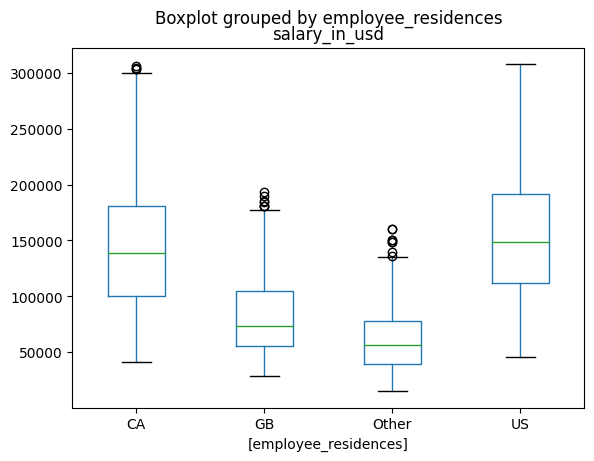

In [891]:
df_hypo.boxplot(by='employee_residences', grid = False)
plt.show()

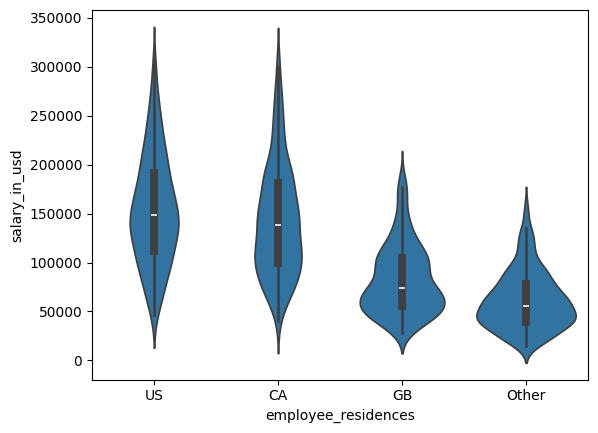

In [892]:
order = ['US', 'CA', 'GB', 'Other']
sns.violinplot(data=df_hypo, x="employee_residences", y="salary_in_usd", order = order)
plt.show()

In [893]:
salary_US = np.array(df_hypo[df_hypo.employee_residences == 'US'][['salary_in_usd']])
salary_GB = np.array(df_hypo[df_hypo.employee_residences == 'GB'][['salary_in_usd']])
salary_CA = np.array(df_hypo[df_hypo.employee_residences == 'CA'][['salary_in_usd']])
salary_Other = np.array(df_hypo[df_hypo.employee_residences == 'Other'][['salary_in_usd']])

### Hypothesis testing

In [894]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Salaries in United States are no higher than salaries in Canada."
alternate_hypothesis = "Salaries in United States are higher than salaries in Canada."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_US, salary_CA)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary in United States is lower than salary in Canada."
	else:
		conclusion = "There is statistically significant evidence that the average salary in United States is higher than salary in Canada."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary in United States and Canada."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [2.86628968]
P-value: [0.00434921]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary in United States is higher than salary in Canada.


In [895]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Salaries in Canada are no higher than salaries in Great Britain."
alternate_hypothesis = "Salaries in Canada are higher than salaries in Great Britain."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_CA, salary_GB)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary in Canada is lower than salary in Great Britain."
	else:
		conclusion = "There is statistically significant evidence that the average salary in Canada is higher than salary in Great Britain."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary in Canada and Great Britain."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [19.45008499]
P-value: [1.67917144e-61]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary in Canada is higher than salary in Great Britain.


In [896]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Salaries in Great Britain are no higher than salaries in other countries."
alternate_hypothesis = "Salaries in Great Britain are higher than salaries in other countries."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_GB, salary_Other)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary in Great Britain is lower than salary in other countries."
	else:
		conclusion = "There is statistically significant evidence that the average salary in Great Britain is higher than salary in other countries."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary in Great Britain and other countries."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [9.48953378]
P-value: [1.39587205e-19]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary in Great Britain is higher than salary in other countries.


## Remote ratio

### Original

In [897]:
df_hypo = df[['remote_ratio', 'salary_in_usd']]

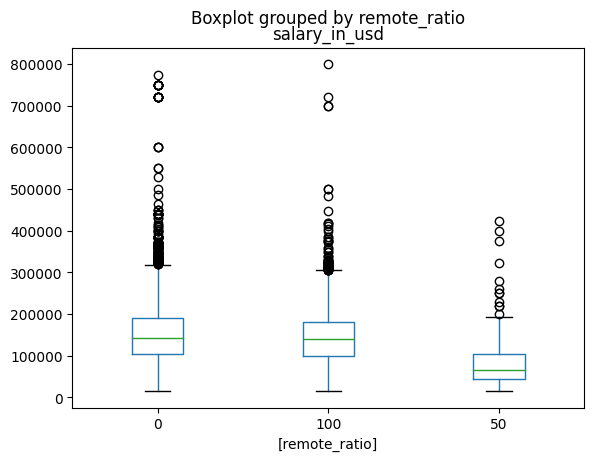

In [898]:
df_hypo.boxplot(by='remote_ratio', grid = False)
plt.show()

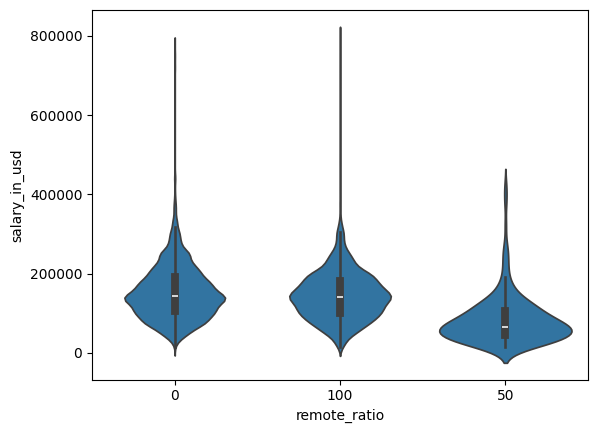

In [900]:
sns.violinplot(data=df_hypo, x="remote_ratio", y="salary_in_usd")
plt.show()

### Sampling

In [901]:
X = np.array(df_hypo.salary_in_usd).reshape(-1, 1)
y = df_hypo.remote_ratio

In [902]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [903]:
X_resampled = np.reshape(X_resampled, -1)

In [904]:
X_resampled.size

747

In [905]:
y_resampled.size

747

In [906]:
df_hypo = pd.DataFrame({'remote_ratio': y_resampled, 'salary_in_usd': X_resampled})

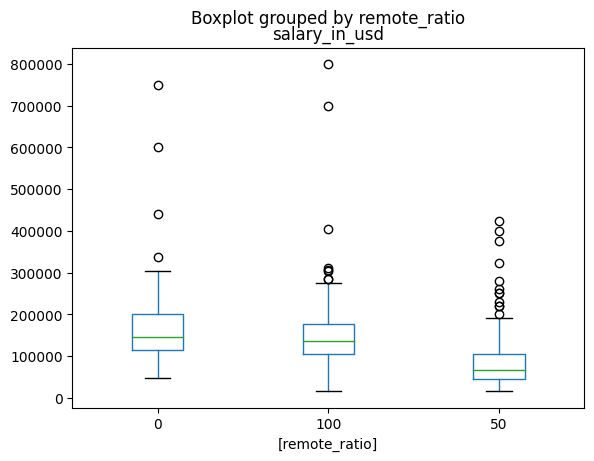

In [907]:
df_hypo.boxplot(by='remote_ratio', grid = False)
plt.show()

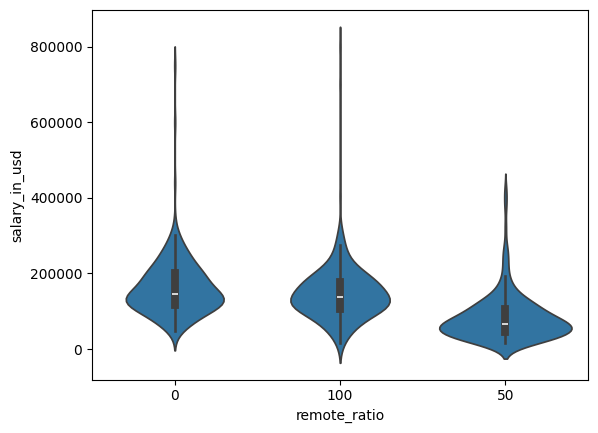

In [908]:
sns.violinplot(data=df_hypo, x="remote_ratio", y="salary_in_usd")
plt.show()

In [909]:
salary_0 = np.array(df_hypo[df_hypo.remote_ratio == '0'][['salary_in_usd']])
salary_100 = np.array(df_hypo[df_hypo.remote_ratio == '100'][['salary_in_usd']])
salary_50 = np.array(df_hypo[df_hypo.remote_ratio == '50'][['salary_in_usd']])

### Hypothesis testing

In [910]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "On-site data engineers have salary no higher than remote data engineers."
alternate_hypothesis = "On-site data engineers have salary higher than remote data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_0, salary_100)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for on-site is lower than remote data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for on-site is higher than remote data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for on-site and remote data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [1.99472851]
P-value: [0.04716704]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for on-site is higher than remote data engineers.


In [911]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Remote data engineers have salary no higher than hybrid data engineers."
alternate_hypothesis = "Remote data engineers have salary higher than hybrid data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_100, salary_50)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for remote is lower than hybrid data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for remote is higher than hybrid data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for remote and hybrid data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [10.29698796]
P-value: [6.21530371e-21]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for remote is higher than hybrid data engineers.


### Exclude category outliers

In [912]:
df_hypo = df[['remote_ratio', 'salary_in_usd']]

In [914]:
df_hypo = df_hypo[((df_hypo.remote_ratio == '0') & (df_hypo.salary_in_usd <= remote_ratio.high.loc[0]) & (df_hypo.salary_in_usd >= remote_ratio.low.loc[0])) |
                  ((df_hypo.remote_ratio == '100') & (df_hypo.salary_in_usd <= remote_ratio.high.loc[100]) & (df_hypo.salary_in_usd >= remote_ratio.low.loc[100])) |
                  ((df_hypo.remote_ratio == '50') & (df_hypo.salary_in_usd <= remote_ratio.high.loc[50]) & (df_hypo.salary_in_usd >= remote_ratio.low.loc[50]))]

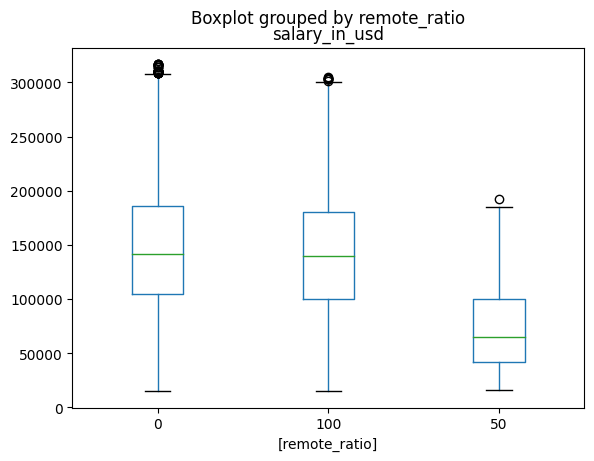

In [915]:
df_hypo.boxplot(by='remote_ratio', grid = False)
plt.show()

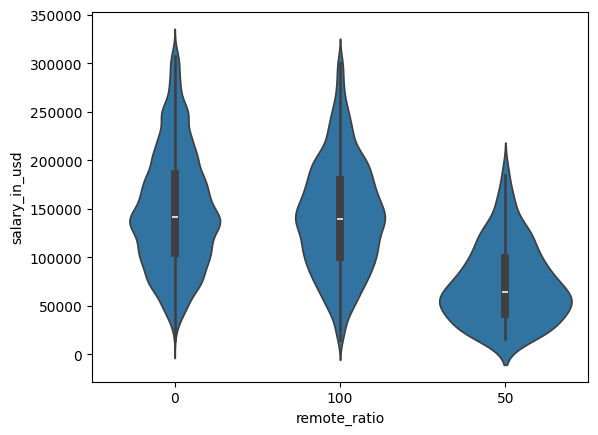

In [917]:
sns.violinplot(data=df_hypo, x="remote_ratio", y="salary_in_usd")
plt.show()

### Sampling

In [918]:
X = np.array(df_hypo.salary_in_usd).reshape(-1, 1)
y = df_hypo.remote_ratio

In [919]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [920]:
X_resampled = np.reshape(X_resampled, -1)

In [921]:
X_resampled.size

711

In [922]:
y_resampled.size

711

In [923]:
df_hypo = pd.DataFrame({'remote_ratio': y_resampled, 'salary_in_usd': X_resampled})

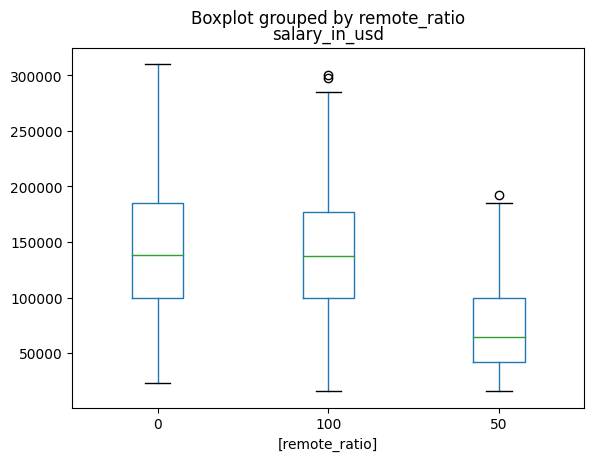

In [924]:
df_hypo.boxplot(by='remote_ratio', grid = False)
plt.show()

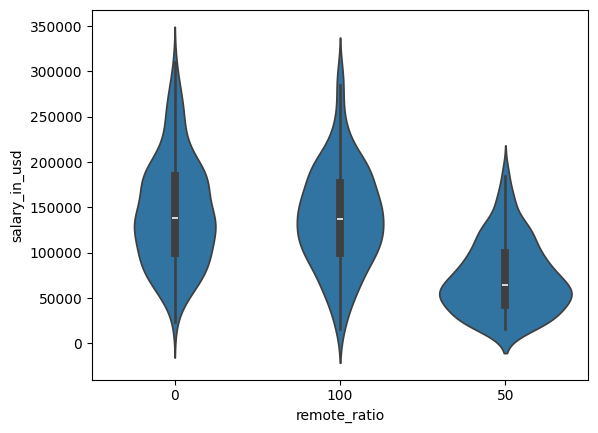

In [925]:
sns.violinplot(data=df_hypo, x="remote_ratio", y="salary_in_usd")
plt.show()

In [926]:
salary_0 = np.array(df_hypo[df_hypo.remote_ratio == '0'][['salary_in_usd']])
salary_100 = np.array(df_hypo[df_hypo.remote_ratio == '100'][['salary_in_usd']])
salary_50 = np.array(df_hypo[df_hypo.remote_ratio == '50'][['salary_in_usd']])

### Hypothesis testing

In [927]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "On-site data engineers have salary no higher than remote data engineers."
alternate_hypothesis = "On-site data engineers have salary higher than remote data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_0, salary_100)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for on-site is lower than remote data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for on-site is higher than remote data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for on-site and remote data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [0.99971537]
P-value: [0.31847219]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for on-site and remote data engineers.


In [928]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Remote data engineers have salary no higher than hybrid data engineers."
alternate_hypothesis = "Remote data engineers have salary higher than hybrid data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_100, salary_50)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for remote is lower than hybrid data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for remote is higher than hybrid data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for remote and hybrid data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [15.45820684]
P-value: [1.04932059e-37]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for remote is higher than hybrid data engineers.


## Company location

### Original

In [929]:
df_hypo = df[['company_locations', 'salary_in_usd']]

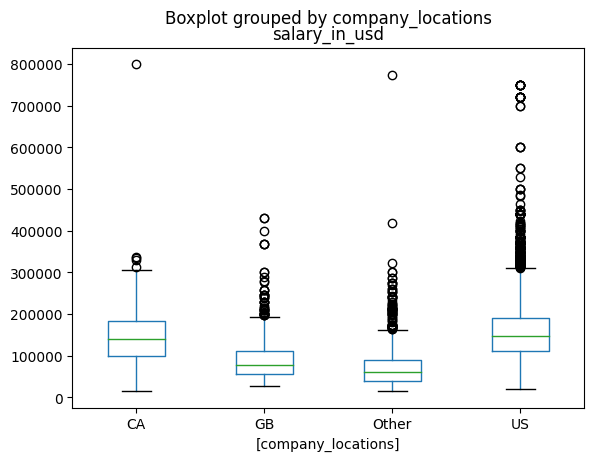

In [930]:
df_hypo.boxplot(by='company_locations', grid = False)
plt.show()

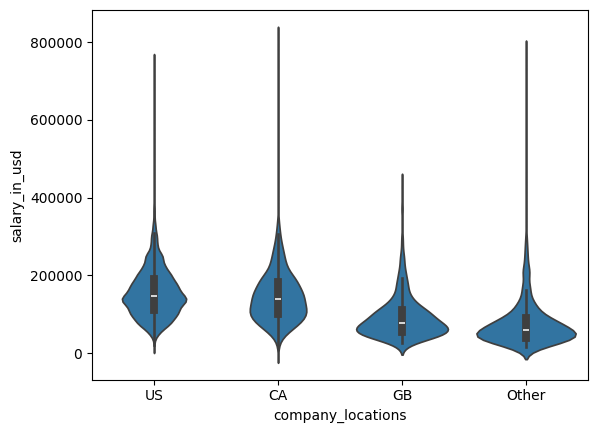

In [931]:
order = ['US', 'CA', 'GB', 'Other']
sns.violinplot(data=df_hypo, x="company_locations", y="salary_in_usd", order = order)
plt.show()

### Sampling

In [932]:
X = np.array(df_hypo.salary_in_usd).reshape(-1, 1)
y = df_hypo.company_locations

In [933]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [934]:
X_resampled = np.reshape(X_resampled, -1)

In [935]:
X_resampled.size

1820

In [936]:
y_resampled.size

1820

In [937]:
df_hypo = pd.DataFrame({'company_locations': y_resampled, 'salary_in_usd': X_resampled})

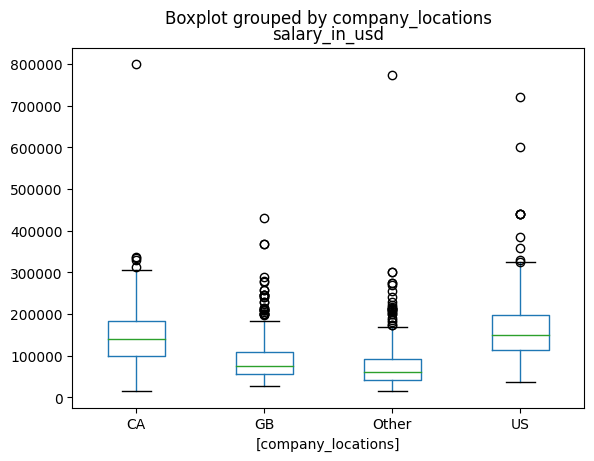

In [938]:
df_hypo.boxplot(by='company_locations', grid = False)
plt.show()

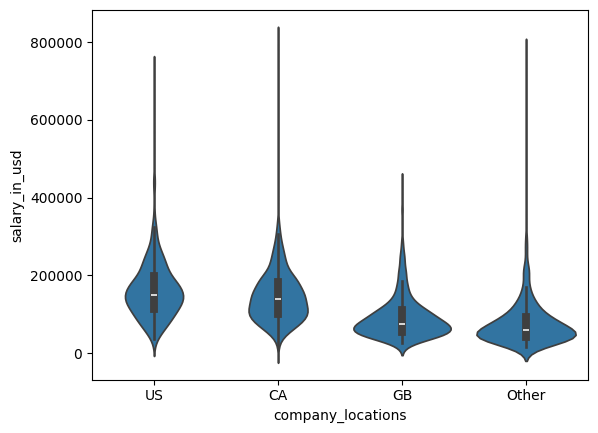

In [939]:
order = ['US', 'CA', 'GB', 'Other']
sns.violinplot(data=df_hypo, x="company_locations", y="salary_in_usd", order = order)
plt.show()

In [940]:
salary_US = np.array(df_hypo[df_hypo.company_locations == 'US'][['salary_in_usd']])
salary_GB = np.array(df_hypo[df_hypo.company_locations == 'GB'][['salary_in_usd']])
salary_CA = np.array(df_hypo[df_hypo.company_locations == 'CA'][['salary_in_usd']])
salary_Other = np.array(df_hypo[df_hypo.company_locations == 'Other'][['salary_in_usd']])

### Hypothesis testing

In [941]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Salaries in United States are no higher than salaries in Canada."
alternate_hypothesis = "Salaries in United States are higher than salaries in Canada."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_US, salary_CA)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary in United States is lower than salary in Canada."
	else:
		conclusion = "There is statistically significant evidence that the average salary in United States is higher than salary in Canada."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary in United States and Canada."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [3.68139232]
P-value: [0.00025985]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary in United States is higher than salary in Canada.


In [942]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Salaries in Canada are no higher than salaries in Great Britain."
alternate_hypothesis = "Salaries in Canada are higher than salaries in Great Britain."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_CA, salary_GB)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary in Canada is lower than salary in Great Britain."
	else:
		conclusion = "There is statistically significant evidence that the average salary in Canada is higher than salary in Great Britain."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary in Canada and Great Britain."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [13.48763929]
P-value: [4.19239757e-35]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary in Canada is higher than salary in Great Britain.


In [943]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Salaries in Great Britain are no higher than salaries in other countries."
alternate_hypothesis = "Salaries in Great Britain are higher than salaries in other countries."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_GB, salary_Other)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary in Great Britain is lower than salary in other countries."
	else:
		conclusion = "There is statistically significant evidence that the average salary in Great Britain is higher than salary in other countries."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary in Great Britain and other countries."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [4.18040474]
P-value: [3.49247441e-05]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary in Great Britain is higher than salary in other countries.


### Exclude category outliers

In [946]:
df_hypo = df[['company_locations', 'salary_in_usd']]

In [947]:
df_hypo = df_hypo[((df_hypo.company_locations == 'US') & (df_hypo.salary_in_usd <= company_locations.high.loc['US']) & (df_hypo.salary_in_usd >= company_locations.low.loc['US'])) |
                  ((df_hypo.company_locations == 'GB') & (df_hypo.salary_in_usd <= company_locations.high.loc['GB']) & (df_hypo.salary_in_usd >= company_locations.low.loc['GB'])) |
                  ((df_hypo.company_locations == 'CA') & (df_hypo.salary_in_usd <= company_locations.high.loc['CA']) & (df_hypo.salary_in_usd >= company_locations.low.loc['CA'])) |
                  ((df_hypo.company_locations == 'Other') & (df_hypo.salary_in_usd <= company_locations.high.loc['Other']) & (df_hypo.salary_in_usd >= company_locations.low.loc['Other']))]

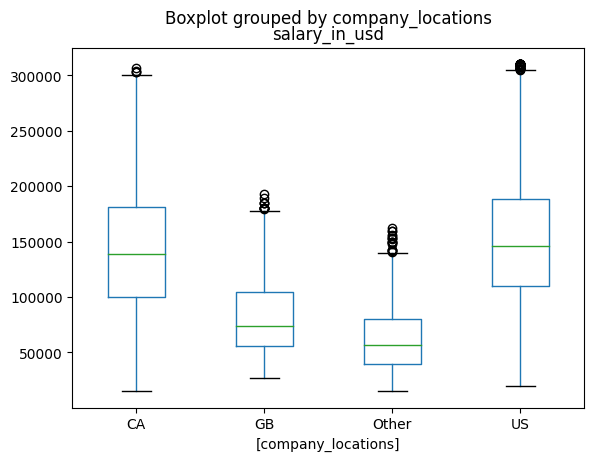

In [948]:
df_hypo.boxplot(by='company_locations', grid = False)
plt.show()

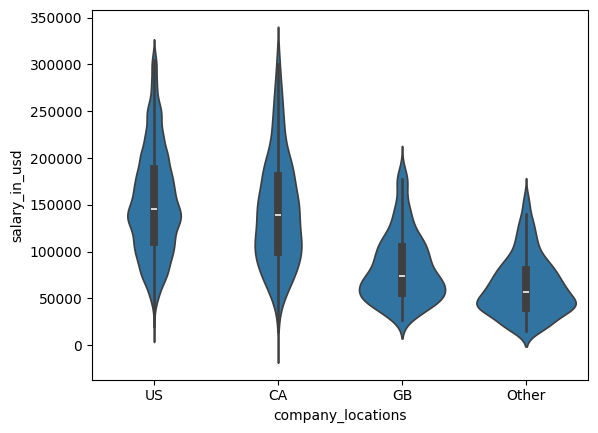

In [949]:
order = ['US', 'CA', 'GB', 'Other']
sns.violinplot(data=df_hypo, x="company_locations", y="salary_in_usd", order = order)
plt.show()

### Sampling

In [950]:
X = np.array(df_hypo.salary_in_usd).reshape(-1, 1)
y = df_hypo.company_locations

In [951]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [952]:
X_resampled = np.reshape(X_resampled, -1)

In [953]:
X_resampled.size

1800

In [954]:
y_resampled.size

1800

In [955]:
df_hypo = pd.DataFrame({'company_locations': y_resampled, 'salary_in_usd': X_resampled})

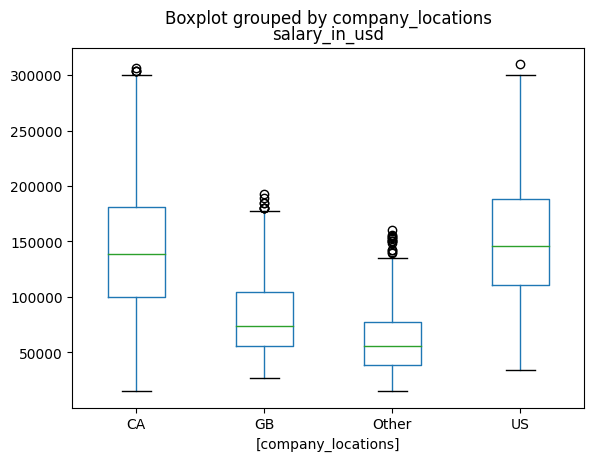

In [956]:
df_hypo.boxplot(by='company_locations', grid = False)
plt.show()

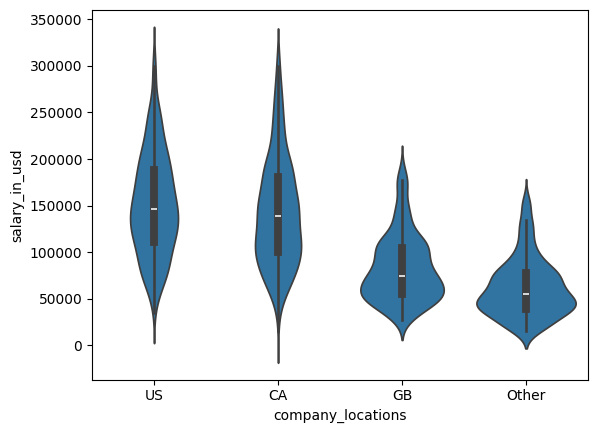

In [957]:
order = ['US', 'CA', 'GB', 'Other']
sns.violinplot(data=df_hypo, x="company_locations", y="salary_in_usd", order = order)
plt.show()

In [959]:
salary_US = np.array(df_hypo[df_hypo.company_locations == 'US'][['salary_in_usd']])
salary_GB = np.array(df_hypo[df_hypo.company_locations == 'GB'][['salary_in_usd']])
salary_CA = np.array(df_hypo[df_hypo.company_locations == 'CA'][['salary_in_usd']])
salary_Other = np.array(df_hypo[df_hypo.company_locations == 'Other'][['salary_in_usd']])

### Hypothesis testing

In [960]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Salaries in United States are no higher than salaries in Canada."
alternate_hypothesis = "Salaries in United States are higher than salaries in Canada."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_US, salary_CA)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary in United States is lower than salary in Canada."
	else:
		conclusion = "There is statistically significant evidence that the average salary in United States is higher than salary in Canada."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary in United States and Canada."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [2.21143117]
P-value: [0.027509]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary in United States is higher than salary in Canada.


In [961]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Salaries in Canada are no higher than salaries in Great Britain."
alternate_hypothesis = "Salaries in Canada are higher than salaries in Great Britain."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_CA, salary_GB)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary in Canada is lower than salary in Great Britain."
	else:
		conclusion = "There is statistically significant evidence that the average salary in Canada is higher than salary in Great Britain."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary in Canada and Great Britain."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [19.46430381]
P-value: [1.2366977e-61]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary in Canada is higher than salary in Great Britain.


In [962]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Salaries in Great Britain are no higher than salaries in other countries."
alternate_hypothesis = "Salaries in Great Britain are higher than salaries in other countries."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_GB, salary_Other)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary in Great Britain is lower than salary in other countries."
	else:
		conclusion = "There is statistically significant evidence that the average salary in Great Britain is higher than salary in other countries."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary in Great Britain and other countries."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [9.70793199]
P-value: [2.36822401e-20]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary in Great Britain is higher than salary in other countries.


## Company size

### Original

In [963]:
df_hypo = df[['company_size', 'salary_in_usd']]

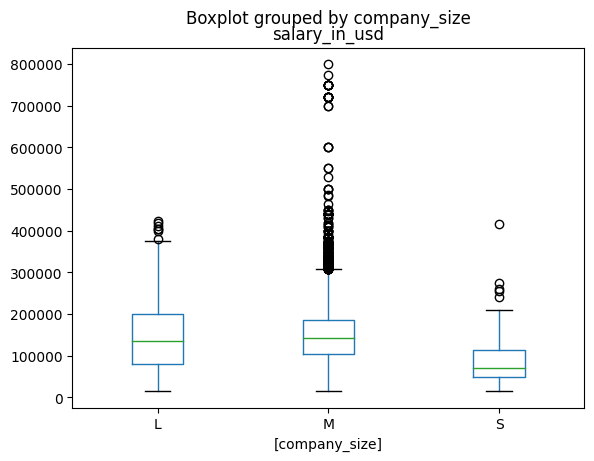

In [964]:
df_hypo.boxplot(by='company_size', grid = False)
plt.show()

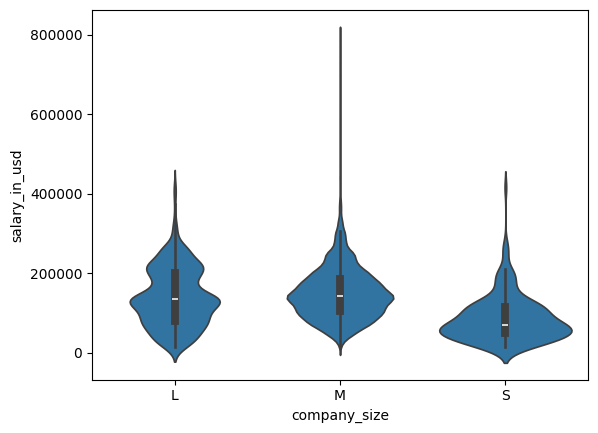

In [966]:
order = ['L','M','S']
sns.violinplot(data=df_hypo, x="company_size", y="salary_in_usd", order=order)
plt.show()

### Sampling

In [967]:
X = np.array(df_hypo.salary_in_usd).reshape(-1, 1)
y = df_hypo.company_size

In [968]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [969]:
X_resampled = np.reshape(X_resampled, -1)

In [970]:
X_resampled.size

564

In [971]:
y_resampled.size

564

In [972]:
df_hypo = pd.DataFrame({'company_size': y_resampled, 'salary_in_usd': X_resampled})

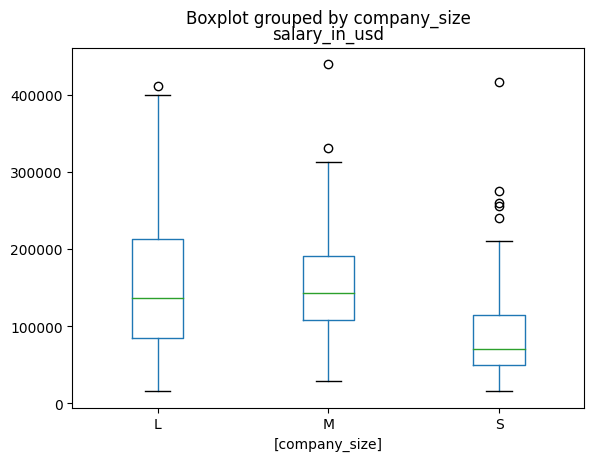

In [973]:
df_hypo.boxplot(by='company_size', grid = False)
plt.show()

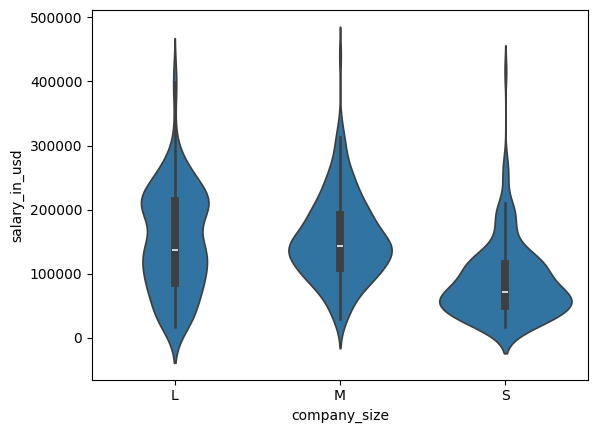

In [974]:
order = ['L','M','S']
sns.violinplot(data=df_hypo, x="company_size", y="salary_in_usd", order=order)
plt.show()

In [975]:
salary_L = np.array(df_hypo[df_hypo.company_size == 'L'][['salary_in_usd']])
salary_M = np.array(df_hypo[df_hypo.company_size == 'M'][['salary_in_usd']])
salary_S = np.array(df_hypo[df_hypo.company_size == 'S'][['salary_in_usd']])

### Hypothesis testing

In [976]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Middle-sized company data engineers have salary no higher than small-sized company data engineers."
alternate_hypothesis = "Middle-sized company data engineers have salary higher than small-sized company data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_M, salary_S)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for middle-sized company is lower than small-sized company data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for middle-sized company is higher than small-sized company data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for middle and small-sized company data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [10.18227498]
P-value: [1.1838623e-19]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for middle-sized company is higher than small-sized company data engineers.


In [977]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Large-sized company data engineers have salary no higher than middle-sized company data engineers."
alternate_hypothesis = "Large-sized company data engineers have salary higher than middle-sized company data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_L, salary_M)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for large-sized company is lower than middle-sized company data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for large-sized company is higher than middle-sized company data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for large and middle-sized company data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-0.32496698]
P-value: [0.74556933]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for large and middle-sized company data engineers.


### Exclude category outliers

In [978]:
df_hypo = df[['company_size', 'salary_in_usd']]

In [979]:
df_hypo = df_hypo[((df_hypo.company_size == 'L') & (df_hypo.salary_in_usd <= company_size.high.loc['L']) & (df_hypo.salary_in_usd >= company_size.low.loc['L'])) |
                  ((df_hypo.company_size == 'M') & (df_hypo.salary_in_usd <= company_size.high.loc['M']) & (df_hypo.salary_in_usd >= company_size.low.loc['M'])) |
                  ((df_hypo.company_size == 'S') & (df_hypo.salary_in_usd <= company_size.high.loc['S']) & (df_hypo.salary_in_usd >= company_size.low.loc['S']))]

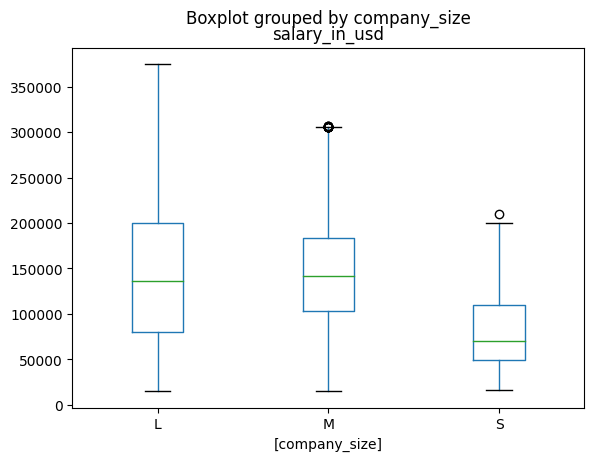

In [980]:
df_hypo.boxplot(by='company_size', grid = False)
plt.show()

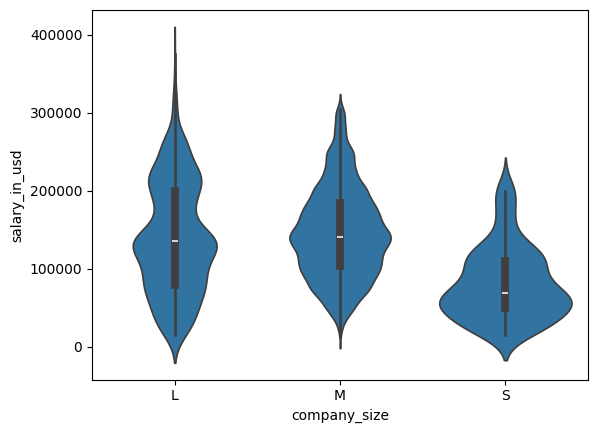

In [981]:
order = ['L','M','S']
sns.violinplot(data=df_hypo, x="company_size", y="salary_in_usd", order=order)
plt.show()

### Sampling

In [982]:
X = np.array(df_hypo.salary_in_usd).reshape(-1, 1)
y = df_hypo.company_size

In [983]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [984]:
X_resampled = np.reshape(X_resampled, -1)

In [985]:
X_resampled.size

549

In [986]:
y_resampled.size

549

In [987]:
df_hypo = pd.DataFrame({'company_size': y_resampled, 'salary_in_usd': X_resampled})

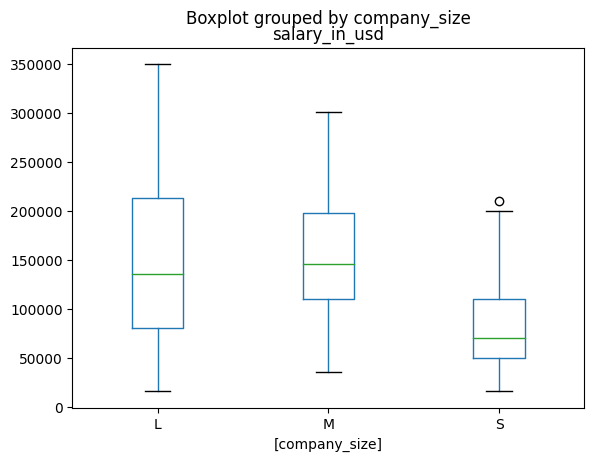

In [988]:
df_hypo.boxplot(by='company_size', grid = False)
plt.show()

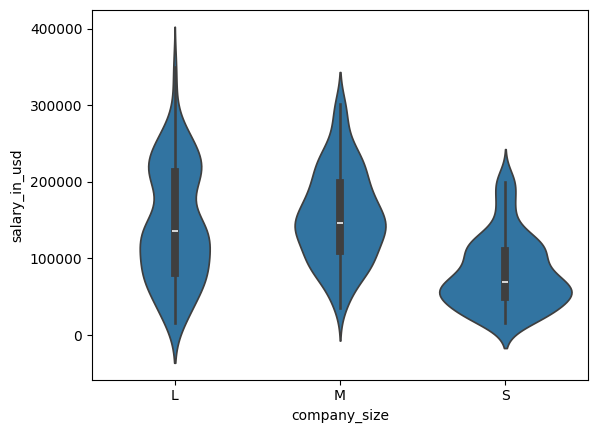

In [989]:
order = ['L','M','S']
sns.violinplot(data=df_hypo, x="company_size", y="salary_in_usd", order=order)
plt.show()

In [990]:
salary_L = np.array(df_hypo[df_hypo.company_size == 'L'][['salary_in_usd']])
salary_M = np.array(df_hypo[df_hypo.company_size == 'M'][['salary_in_usd']])
salary_S = np.array(df_hypo[df_hypo.company_size == 'S'][['salary_in_usd']])

### Hypothesis testing

In [991]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Middle-sized company data engineers have salary no higher than small-sized company data engineers."
alternate_hypothesis = "Middle-sized company data engineers have salary higher than small-sized company data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_M, salary_S)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for middle-sized company is lower than small-sized company data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for middle-sized company is higher than small-sized company data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for middle and small-sized company data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [13.5737016]
P-value: [1.91172279e-29]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for middle-sized company is higher than small-sized company data engineers.


In [992]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Large-sized company data engineers have salary no higher than middle-sized company data engineers."
alternate_hypothesis = "Large-sized company data engineers have salary higher than middle-sized company data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_L, salary_M)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for large-sized company is lower than middle-sized company data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for large-sized company is higher than middle-sized company data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for large and middle-sized company data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-1.65664587]
P-value: [0.09931404]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for large and middle-sized company data engineers.


# Exclude Outliers

In [993]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            16534 non-null  object
 1   experience_level     16534 non-null  object
 2   salary_in_usd        16534 non-null  int64 
 3   remote_ratio         16534 non-null  object
 4   company_size         16534 non-null  object
 5   employment_type_FT   16534 non-null  int64 
 6   job_titles           16534 non-null  object
 7   salary_currencies    16534 non-null  object
 8   employee_residences  16534 non-null  object
 9   company_locations    16534 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.3+ MB


##Work year

##Experience level

##Employment type

## Job title

##Salary currency

##Employee residence

##Remote ratio

##Company location

##Company size

# Drop redundant columns

In [ ]:
df_mod.drop(columns=['work_year_2024', 'remote_ratio_100', 'salary_currency_USD', 'employee_residence_US', 'company_size_L'], inplace = True)

In [ ]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14181 entries, 0 to 16532
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   salary_in_usd            14181 non-null  int64
 1   work_year_2020           14181 non-null  int64
 2   work_year_2021           14181 non-null  int64
 3   work_year_2022           14181 non-null  int64
 4   work_year_2023           14181 non-null  int64
 5   experience_level_recode  14181 non-null  int64
 6   employment_type_FT       14181 non-null  int64
 7   job_title_Analyst        14181 non-null  int64
 8   job_title_Engineer       14181 non-null  int64
 9   job_title_Scientist      14181 non-null  int64
 10  remote_ratio_0           14181 non-null  int64
 11  remote_ratio_50          14181 non-null  int64
 12  company_location_US      14181 non-null  int64
 13  company_size_M           14181 non-null  int64
 14  company_size_S           14181 non-null  int64
dtypes: int6

In [ ]:
df_mod.corr()

salary_in_usd  work_year_2020  work_year_2021  \
salary_in_usd                 1.000000       -0.062293       -0.091659   
work_year_2020               -0.062293        1.000000       -0.006006   
work_year_2021               -0.091659       -0.006006        1.000000   
work_year_2022               -0.029127       -0.020009       -0.034658   
work_year_2023                0.082012       -0.060787       -0.105290   
experience_level_recode       0.421970       -0.057740       -0.067579   
employment_type_FT            0.063477       -0.077593       -0.052861   
job_title_Analyst            -0.315269        0.002631       -0.007137   
job_title_Engineer            0.157245       -0.002091       -0.013031   
job_title_Scientist           0.170445       -0.001574        0.005490   
remote_ratio_0                0.022443       -0.055586       -0.121181   
remote_ratio_50              -0.134673        0.142583        0.321945   
company_location_US           0.390122       -0.092900       -0.147802   
company_size_M                0.075929       -0.182059       -0.289004   
company_size_S               -0.109875        0.185738        0.212760   

                         work_year_2022  work_year_2023  \
salary_in_usd                 -0.029127        0.082012   
work_year_2020                -0.020009       -0.060787   
work_year_2021                -0.034658       -0.105290   
work_year_2022                 1.000000       -0.350797   
work_year_2023                -0.350797        1.000000   
experience_level_recode        0.035063        0.140452   
employment_type_FT            -0.018839        0.039982   
job_title_Analyst             -0.010867       -0.024072   
job_title_Engineer             0.021303        0.039846   
job_title_Scientist            0.000499       -0.007100   
remote_ratio_0                -0.169077        0.005753   
remote_ratio_50                0.049937       -0.051773   
company_location_US           -0.066619        0.051494   
company_size_M                -0.097935        0.033766   
company_size_S                 0.051238       -0.039720   

                         experience_level_recode  employment_type_FT  \
salary_in_usd                           0.421970            0.063477   
work_year_2020                         -0.057740           -0.077593   
work_year_2021                         -0.067579           -0.052861   
work_year_2022                          0.035063           -0.018839   
work_year_2023                          0.140452            0.039982   
experience_level_recode                 1.000000            0.079664   
employment_type_FT                      0.079664            1.000000   
job_title_Analyst                      -0.242333           -0.004938   
job_title_Engineer                      0.124348            0.015169   
job_title_Scientist                     0.065528           -0.013650   
remote_ratio_0                         -0.034465            0.026387   
remote_ratio_50                        -0.099604           -0.084359   
company_location_US                     0.160627            0.054712   
company_size_M                          0.066668            0.082230   
company_size_S                         -0.076172           -0.120625   

                         job_title_Analyst  job_title_Engineer  \
salary_in_usd                    -0.315269            0.157245   
work_year_2020                    0.002631           -0.002091   
work_year_2021                   -0.007137           -0.013031   
work_year_2022                   -0.010867            0.021303   
work_year_2023                   -0.024072            0.039846   
experience_level_recode          -0.242333            0.124348   
employment_type_FT               -0.004938            0.015169   
job_title_Analyst                 1.000000           -0.420919   
job_title_Engineer               -0.420919            1.000000   
job_title_Scientist              -0.315881           -0.511218   
remote_ratio_0  

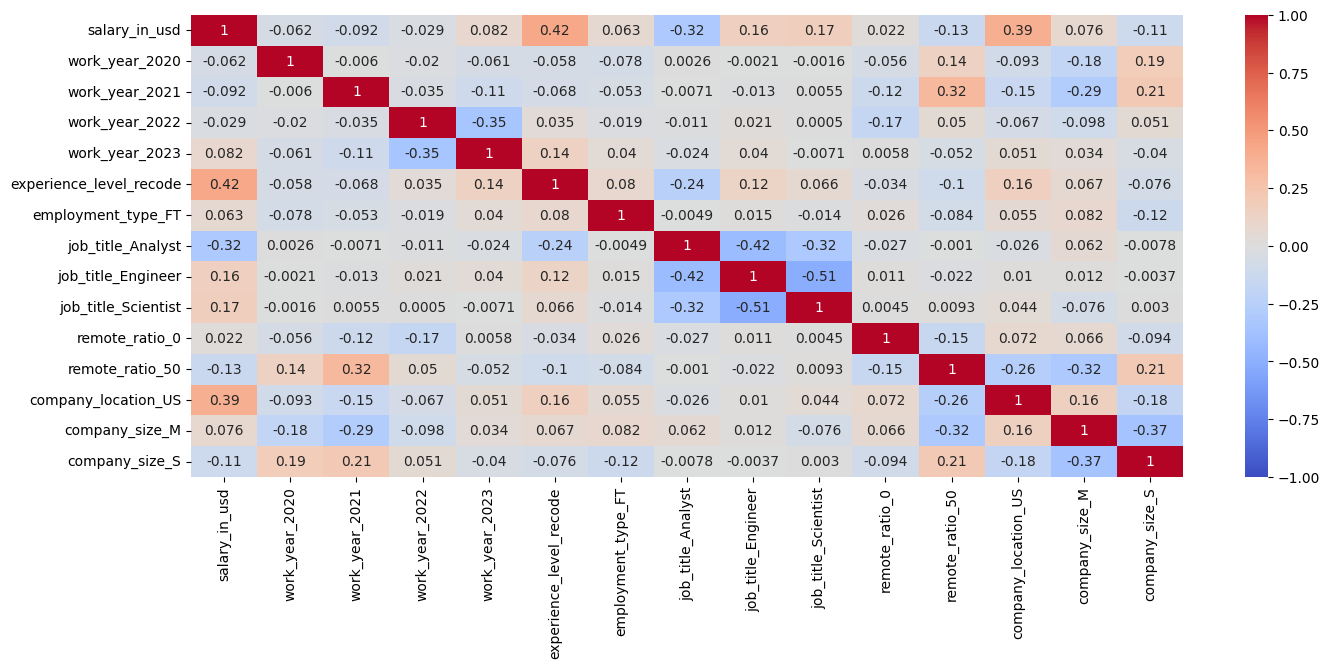

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_mod.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm')
plt.show()

#Build models

## Split train-val-test data

In [ ]:
X = df_mod.copy()

In [ ]:
X.drop(columns=['salary_in_usd'], inplace = True)

In [ ]:
X_ = np.array(X)

In [ ]:
X_.shape

(14181, 14)

In [ ]:
y = df_mod.salary_in_usd.copy()

In [ ]:
y = np.array(y)

In [ ]:
y.shape

(14181,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_t, X_test, y_t, y_test = train_test_split(X_, y, test_size=0.1, random_state=42)

In [ ]:
X_t.shape

(12762, 14)

In [ ]:
y_t.shape

(12762,)

In [ ]:
X_test.shape

(1419, 14)

In [ ]:
y_test.shape

(1419,)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.1111, random_state=42)

In [ ]:
X_train.shape

(11344, 14)

In [ ]:
y_train.shape

(11344,)

In [ ]:
X_val.shape

(1418, 14)

In [ ]:
y_val.shape

(1418,)

## Linear Regression

### Train

In [ ]:
from sklearn import linear_model

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_train, y_train)

0.35765043082575343

In [ ]:
model.score(X_val, y_val)

0.3245905046689096

In [ ]:
model.intercept_

25011.34997723352

In [ ]:
model.coef_

array([-6.00536554e+03, -6.68859743e+03, -3.24636366e+03,  7.26770537e+02,
        2.24137818e+04,  1.70571159e+04, -1.26932705e+04,  1.60496624e+04,
        2.01072613e+04,  1.94259783e+01, -1.63496816e+03,  5.20919193e+04,
        1.15895186e+03, -1.07007403e+04])

### Evaluation on train set

In [ ]:
y_pred = model.predict(X_train)

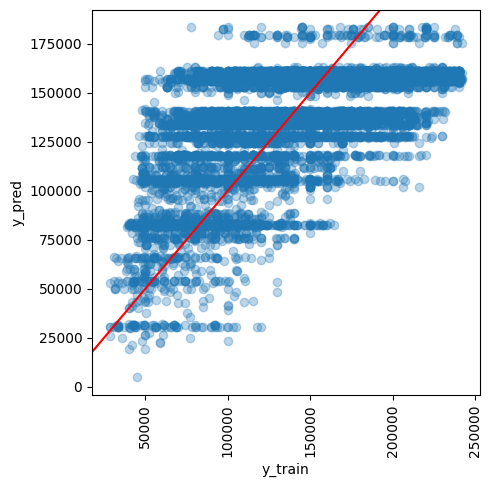

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_train, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_train')
plt.ylabel('y_pred')

plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
MAE = mean_absolute_error(y_train, y_pred)
MAE

31242.213789042515

In [ ]:
MSE = mean_squared_error(y_train, y_pred)
MSE

1462745417.9803867

In [ ]:
RMSE = MSE**(1/2)
RMSE

38245.854912400464

In [ ]:
R2 = r2_score(y_train, y_pred)
R2

0.35765043082575343

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adj_R2

0.3568566366719499

In [ ]:
train = ['train', MAE, MSE, RMSE, R2, Adj_R2]
train

['train',
 31242.213789042515,
 1462745417.9803867,
 38245.854912400464,
 0.35765043082575343,
 0.3568566366719499]

### Evaluation on validation set

In [ ]:
y_pred = model.predict(X_val)

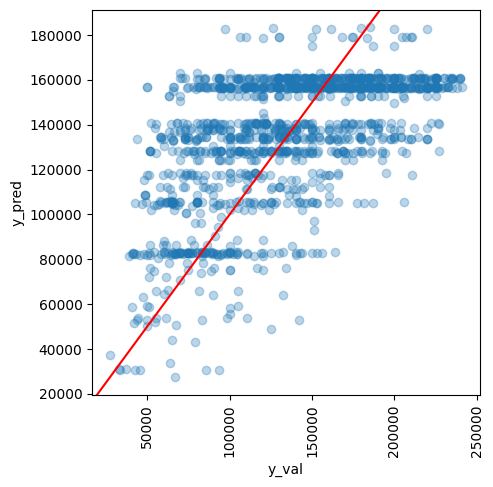

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_val, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_val')
plt.ylabel('y_pred')

plt.show()

In [ ]:
MAE = mean_absolute_error(y_true=y_val, y_pred=y_pred)
MAE

32547.334300512037

In [ ]:
MSE = mean_squared_error(y_true=y_val, y_pred=y_pred)
MSE

1573270700.5131435

In [ ]:
RMSE = MSE**(1/2)
RMSE

39664.47655665134

In [ ]:
R2 = r2_score(y_val, y_pred)
R2

0.3245905046689096

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)
Adj_R2

0.31785085182882744

In [ ]:
val = ['val', MAE, MSE, RMSE, R2, Adj_R2]
val

['val',
 32547.334300512037,
 1573270700.5131435,
 39664.47655665134,
 0.3245905046689096,
 0.31785085182882744]

### Evaluation on test set

In [ ]:
y_pred = model.predict(X_test)

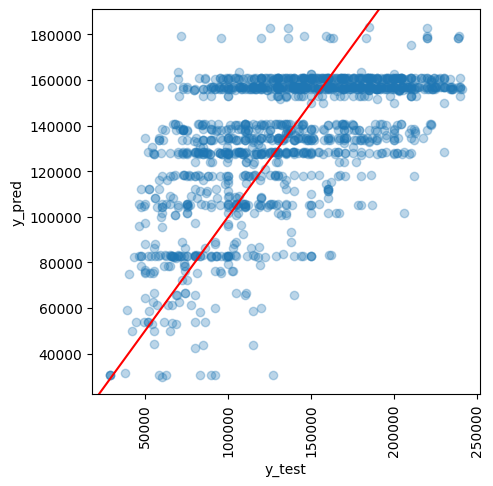

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_test, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_test')
plt.ylabel('y_pred')

plt.show()

In [ ]:
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred)
MAE

31605.058086007855

In [ ]:
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
MSE

1489459333.7746615

In [ ]:
RMSE = MSE**(1/2)
RMSE

38593.5141412992

In [ ]:
R2 = r2_score(y_test, y_pred)
R2

0.3340744769831351

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.32743419399008944

In [ ]:
test = ['test', MAE, MSE, RMSE, R2, Adj_R2]
test

['test',
 31605.058086007855,
 1489459333.7746615,
 38593.5141412992,
 0.3340744769831351,
 0.32743419399008944]

In [ ]:
result = pd.DataFrame([train, val, test], columns=['set', 'MAE', 'MSE', 'RMSE', 'R2', 'Adj_R2'])
result.set_index('set', inplace=True)
result

MAE           MSE          RMSE        R2    Adj_R2
set                                                                
train  31242.213789  1.462745e+09  38245.854912  0.357650  0.356857
val    32547.334301  1.573271e+09  39664.476557  0.324591  0.317851
test   31605.058086  1.489459e+09  38593.514141  0.334074  0.327434

## Decision Tree

### Train

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
from sklearn.tree import plot_tree
from sklearn import tree

In [ ]:
text_representation = tree.export_text(model, feature_names=list(X.columns))
print(text_representation)

|--- experience_level_recode <= 1.50
|   |--- company_location_US <= 0.50
|   |   |--- job_title_Analyst <= 0.50
|   |   |   |--- experience_level_recode <= 0.50
|   |   |   |   |--- employment_type_FT <= 0.50
|   |   |   |   |   |--- company_size_S <= 0.50
|   |   |   |   |   |   |--- work_year_2022 <= 0.50
|   |   |   |   |   |   |   |--- value: [88888.00]
|   |   |   |   |   |   |--- work_year_2022 >  0.50
|   |   |   |   |   |   |   |--- job_title_Scientist <= 0.50
|   |   |   |   |   |   |   |   |--- value: [100000.00]
|   |   |   |   |   |   |   |--- job_title_Scientist >  0.50
|   |   |   |   |   |   |   |   |--- remote_ratio_50 <= 0.50
|   |   |   |   |   |   |   |   |   |--- value: [110000.00]
|   |   |   |   |   |   |   |   |--- remote_ratio_50 >  0.50
|   |   |   |   |   |   |   |   |   |--- value: [100000.00]
|   |   |   |   |   |--- company_size_S >  0.50
|   |   |   |   |   |   |--- value: [117647.00]
|   |   |   |   |--- employment_type_FT >  0.50
|   |   |   |   |   |--

### Evaluation on train set

In [ ]:
y_pred = model.predict(X_train)

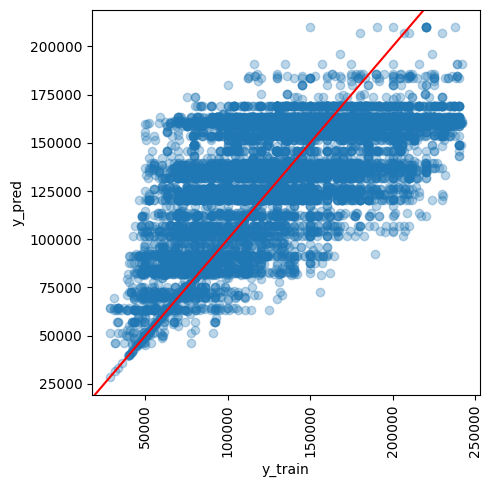

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_train, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_train')
plt.ylabel('y_pred')

plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
MAE = mean_absolute_error(y_train, y_pred)
MAE

29963.177945743537

In [ ]:
MSE = mean_squared_error(y_train, y_pred)
MSE

1380857536.084739

In [ ]:
RMSE = MSE**(1/2)
RMSE

37159.89149721429

In [ ]:
R2 = r2_score(y_train, y_pred)
R2

0.39361064988348016

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adj_R2

0.3928612941679156

In [ ]:
train = ['train', MAE, MSE, RMSE, R2, Adj_R2]
train

['train',
 29963.177945743537,
 1380857536.084739,
 37159.89149721429,
 0.39361064988348016,
 0.3928612941679156]

### Evaluation on validation set

In [ ]:
y_pred = model.predict(X_val)

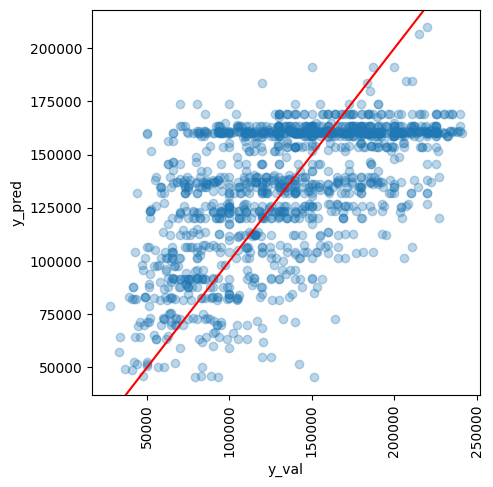

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_val, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_val')
plt.ylabel('y_pred')

plt.show()

In [ ]:
MAE = mean_absolute_error(y_true=y_val, y_pred=y_pred)
MAE

32253.804124652426

In [ ]:
MSE = mean_squared_error(y_true=y_val, y_pred=y_pred)
MSE

1558060169.3639214

In [ ]:
RMSE = MSE**(1/2)
RMSE

39472.27089190488

In [ ]:
R2 = r2_score(y_val, y_pred)
R2

0.3311204280723412

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)
Adj_R2

0.32444593483856554

In [ ]:
val = ['val', MAE, MSE, RMSE, R2, Adj_R2]
val

['val',
 32253.804124652426,
 1558060169.3639214,
 39472.27089190488,
 0.3311204280723412,
 0.32444593483856554]

### Evaluation on test set

In [ ]:
y_pred = model.predict(X_test)

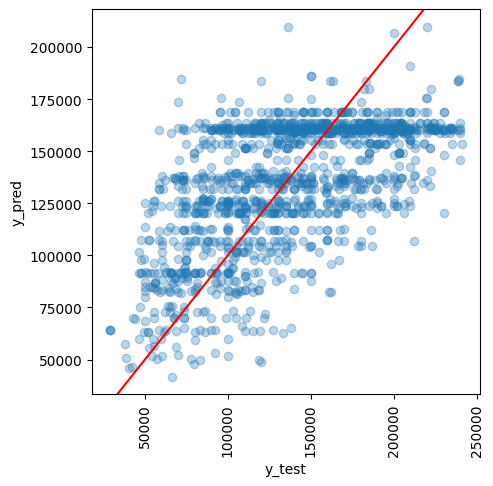

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_test, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_test')
plt.ylabel('y_pred')

plt.show()

In [ ]:
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred)
MAE

31613.28599509369

In [ ]:
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
MSE

1473861915.759895

In [ ]:
RMSE = MSE**(1/2)
RMSE

38390.90928540108

In [ ]:
R2 = r2_score(y_test, y_pred)
R2

0.3410479595842838

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.3344772127425316

In [ ]:
test = ['test', MAE, MSE, RMSE, R2, Adj_R2]
test

['test',
 31613.28599509369,
 1473861915.759895,
 38390.90928540108,
 0.3410479595842838,
 0.3344772127425316]

In [ ]:
result = pd.DataFrame([train, val, test], columns=['set', 'MAE', 'MSE', 'RMSE', 'R2', 'Adj_R2'])
result.set_index('set', inplace=True)
result

MAE           MSE          RMSE        R2    Adj_R2
set                                                                
train  29963.177946  1.380858e+09  37159.891497  0.393611  0.392861
val    32253.804125  1.558060e+09  39472.270892  0.331120  0.324446
test   31613.285995  1.473862e+09  38390.909285  0.341048  0.334477

### Prune

#### Cost complexity parameter

In [ ]:
path = model.cost_complexity_pruning_path(X_train, y_train)

In [ ]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

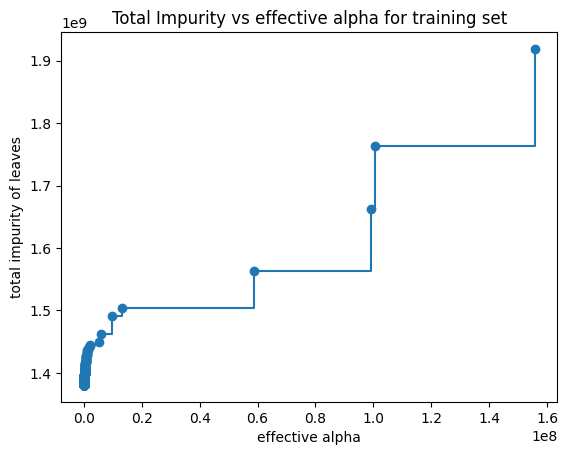

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 358446710.5168128


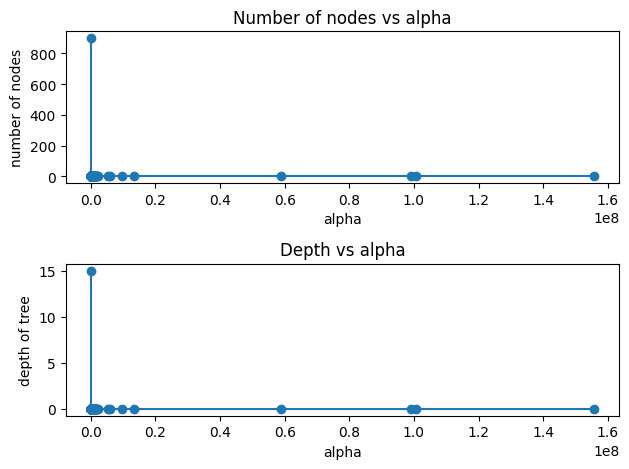

In [ ]:
clfs_ = clfs[:-1]
ccp_alphas_ = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs_]
depth = [clf.tree_.max_depth for clf in clfs_]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas_, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas_, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

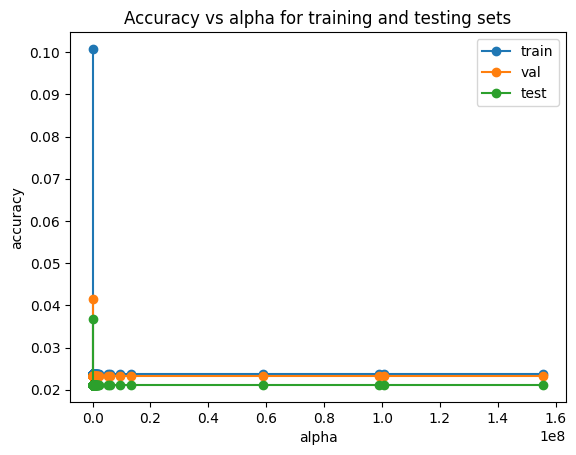

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs_]
val_scores = [clf.score(X_val, y_val) for clf in clfs_]
test_scores = [clf.score(X_test, y_test) for clf in clfs_]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas_, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas_, val_scores, marker="o", label="val", drawstyle="steps-post")
ax.plot(ccp_alphas_, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#### Train

In [ ]:
model = DecisionTreeRegressor(ccp_alpha = 500000)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=500000)

In [ ]:
text_representation = tree.export_text(model, feature_names=list(X.columns))
print(text_representation)

|--- experience_level_recode <= 1.50
|   |--- company_location_US <= 0.50
|   |   |--- job_title_Analyst <= 0.50
|   |   |   |--- experience_level_recode <= 0.50
|   |   |   |   |--- employment_type_FT <= 0.50
|   |   |   |   |   |--- value: [103307.00]
|   |   |   |   |--- employment_type_FT >  0.50
|   |   |   |   |   |--- value: [63946.52]
|   |   |   |--- experience_level_recode >  0.50
|   |   |   |   |--- value: [75092.04]
|   |   |--- job_title_Analyst >  0.50
|   |   |   |--- value: [59988.99]
|   |--- company_location_US >  0.50
|   |   |--- job_title_Analyst <= 0.50
|   |   |   |--- experience_level_recode <= 0.50
|   |   |   |   |--- remote_ratio_0 <= 0.50
|   |   |   |   |   |--- value: [93774.98]
|   |   |   |   |--- remote_ratio_0 >  0.50
|   |   |   |   |   |--- value: [106394.69]
|   |   |   |--- experience_level_recode >  0.50
|   |   |   |   |--- job_title_Scientist <= 0.50
|   |   |   |   |   |--- job_title_Engineer <= 0.50
|   |   |   |   |   |   |--- work_year_2021

#### Evaluation on train set

In [ ]:
y_pred = model.predict(X_train)

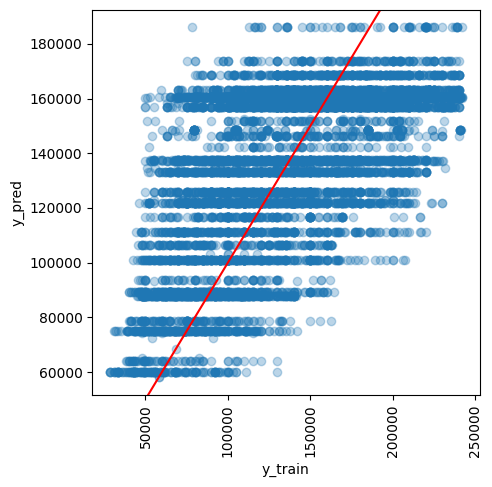

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_train, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_train')
plt.ylabel('y_pred')

plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
MAE = mean_absolute_error(y_train, y_pred)
MAE

30726.784172381685

In [ ]:
MSE = mean_squared_error(y_train, y_pred)
MSE

1415220612.1219542

In [ ]:
RMSE = MSE**(1/2)
RMSE

37619.4180194478

In [ ]:
R2 = r2_score(y_train, y_pred)
R2

0.37852045933037404

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adj_R2

0.37775245566108506

In [ ]:
train = ['train', MAE, MSE, RMSE, R2, Adj_R2]
train

['train',
 30726.784172381685,
 1415220612.1219542,
 37619.4180194478,
 0.37852045933037404,
 0.37775245566108506]

#### Evaluation on validation set

In [ ]:
y_pred = model.predict(X_val)

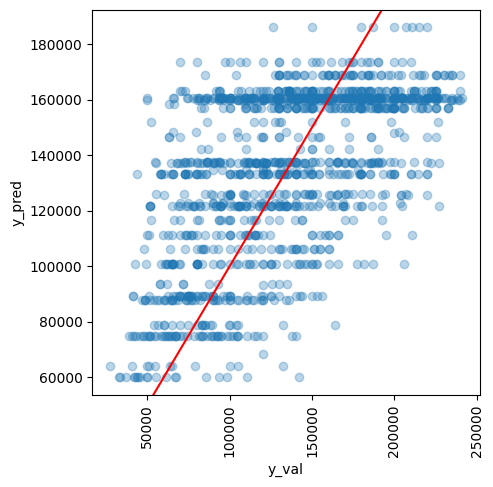

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_val, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_val')
plt.ylabel('y_pred')

plt.show()

In [ ]:
MAE = mean_absolute_error(y_true=y_val, y_pred=y_pred)
MAE

32089.481050446666

In [ ]:
MSE = mean_squared_error(y_true=y_val, y_pred=y_pred)
MSE

1535364767.8003526

In [ ]:
RMSE = MSE**(1/2)
RMSE

39183.7309071042

In [ ]:
R2 = r2_score(y_val, y_pred)
R2

0.3408636271997303

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)
Adj_R2

0.33428635762082526

In [ ]:
val = ['val', MAE, MSE, RMSE, R2, Adj_R2]
val

['val',
 32089.481050446666,
 1535364767.8003526,
 39183.7309071042,
 0.3408636271997303,
 0.33428635762082526]

#### Evaluation on test set

In [ ]:
y_pred = model.predict(X_test)

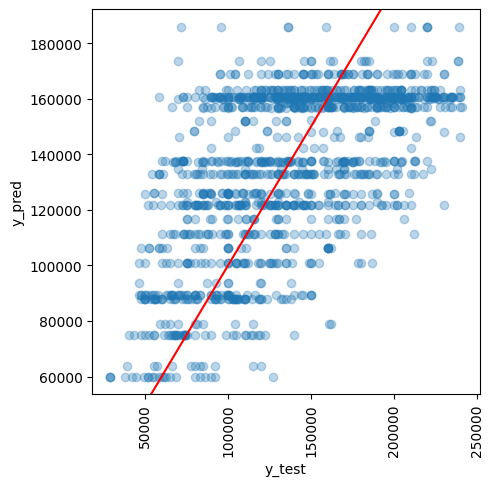

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_test, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_test')
plt.ylabel('y_pred')

plt.show()

In [ ]:
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred)
MAE

31469.024756038583

In [ ]:
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
MSE

1466408784.970606

In [ ]:
RMSE = MSE**(1/2)
RMSE

38293.71730415586

In [ ]:
R2 = r2_score(y_test, y_pred)
R2

0.344380195588601

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.3378426761713933

In [ ]:
test = ['test', MAE, MSE, RMSE, R2, Adj_R2]
test

['test',
 31469.024756038583,
 1466408784.970606,
 38293.71730415586,
 0.344380195588601,
 0.3378426761713933]

In [ ]:
result = pd.DataFrame([train, val, test], columns=['set', 'MAE', 'MSE', 'RMSE', 'R2', 'Adj_R2'])
result.set_index('set', inplace=True)
result

MAE           MSE          RMSE        R2    Adj_R2
set                                                                
train  30726.784172  1.415221e+09  37619.418019  0.378520  0.377752
val    32089.481050  1.535365e+09  39183.730907  0.340864  0.334286
test   31469.024756  1.466409e+09  38293.717304  0.344380  0.337843

### Reverse Decision Tree

In [ ]:
df_rev = df_clean.copy()

In [ ]:
df_rev.drop(['work_year_2020', 'work_year_2021', 'work_year_2022', 'work_year_2023',
             'work_year_2024', 'experience_level_recode', 'employment_type_FT',
             'job_title_Analyst', 'job_title_Engineer', 'job_title_Scientist',
             'salary_currency_USD', 'employee_residence_US', 'remote_ratio_0',
             'remote_ratio_50', 'remote_ratio_100', 'company_location_US',
             'company_size_L', 'company_size_M', 'company_size_S', 'job_title', 'salary'],
            axis=1, inplace=True)

In [ ]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14181 entries, 0 to 16532
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14181 non-null  int64 
 1   experience_level    14181 non-null  object
 2   employment_type     14181 non-null  object
 3   job_title_recode    14181 non-null  object
 4   salary_currency     14181 non-null  object
 5   salary_in_usd       14181 non-null  int64 
 6   employee_residence  14181 non-null  object
 7   remote_ratio        14181 non-null  int64 
 8   company_location    14181 non-null  object
 9   company_size        14181 non-null  object
dtypes: int64(3), object(7)
memory usage: 1.2+ MB


#### Work year

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x = df_rev[['salary_in_usd']]
y = df_rev.work_year

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(x, y)

DecisionTreeClassifier()

In [ ]:
text_representation = tree.export_text(model, feature_names=['salary_in_usd'])
print(text_representation)

|--- salary_in_usd <= 118420.00
|   |--- salary_in_usd <= 116995.00
|   |   |--- salary_in_usd <= 101350.00
|   |   |   |--- salary_in_usd <= 95525.00
|   |   |   |   |--- salary_in_usd <= 63933.50
|   |   |   |   |   |--- salary_in_usd <= 62900.00
|   |   |   |   |   |   |--- salary_in_usd <= 62050.00
|   |   |   |   |   |   |   |--- salary_in_usd <= 33593.00
|   |   |   |   |   |   |   |   |--- salary_in_usd <= 33276.50
|   |   |   |   |   |   |   |   |   |--- salary_in_usd <= 32575.50
|   |   |   |   |   |   |   |   |   |   |--- salary_in_usd <= 28517.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2022
|   |   |   |   |   |   |   |   |   |   |--- salary_in_usd >  28517.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- salary_in_usd >  32575.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2023
|   |   |   |   |   |   |   |   |--- salary_in_usd >  33276.50
|   |   |   |   |   |   |   |   |   |---

In [ ]:
path = model.cost_complexity_pruning_path(x, y)

In [ ]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

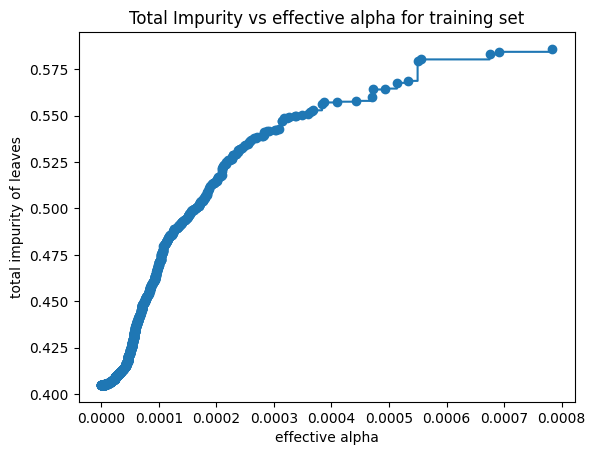

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x, y)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0025949026923329788


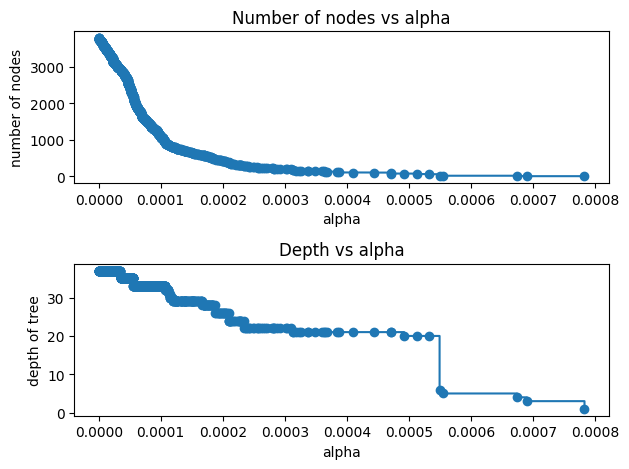

In [ ]:
clfs_ = clfs[:-1]
ccp_alphas_ = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs_]
depth = [clf.tree_.max_depth for clf in clfs_]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas_, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas_, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

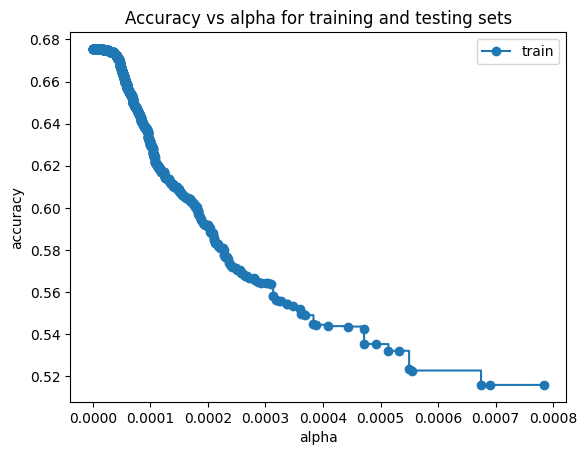

In [ ]:
train_scores = [clf.score(x, y) for clf in clfs_]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas_, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
model = DecisionTreeClassifier(ccp_alpha=0.00055)

In [ ]:
model.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.00055)

In [ ]:
text_representation = tree.export_text(model, feature_names=['salary_in_usd'])
print(text_representation)

|--- salary_in_usd <= 118420.00
|   |--- salary_in_usd <= 116995.00
|   |   |--- salary_in_usd <= 101350.00
|   |   |   |--- salary_in_usd <= 95525.00
|   |   |   |   |--- salary_in_usd <= 63933.50
|   |   |   |   |   |--- salary_in_usd <= 62900.00
|   |   |   |   |   |   |--- class: 2023
|   |   |   |   |   |--- salary_in_usd >  62900.00
|   |   |   |   |   |   |--- class: 2022
|   |   |   |   |--- salary_in_usd >  63933.50
|   |   |   |   |   |--- class: 2023
|   |   |   |--- salary_in_usd >  95525.00
|   |   |   |   |--- salary_in_usd <= 97706.00
|   |   |   |   |   |--- class: 2024
|   |   |   |   |--- salary_in_usd >  97706.00
|   |   |   |   |   |--- class: 2024
|   |   |--- salary_in_usd >  101350.00
|   |   |   |--- class: 2023
|   |--- salary_in_usd >  116995.00
|   |   |--- class: 2024
|--- salary_in_usd >  118420.00
|   |--- salary_in_usd <= 221715.00
|   |   |--- salary_in_usd <= 205960.00
|   |   |   |--- salary_in_usd <= 204400.00
|   |   |   |   |--- class: 2023
|   |   

#### Experience level

In [ ]:
x = df_rev[['salary_in_usd']]
y = df_rev.experience_level

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(x, y)

DecisionTreeClassifier()

In [ ]:
text_representation = tree.export_text(model, feature_names=['salary_in_usd'])
print(text_representation)

|--- salary_in_usd <= 100003.00
|   |--- salary_in_usd <= 77382.00
|   |   |--- salary_in_usd <= 47992.50
|   |   |   |--- salary_in_usd <= 47777.50
|   |   |   |   |--- salary_in_usd <= 41916.50
|   |   |   |   |   |--- salary_in_usd <= 39807.50
|   |   |   |   |   |   |--- salary_in_usd <= 38640.00
|   |   |   |   |   |   |   |--- salary_in_usd <= 29824.00
|   |   |   |   |   |   |   |   |--- salary_in_usd <= 28708.00
|   |   |   |   |   |   |   |   |   |--- salary_in_usd <= 28517.00
|   |   |   |   |   |   |   |   |   |   |--- class: EN
|   |   |   |   |   |   |   |   |   |--- salary_in_usd >  28517.00
|   |   |   |   |   |   |   |   |   |   |--- class: MI
|   |   |   |   |   |   |   |   |--- salary_in_usd >  28708.00
|   |   |   |   |   |   |   |   |   |--- class: EN
|   |   |   |   |   |   |   |--- salary_in_usd >  29824.00
|   |   |   |   |   |   |   |   |--- salary_in_usd <= 32575.50
|   |   |   |   |   |   |   |   |   |--- salary_in_usd <= 31353.50
|   |   |   |   |   |   |   |

In [ ]:
path = model.cost_complexity_pruning_path(x, y)

In [ ]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

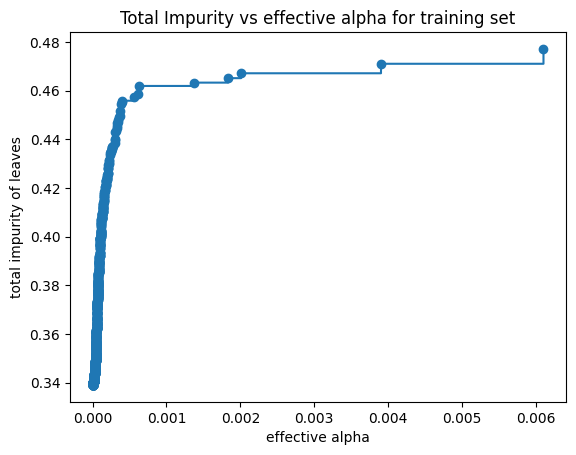

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x, y)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0396598915170539


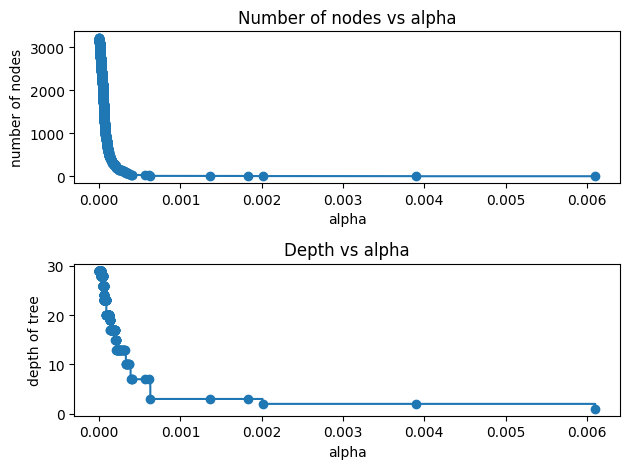

In [ ]:
clfs_ = clfs[:-1]
ccp_alphas_ = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs_]
depth = [clf.tree_.max_depth for clf in clfs_]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas_, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas_, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

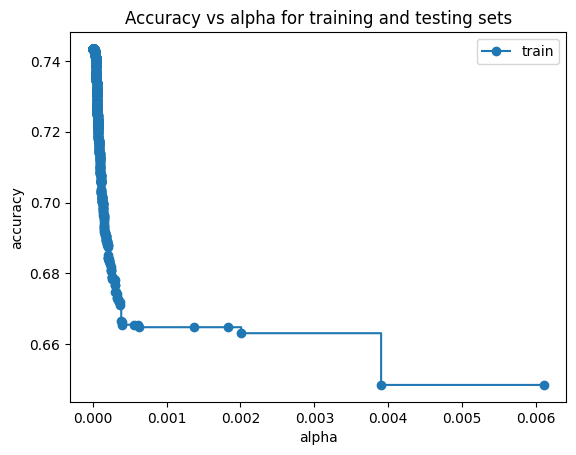

In [ ]:
train_scores = [clf.score(x, y) for clf in clfs_]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas_, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
model = DecisionTreeClassifier(ccp_alpha=0.0005)

In [ ]:
model.fit(x, y)

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


DecisionTreeClassifier(ccp_alpha=0.0005)

In [ ]:
text_representation = tree.export_text(model, feature_names=['salary_in_usd'])
print(text_representation)

|--- salary_in_usd <= 100003.00
|   |--- salary_in_usd <= 77382.00
|   |   |--- salary_in_usd <= 47992.50
|   |   |   |--- class: EN
|   |   |--- salary_in_usd >  47992.50
|   |   |   |--- salary_in_usd <= 66822.50
|   |   |   |   |--- class: MI
|   |   |   |--- salary_in_usd >  66822.50
|   |   |   |   |--- salary_in_usd <= 73890.00
|   |   |   |   |   |--- salary_in_usd <= 72650.00
|   |   |   |   |   |   |--- class: MI
|   |   |   |   |   |--- salary_in_usd >  72650.00
|   |   |   |   |   |   |--- class: MI
|   |   |   |   |--- salary_in_usd >  73890.00
|   |   |   |   |   |--- class: MI
|   |--- salary_in_usd >  77382.00
|   |   |--- salary_in_usd <= 93261.00
|   |   |   |--- class: SE
|   |   |--- salary_in_usd >  93261.00
|   |   |   |--- salary_in_usd <= 94225.00
|   |   |   |   |--- class: SE
|   |   |   |--- salary_in_usd >  94225.00
|   |   |   |   |--- class: SE
|--- salary_in_usd >  100003.00
|   |--- salary_in_usd <= 168050.00
|   |   |--- salary_in_usd <= 125550.00
|   | 

In [ ]:
model = DecisionTreeClassifier(max_depth=5)

In [ ]:
model.fit(x, y)

DecisionTreeClassifier(max_depth=5)

In [ ]:
text_representation = tree.export_text(model, feature_names=['salary_in_usd'])
print(text_representation)

|--- salary_in_usd <= 100003.00
|   |--- salary_in_usd <= 77382.00
|   |   |--- salary_in_usd <= 47992.50
|   |   |   |--- salary_in_usd <= 47777.50
|   |   |   |   |--- salary_in_usd <= 41916.50
|   |   |   |   |   |--- class: EN
|   |   |   |   |--- salary_in_usd >  41916.50
|   |   |   |   |   |--- class: MI
|   |   |   |--- salary_in_usd >  47777.50
|   |   |   |   |--- salary_in_usd <= 47819.50
|   |   |   |   |   |--- class: SE
|   |   |   |   |--- salary_in_usd >  47819.50
|   |   |   |   |   |--- class: EN
|   |   |--- salary_in_usd >  47992.50
|   |   |   |--- salary_in_usd <= 66822.50
|   |   |   |   |--- salary_in_usd <= 55264.00
|   |   |   |   |   |--- class: MI
|   |   |   |   |--- salary_in_usd >  55264.00
|   |   |   |   |   |--- class: MI
|   |   |   |--- salary_in_usd >  66822.50
|   |   |   |   |--- salary_in_usd <= 73890.00
|   |   |   |   |   |--- class: MI
|   |   |   |   |--- salary_in_usd >  73890.00
|   |   |   |   |   |--- class: MI
|   |--- salary_in_usd >  7